In [1]:
from astropy.io import fits
from astropy import units, constants
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import corner
from voigt_fit_lib import *
import os
import pickle

Load in the files

In [2]:
rootdir = '/Users/thepoetoftwilight/Documents/CUBS/Data/PG1522+101/'

First, the FUV files

In [3]:
spec_fits_fuv = fits.open(rootdir + 'FUV/PG1522+101_FUV_wavecal_new.fits')
lsf_fits_fuv = fits.open(rootdir + 'FUV/PG1522_COS_FUV_wavcal2022_lsf_ZQ.fits')

Then, the NUV files

In [4]:
spec_fits_nuv = fits.open(rootdir + 'G185M/PG1522+101_NUV_wavecal_new.fits')
lsf_fits_nuv = fits.open(rootdir + 'G185M/PG1522_COS_NUV_wavcal2022_lsf.fits')

Then, the STIS files

In [5]:
spec_fits_stis = fits.open(rootdir + 'STIS/PG1522+101_E230M_new.fits')
lsf_fits_stis = fits.open(rootdir + 'STIS/PG1522_STIS_NUV_wavcal2022_lsf.fits')

Then, the HIRES files

In [6]:
spec_fits_hires = fits.open(rootdir + 'HIRES/PG1522+101_HIRES.fits')
lsf_fits_hires = fits.open(rootdir + 'HIRES/PG1522_HIRES_wavcal2023_lsf.fits')

Compile a list of the spectra, continuum nodes, and IDs for all detectors

In [7]:
spec_fits_list = [spec_fits_fuv, spec_fits_nuv, spec_fits_stis, spec_fits_hires]
lsf_fits_list = [lsf_fits_fuv, lsf_fits_nuv, lsf_fits_stis, lsf_fits_hires]

Systemic redshift

In [8]:
z_sys = 0.72882414 #0.72882449 #0.72882357

In [9]:
#np.round(0.72882449 - ((1+0.72882449)*0.06/3e+5), 8)

# HI

## HI 1025

In [10]:
hi_1025_fuv = ion_transition('HI', 1025, 'H', z_sys, 'FUV')

In [11]:
hi_1025_fuv.grab_ion_transition_info()

In [12]:
hi_1025_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-290,-70],[80,230]])

In [13]:
hi_1025_fuv.cont_norm_flux(v_abs_range=[-290,230], degree=1)

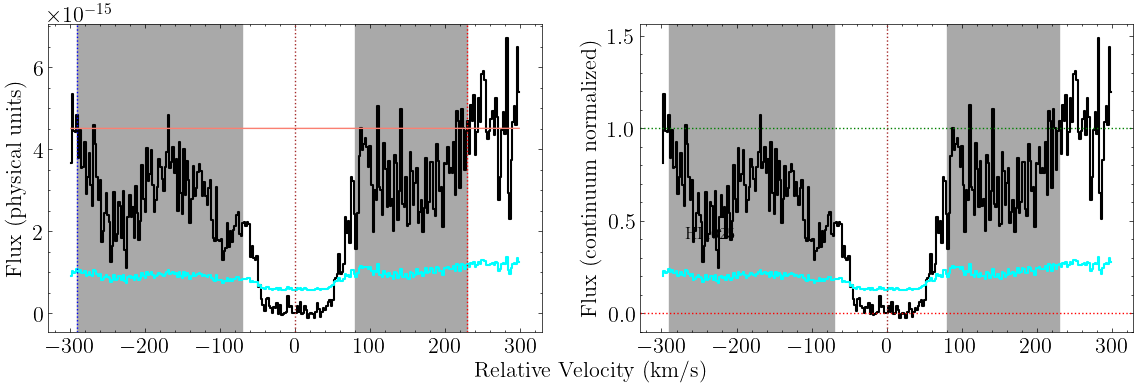

In [14]:
fig, axes = hi_1025_fuv.plot_ion_transition_spec_cont()

In [15]:
hi_1025_fuv.get_EW_total(-100,100)

Integration window: [-100, 100]
EW, 1sig: 508, 12
EW-3sig: 35


In [16]:
hi_1025_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [17]:
hi_1025_fuv.init_ion_transition(init_values = np.array([[16.50,26, 0]]), 
                             lsf_convolve = True)

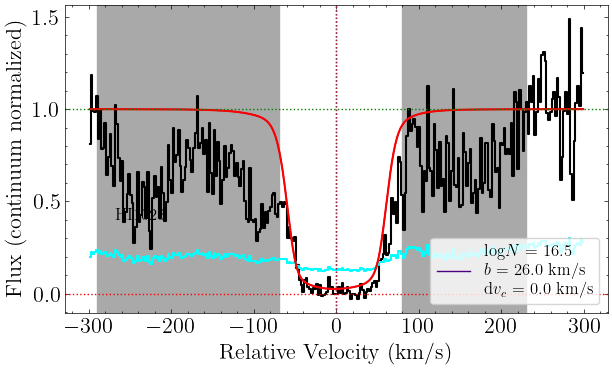

In [18]:
fig, ax = hi_1025_fuv.plot_ion_transition_init_fit()

In [19]:
hi_1025_fuv.fit_ion_transition()

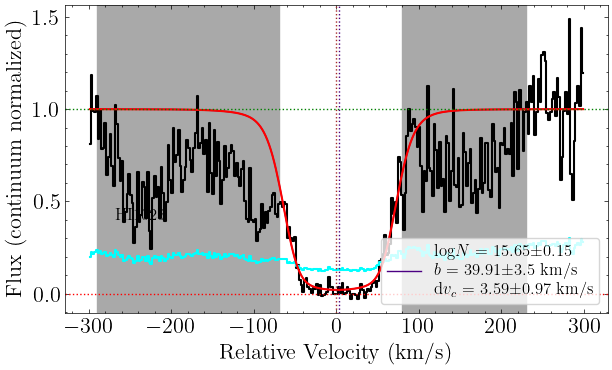

In [20]:
fig, ax = hi_1025_fuv.plot_ion_transition_best_fit()

## HI 972
Get HI 972 from COS FUV

In [21]:
hi_972_fuv = ion_transition('HI', 972, 'H', z_sys, 'FUV')

In [22]:
hi_972_fuv.grab_ion_transition_info()

In [23]:
hi_972_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[80,230]])

In [24]:
hi_972_fuv.cont_norm_flux(v_abs_range=[-90,230], degree=1)

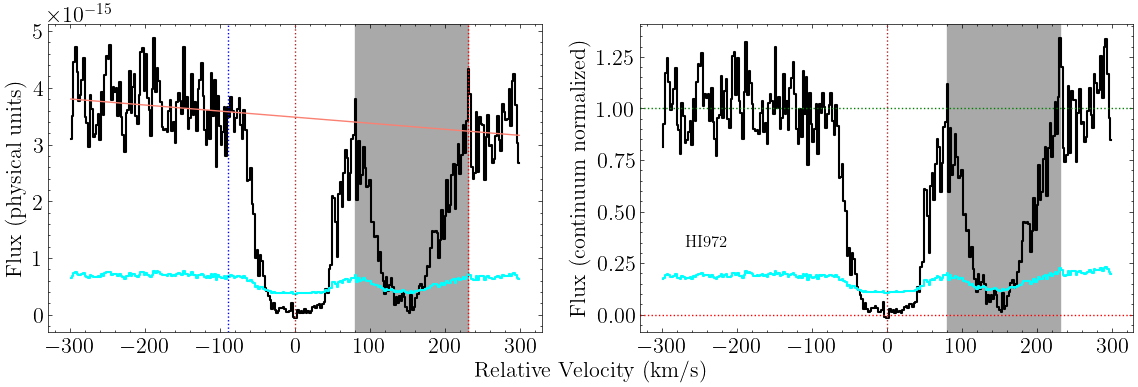

In [25]:
fig, axes = hi_972_fuv.plot_ion_transition_spec_cont()

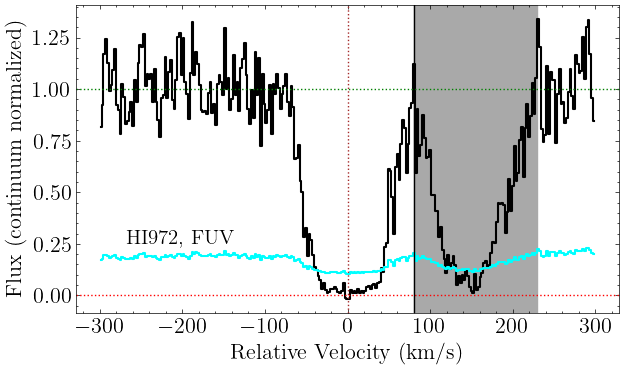

In [26]:
fig, axes = hi_972_fuv.plot_ion_transition_spec()
axes.axvline(80)

In [27]:
hi_972_fuv.get_EW_total(-90,80)

Integration window: [-90, 80]
EW, 1sig: 353, 9
EW-3sig: 27


In [28]:
hi_972_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [29]:
hi_972_fuv.init_ion_transition(init_values = np.array([[16.50,26, 0]]), 
                             lsf_convolve = True)

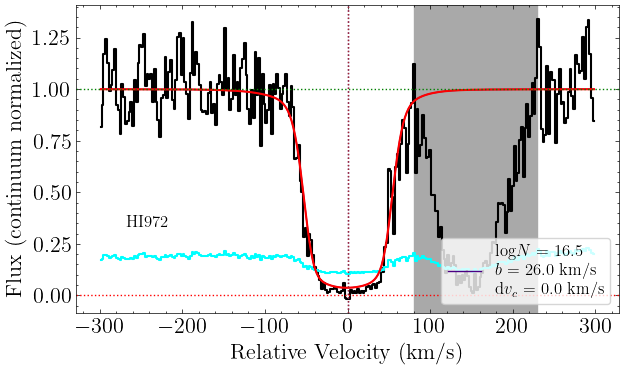

In [30]:
fig, ax = hi_972_fuv.plot_ion_transition_init_fit()

In [31]:
hi_972_fuv.fit_ion_transition()

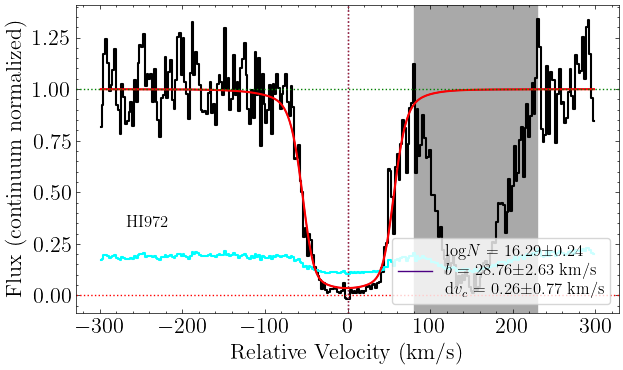

In [32]:
fig, ax = hi_972_fuv.plot_ion_transition_best_fit()

## HI 949
Get HI 949 from COS FUV

In [33]:
hi_949_fuv = ion_transition('HI', 949, 'H', z_sys, 'FUV')

In [34]:
hi_949_fuv.grab_ion_transition_info()

In [35]:
hi_949_fuv.grab_ion_transition_spec(spec_fits_list)

In [36]:
hi_949_fuv.cont_norm_flux(v_abs_range=[-90,90], degree=1)

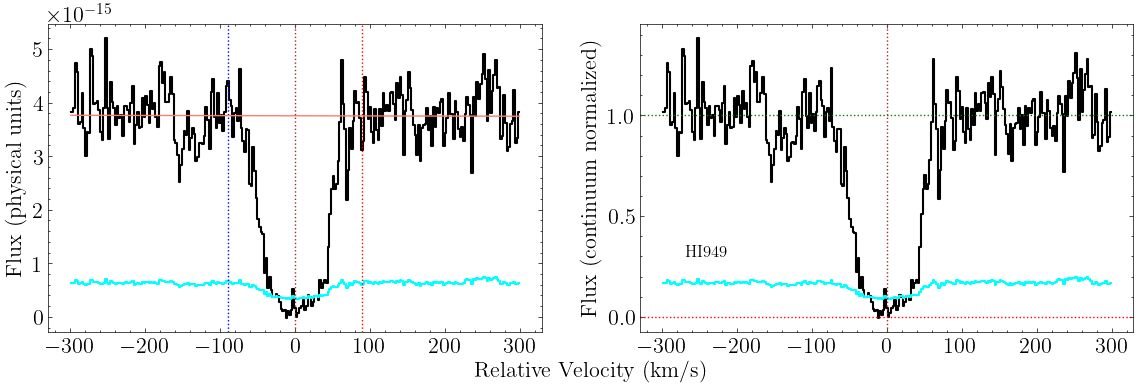

In [37]:
fig, axes = hi_949_fuv.plot_ion_transition_spec_cont()

In [38]:
hi_949_fuv.get_EW_total(-90,90)

Integration window: [-90, 90]
EW, 1sig: 293, 9
EW-3sig: 26


In [39]:
hi_949_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [40]:
hi_949_fuv.init_ion_transition(init_values = np.array([[16.50,26, 0]]), 
                             lsf_convolve = True)

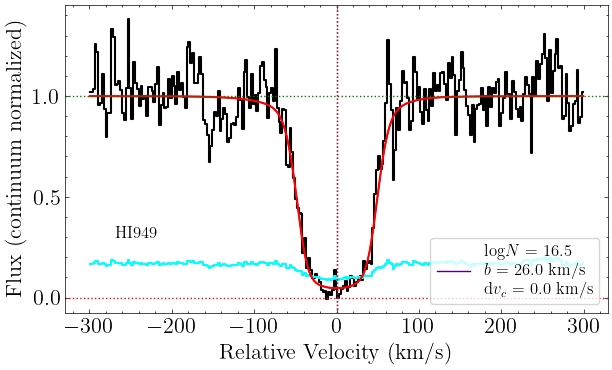

In [41]:
fig, ax = hi_949_fuv.plot_ion_transition_init_fit()

In [42]:
hi_949_fuv.fit_ion_transition()

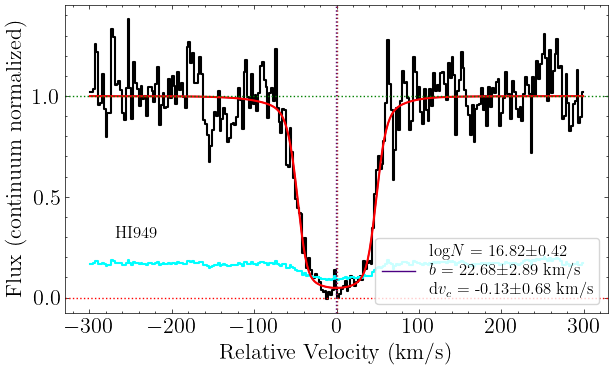

In [43]:
fig, ax = hi_949_fuv.plot_ion_transition_best_fit()

## HI 937
Get HI 937 from COS FUV

In [44]:
hi_937_fuv = ion_transition('HI', 937, 'H', z_sys, 'FUV')

In [45]:
hi_937_fuv.grab_ion_transition_info()

In [46]:
hi_937_fuv.grab_ion_transition_spec(spec_fits_list)

In [47]:
hi_937_fuv.cont_norm_flux(v_abs_range=[-90,125], degree=1)

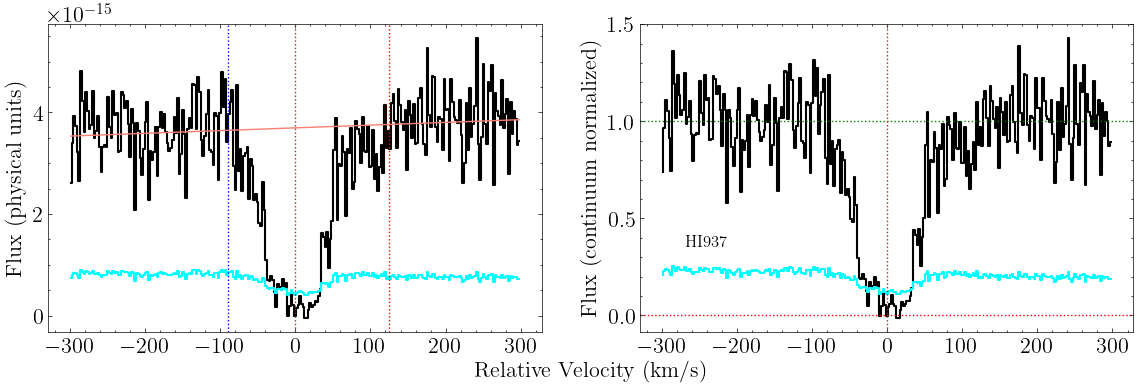

In [48]:
fig, axes = hi_937_fuv.plot_ion_transition_spec_cont()

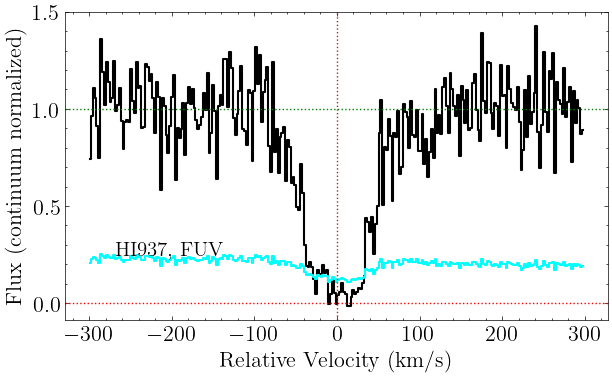

In [49]:
fig, axes = hi_937_fuv.plot_ion_transition_spec()
#axes.set_yticks([0,0.5,1])

In [50]:
hi_937_fuv.get_EW_total(-90,90)

Integration window: [-90, 90]
EW, 1sig: 290, 11
EW-3sig: 33


In [51]:
hi_937_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [52]:
hi_937_fuv.init_ion_transition(init_values = np.array([[16.50,26, 0]]), 
                             lsf_convolve = True)

In [53]:
hi_937_fuv.f, hi_937_fuv.gamma

(0.007799, 0.002297618575)

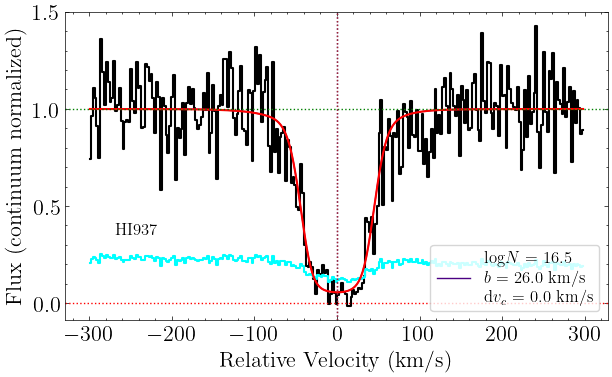

In [54]:
fig, ax = hi_937_fuv.plot_ion_transition_init_fit()

In [55]:
hi_937_fuv.fit_ion_transition()

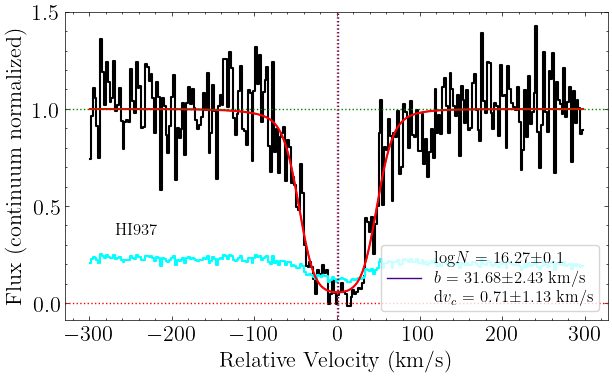

In [56]:
fig, ax = hi_937_fuv.plot_ion_transition_best_fit()

## HI ion (HI 937 only)

In [57]:
hi_937 = ion(z_sys, 'HI_937', [hi_937_fuv])

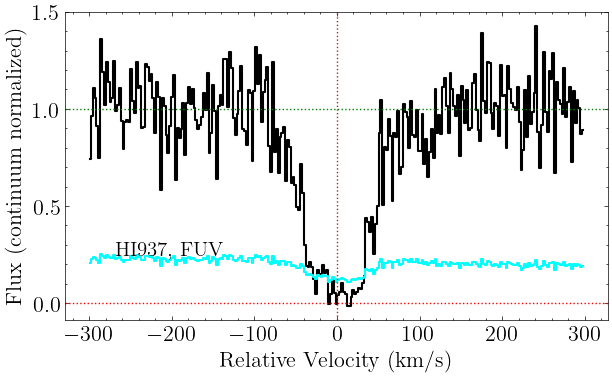

In [58]:
fig, axes = hi_937.plot_ion()

In [59]:
hi_937.init_ion([hi_937_fuv.best_values])
#oiv.init_ion(np.array([[14.6,17,-1.45]]))

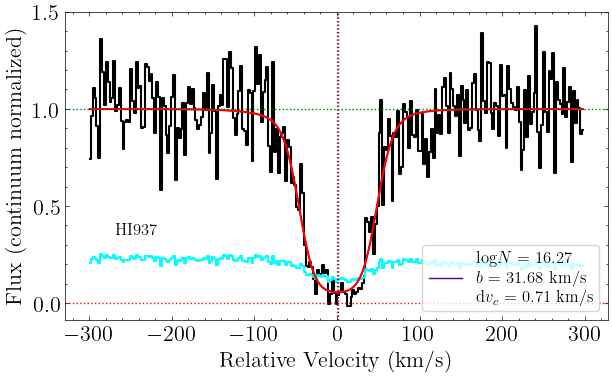

In [60]:
fig, axes = hi_937.plot_ion_init_fit()

In [61]:
hi_937.fit_ion()

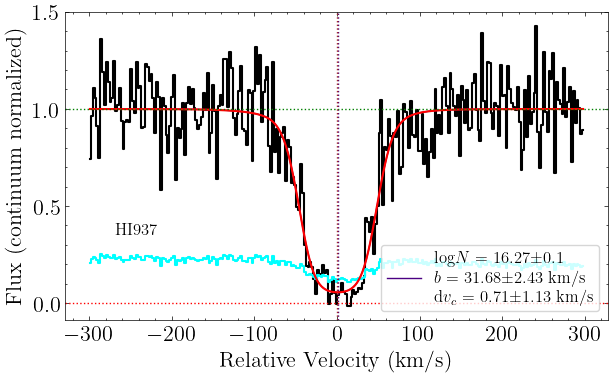

In [62]:
fig, axes = hi_937.plot_ion_best_fit()

In [63]:
#hi_937.fit_ion_emcee(loaddir=rootdir, scale_covar=1e-7, n_walkers=200, n_steps=5000)
#hi_937.fit_ion_emcee(load=True, loaddir=rootdir)

In [64]:
#fig, axes = hi_937.plot_samples()

In [65]:
#hi_937.plot_corner()

## HI 930

In [66]:
hi_930_fuv = ion_transition('HI', 930, 'H', z_sys, 'FUV')

In [67]:
hi_930_fuv.grab_ion_transition_info()

In [68]:
hi_930_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-260,-80],[120,300]])

In [69]:
hi_930_fuv.cont_norm_flux(v_abs_range=[-70, 70], degree=1)

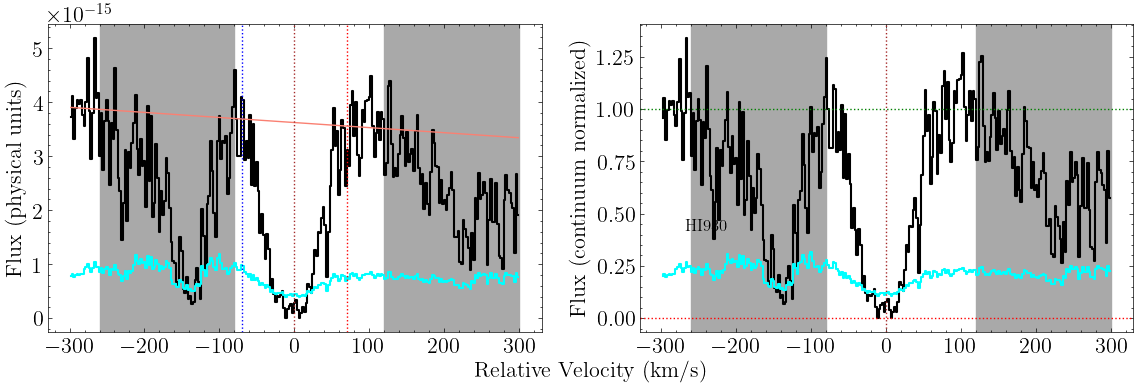

In [70]:
fig, axes = hi_930_fuv.plot_ion_transition_spec_cont()

In [71]:
hi_930_fuv.get_EW_total(-70,70)

Integration window: [-70, 70]
EW, 1sig: 248, 9
EW-3sig: 28


In [72]:
hi_930_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [73]:
hi_930_fuv.init_ion_transition(init_values = np.array([[16.50,26, 0]]), 
                             lsf_convolve = True)

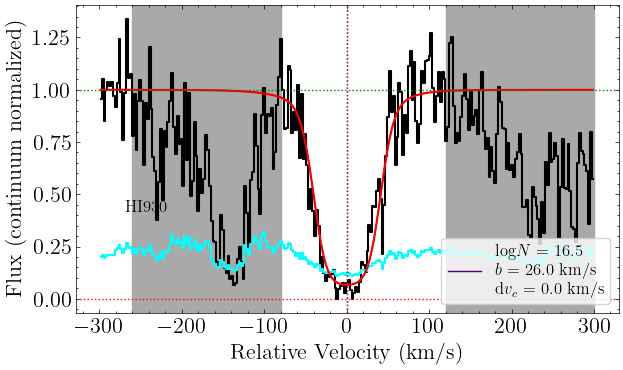

In [74]:
fig, ax = hi_930_fuv.plot_ion_transition_init_fit()

In [75]:
hi_930_fuv.fit_ion_transition()

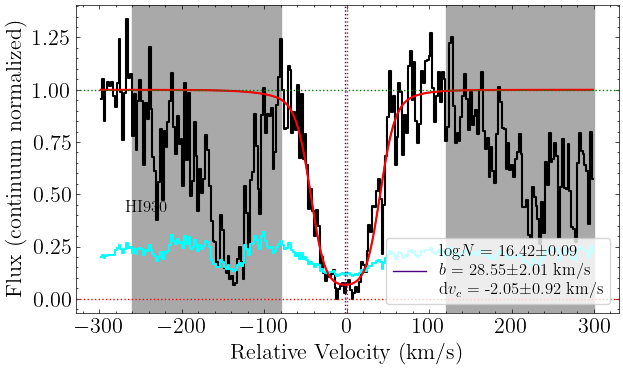

In [76]:
fig, ax = hi_930_fuv.plot_ion_transition_best_fit()

## HI 923
Get HI 923 from COS FUV

In [77]:
hi_923_fuv = ion_transition('HI', 923, 'H', z_sys, 'FUV')

In [78]:
hi_923_fuv.grab_ion_transition_info()

In [79]:
hi_923_fuv.grab_ion_transition_spec(spec_fits_list)

In [80]:
hi_923_fuv.cont_norm_flux(v_abs_range=[-70,70], degree=1)

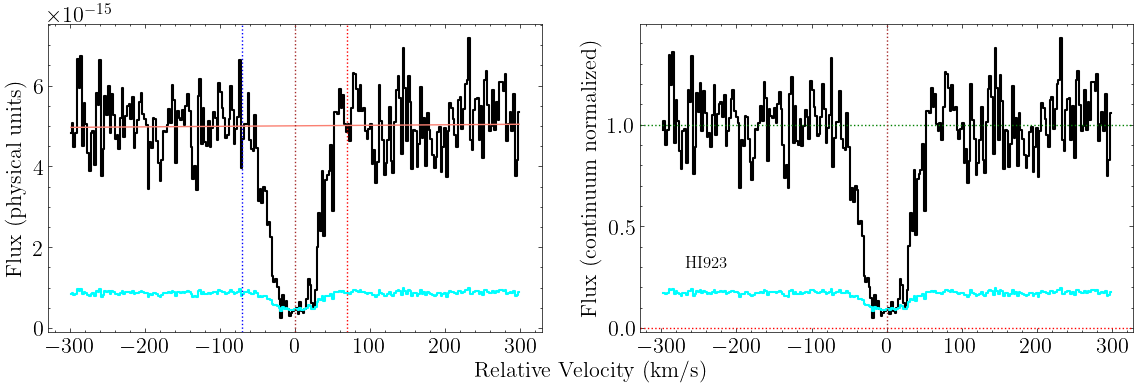

In [81]:
fig, axes = hi_923_fuv.plot_ion_transition_spec_cont()

In [82]:
hi_923_fuv.get_EW_total(-70,70)

Integration window: [-70, 70]
EW, 1sig: 204, 8
EW-3sig: 23


In [83]:
hi_923_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [84]:
hi_923_fuv.init_ion_transition(init_values = np.array([[16.50,26, 0]]), 
                             lsf_convolve = True)

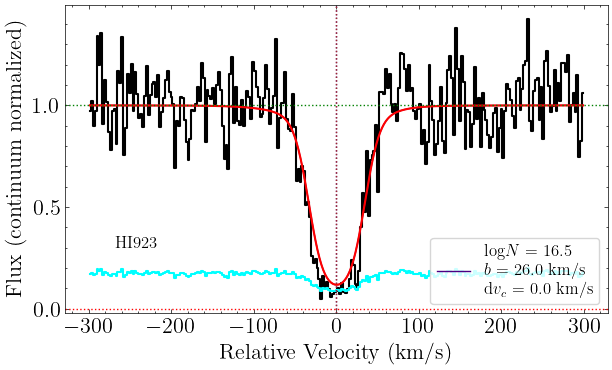

In [85]:
fig, ax = hi_923_fuv.plot_ion_transition_init_fit()

In [86]:
hi_923_fuv.fit_ion_transition()

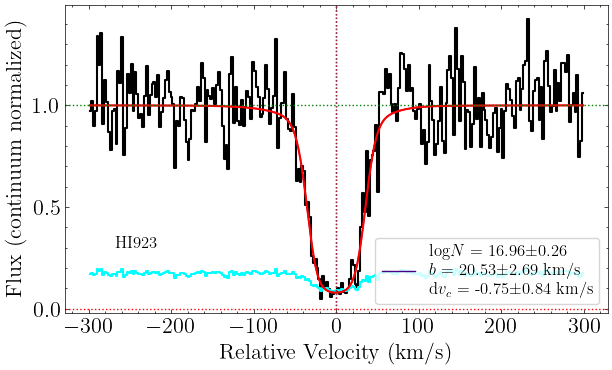

In [87]:
fig, ax = hi_923_fuv.plot_ion_transition_best_fit()

## HI 920
Get HI 920 from COS FUV

In [88]:
hi_920_fuv = ion_transition('HI', 921, 'H', z_sys, 'FUV')

In [89]:
hi_920_fuv.grab_ion_transition_info()

In [90]:
hi_920_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-270,-90],[100,150]])

In [91]:
hi_920_fuv.cont_norm_flux(v_abs_range=[-90, 100], degree=1)

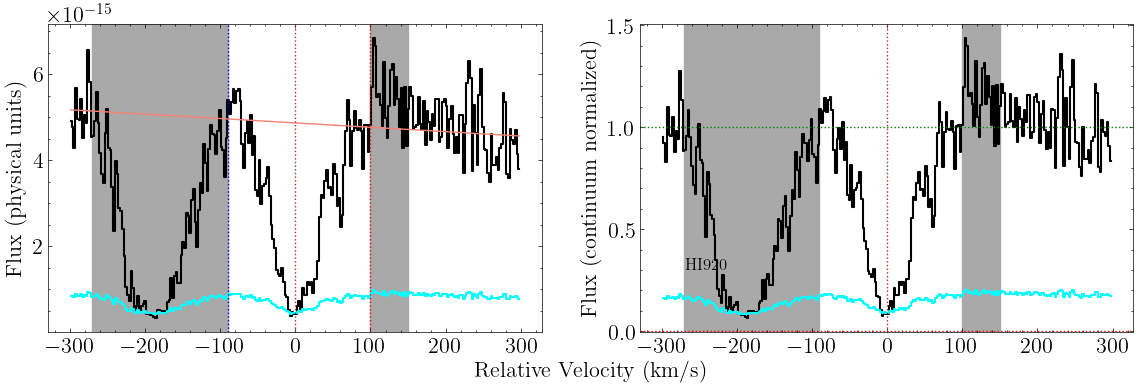

In [92]:
fig, axes = hi_920_fuv.plot_ion_transition_spec_cont()

In [93]:
hi_920_fuv.get_EW_total(-90,90)

Integration window: [-90, 90]
EW, 1sig: 207, 9
EW-3sig: 27


In [94]:
hi_920_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [95]:
hi_920_fuv.init_ion_transition(init_values = np.array([[16.50,26, 0]]), 
                             lsf_convolve = True)

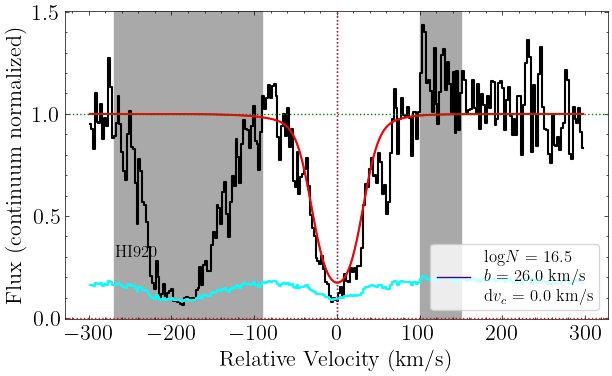

In [96]:
fig, ax = hi_920_fuv.plot_ion_transition_init_fit()

In [97]:
hi_920_fuv.fit_ion_transition()

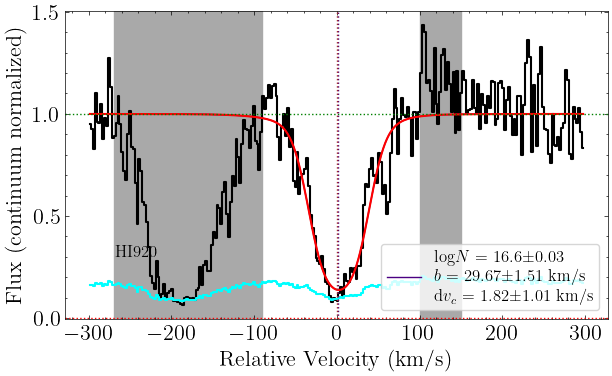

In [98]:
fig, ax = hi_920_fuv.plot_ion_transition_best_fit()

## HI 919

In [99]:
hi_919_fuv = ion_transition('HI', 919, 'H', z_sys, 'FUV')

In [100]:
hi_919_fuv.grab_ion_transition_info()

In [101]:
hi_919_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[250,300]])

In [102]:
hi_919_fuv.cont_norm_flux(v_abs_range=[-90,100], degree=1)

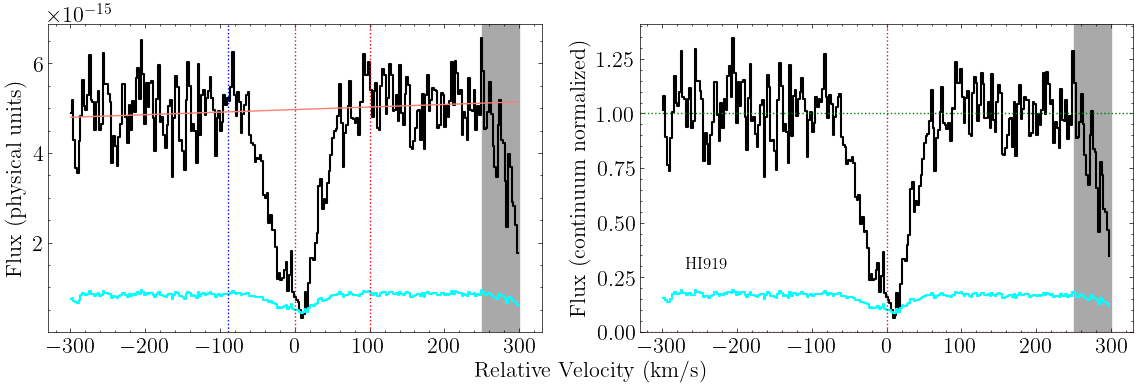

In [103]:
fig, axes = hi_919_fuv.plot_ion_transition_spec_cont()

In [104]:
hi_919_fuv.get_EW_total(-90,90)

Integration window: [-90, 90]
EW, 1sig: 189, 9
EW-3sig: 27


In [105]:
hi_919_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [106]:
hi_919_fuv.init_ion_transition(init_values = np.array([[16.50,26, 0]]), 
                             lsf_convolve = True)

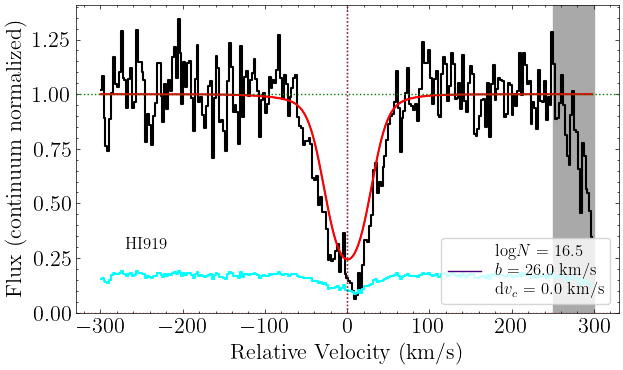

In [107]:
fig, ax = hi_919_fuv.plot_ion_transition_init_fit()

In [108]:
hi_919_fuv.fit_ion_transition()

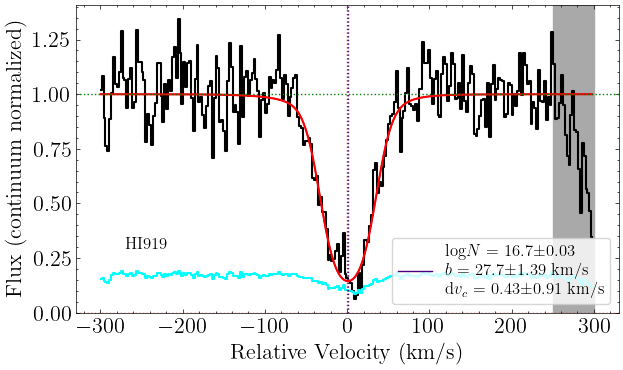

In [109]:
fig, ax = hi_919_fuv.plot_ion_transition_best_fit()

## HI 918

In [110]:
hi_918_fuv = ion_transition('HI', 918, 'H', z_sys, 'FUV')

In [111]:
hi_918_fuv.grab_ion_transition_info()

In [112]:
hi_918_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-260]])

In [113]:
hi_918_fuv.cont_norm_flux(v_abs_range=[-70,100], degree=1)

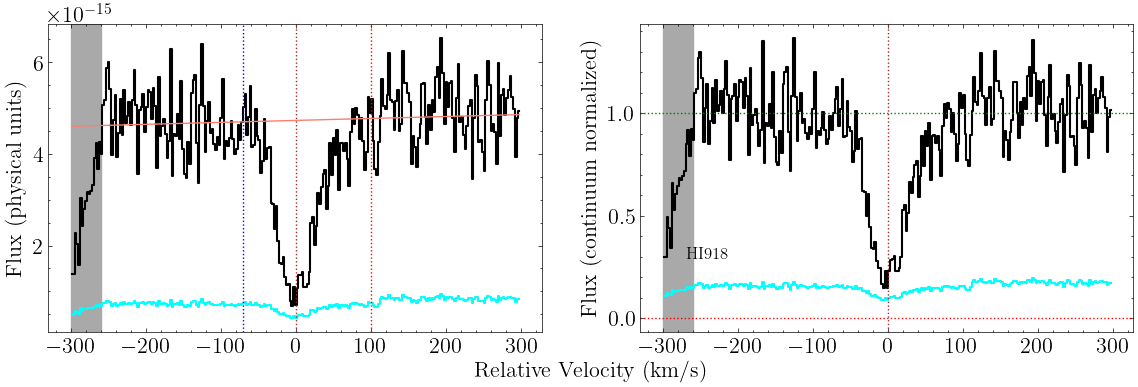

In [114]:
fig, axes = hi_918_fuv.plot_ion_transition_spec_cont()

In [115]:
hi_918_fuv.get_EW_total(-70,70)

Integration window: [-70, 70]
EW, 1sig: 156, 7
EW-3sig: 21


In [116]:
hi_918_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [117]:
hi_918_fuv.init_ion_transition(init_values = np.array([[16.50,26, 0]]),
                             lsf_convolve = True)

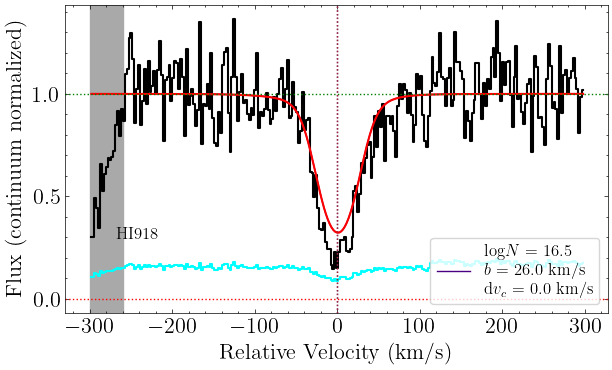

In [118]:
fig, ax = hi_918_fuv.plot_ion_transition_init_fit()

In [119]:
hi_918_fuv.fit_ion_transition()

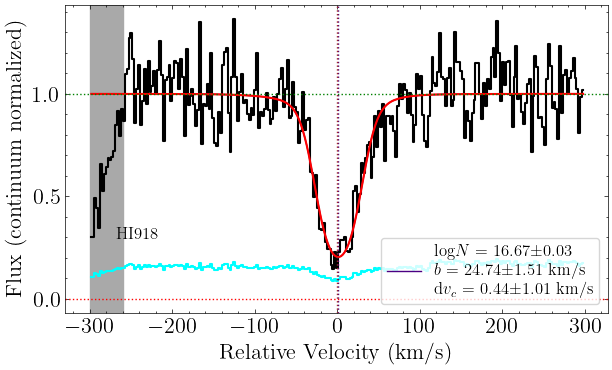

In [120]:
fig, ax = hi_918_fuv.plot_ion_transition_best_fit()

## HI ion

In [121]:
hi = ion(z_sys, 'HI', [hi_1025_fuv, hi_972_fuv, hi_949_fuv, hi_937_fuv, hi_930_fuv, 
                       hi_923_fuv, hi_920_fuv, hi_919_fuv, hi_918_fuv])

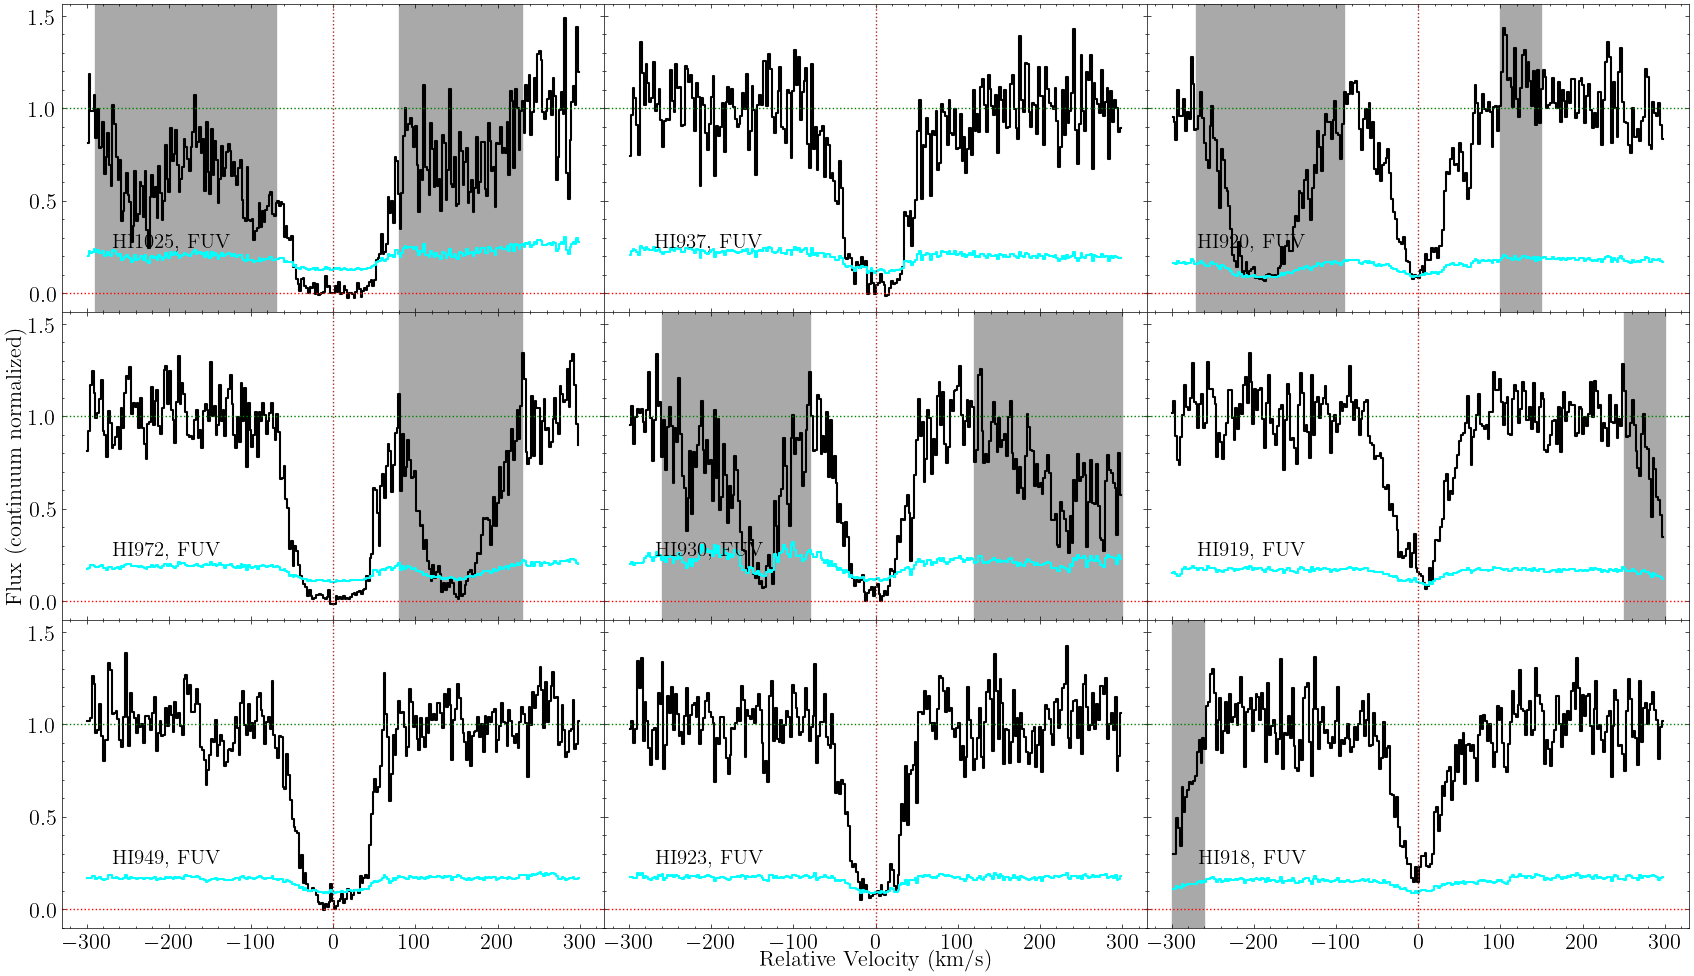

In [122]:
fig, axes = hi.plot_ion(n_cols=3, label_axes=True)

In [123]:
hi.init_ion([[[16.50, 26, 0]],
            [[16.50, 26, 0]],
            [[16.50, 26, 0]],
            [[16.50, 26, 0]],
            [[16.50, 26, 0]],
            [[16.50, 26, 0]],
            [[16.50, 26, 0]],
            [[16.50, 26, 0]],
            [[16.50, 26, 0]]])

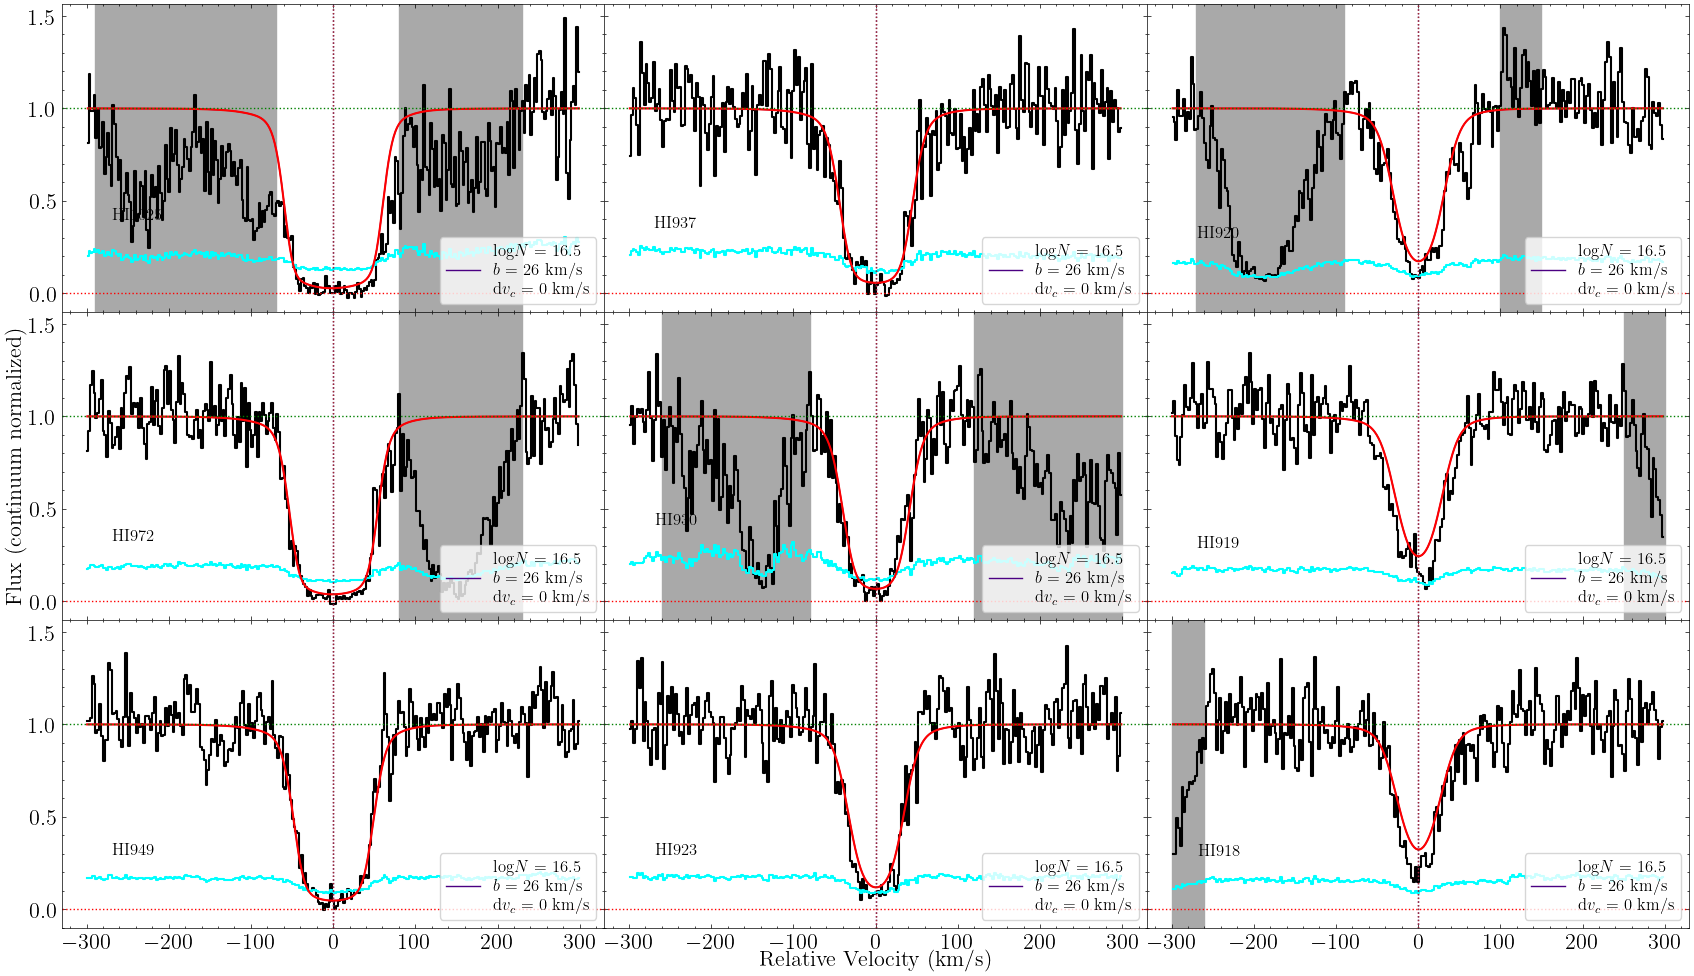

In [124]:
fig, axes = hi.plot_ion_init_fit(n_cols=3)

In [125]:
hi.fit_ion(tie_params_list=[['it1c1_logN', 'it2c1_logN'],
                            ['it1c1_logN', 'it3c1_logN'],
                            ['it1c1_logN', 'it4c1_logN'],
                            ['it1c1_logN', 'it5c1_logN'],
                            ['it1c1_logN', 'it6c1_logN'],
                            ['it1c1_logN', 'it7c1_logN'],
                            ['it1c1_logN', 'it8c1_logN'],
                            ['it1c1_logN', 'it9c1_logN'],
                            ['it1c1_b', 'it2c1_b'],
                            ['it1c1_b', 'it3c1_b'],
                            ['it1c1_b', 'it4c1_b'],
                            ['it1c1_b', 'it5c1_b'],
                            ['it1c1_b', 'it6c1_b'],
                            ['it1c1_b', 'it7c1_b'],
                            ['it1c1_b', 'it8c1_b'],
                            ['it1c1_b', 'it9c1_b'],
                            ['it1c1_dv_c', 'it2c1_dv_c'],
                            ['it1c1_dv_c', 'it3c1_dv_c'],
                            ['it1c1_dv_c', 'it4c1_dv_c'],
                            ['it1c1_dv_c', 'it5c1_dv_c'],
                            ['it1c1_dv_c', 'it6c1_dv_c'],
                            ['it1c1_dv_c', 'it7c1_dv_c'],
                            ['it1c1_dv_c', 'it8c1_dv_c'],
                            ['it1c1_dv_c', 'it9c1_dv_c']],
          fix_params_list = ['it1c1_dv_c'])

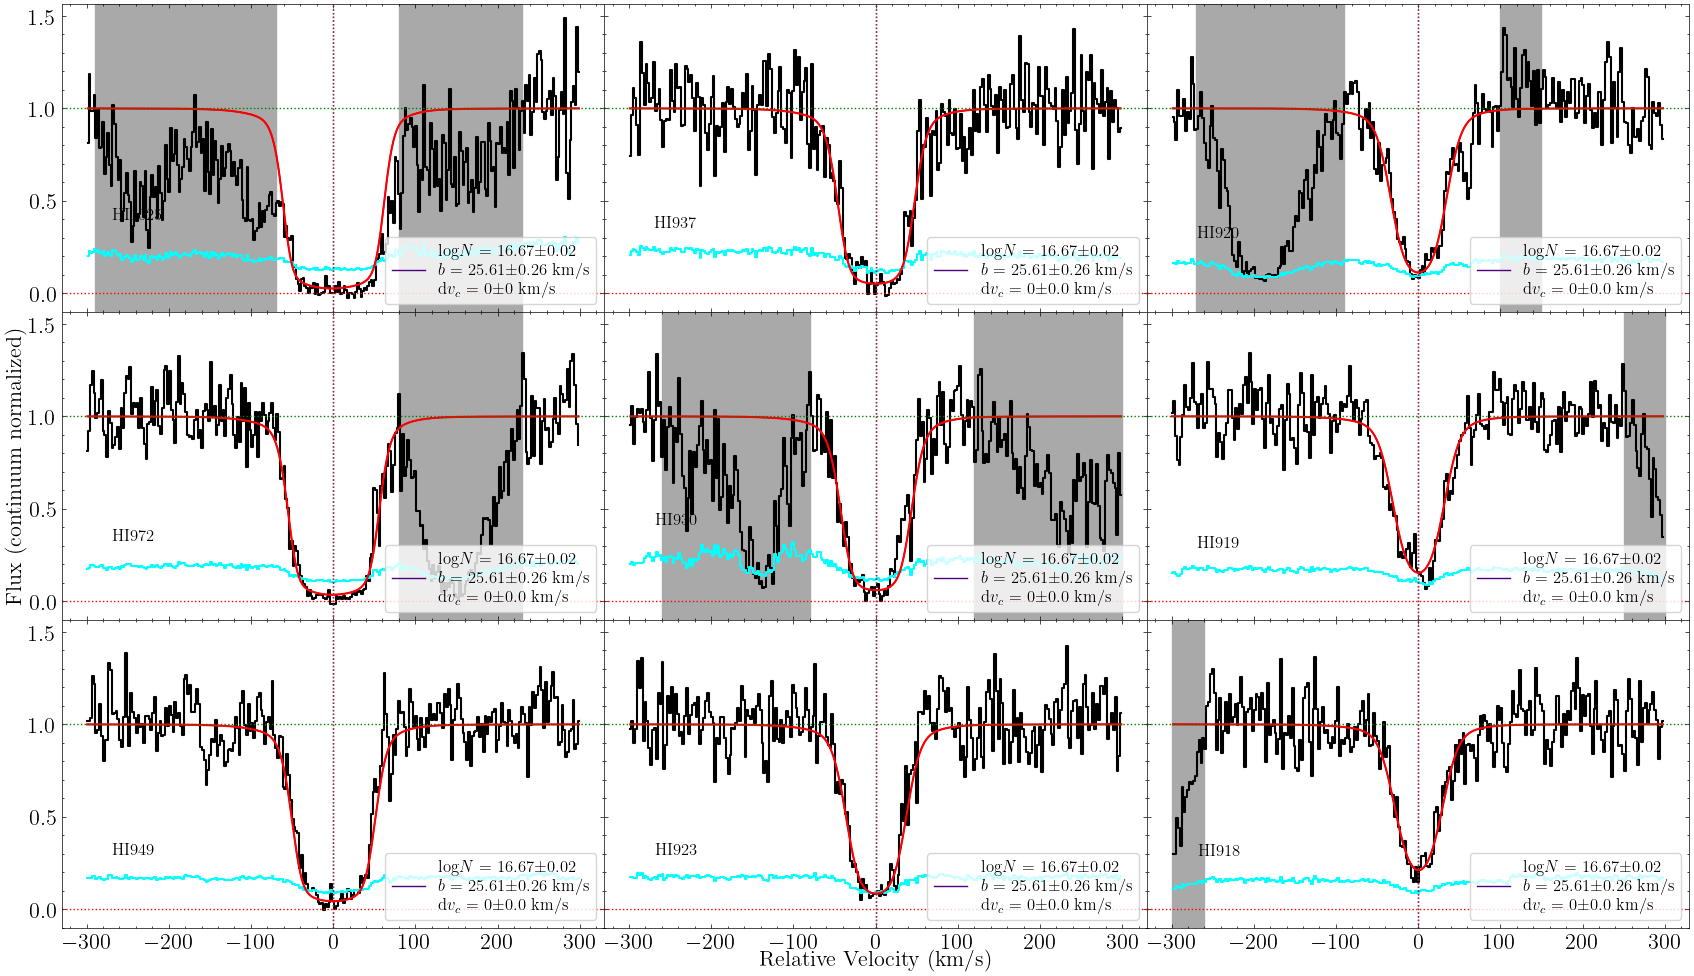

In [126]:
fig, axes = hi.plot_ion_best_fit(n_cols=3)

In [127]:
#hi.fit_ion_emcee(loaddir=rootdir, scale_covar=1e-6, n_walkers=200, n_steps=2500)
#hi.fit_ion_emcee(load=True, loaddir=rootdir)

In [128]:
#fig, axes = hi.plot_samples(n_cols=3)

In [129]:
#hi.plot_corner()

# CIII

## CIII 977
Get CIII 977 from COS FUV

In [130]:
ciii_977_fuv = ion_transition('CIII', 977, 'C', z_sys, 'FUV')

In [131]:
ciii_977_fuv.grab_ion_transition_info(delta_v = -5.2)

In [132]:
ciii_977_fuv.grab_ion_transition_spec(spec_fits_list, v_range=[-300,300], masks=[[-300,-250],[-160,-40],[25,170]]) #masks=[[-300,-140],[25,170]])

In [133]:
ciii_977_fuv.cont_norm_flux(v_abs_range=[-40,25], degree=1)

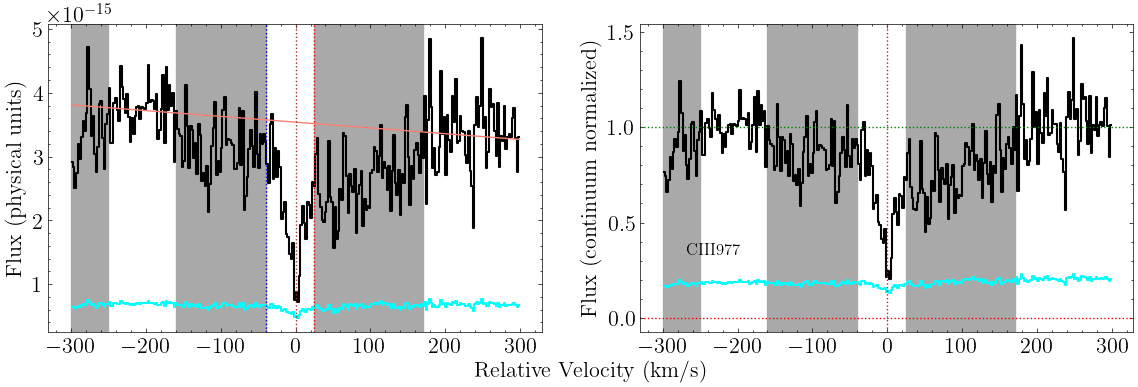

In [134]:
fig, ax = ciii_977_fuv.plot_ion_transition_spec_cont()

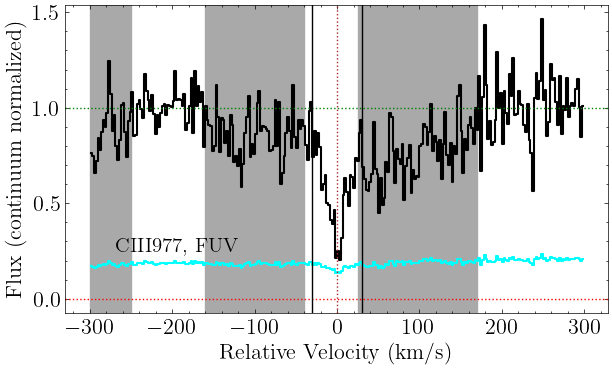

In [135]:
fig, ax = ciii_977_fuv.plot_ion_transition_spec()
ax.axvline(-30)
ax.axvline(30)

In [136]:
ciii_977_fuv.get_EW_total(-30,25)

Integration window: [-30, 25]
EW, 1sig: 77, 6
EW-3sig: 17


In [137]:
ciii_977_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [138]:
ciii_977_fuv.init_ion_transition(init_values = np.array([[13.34, 17, 0]]), 
                             lsf_convolve = True)

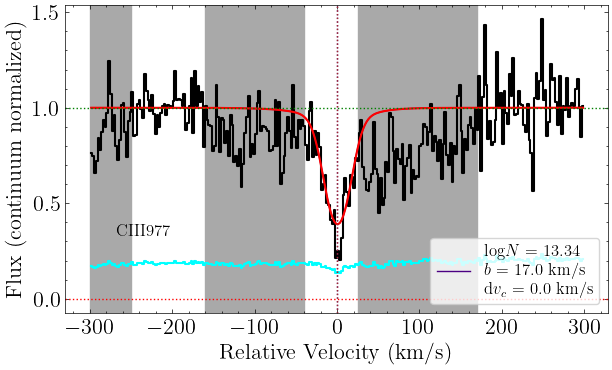

In [139]:
fig, ax = ciii_977_fuv.plot_ion_transition_init_fit()

In [140]:
ciii_977_fuv.fit_ion_transition()

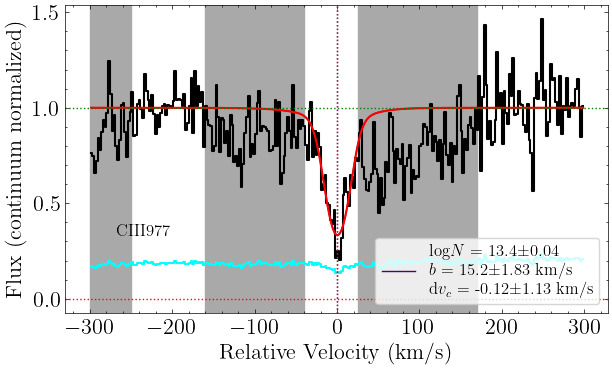

In [141]:
fig, ax = ciii_977_fuv.plot_ion_transition_best_fit()

## CIII ion

In [142]:
ciii = ion(z_sys, 'CIII', [ciii_977_fuv])

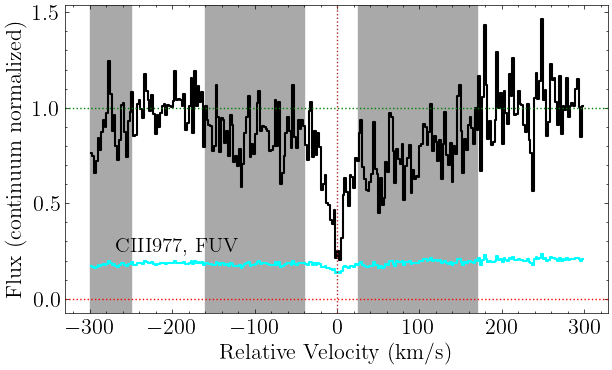

In [143]:
fig, axes = ciii.plot_ion()

In [144]:
ciii.init_ion([[[13.4, 15, 0]]])
#ciii.init_ion(np.array([[13.42,16,-1.15]]))

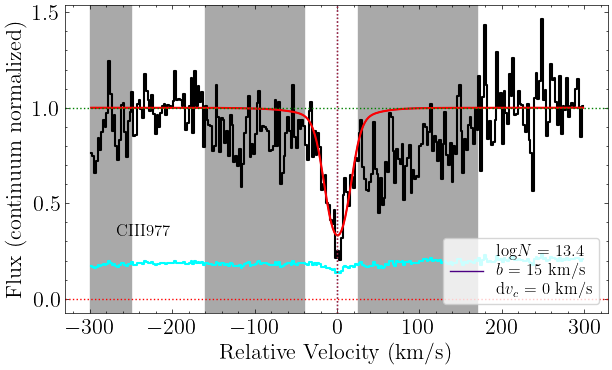

In [145]:
fig, axes = ciii.plot_ion_init_fit()

In [146]:
ciii.fit_ion(fix_params_list = ['it1c1_dv_c'],
            lower_bounds_dict = {'it1c1_b':8})

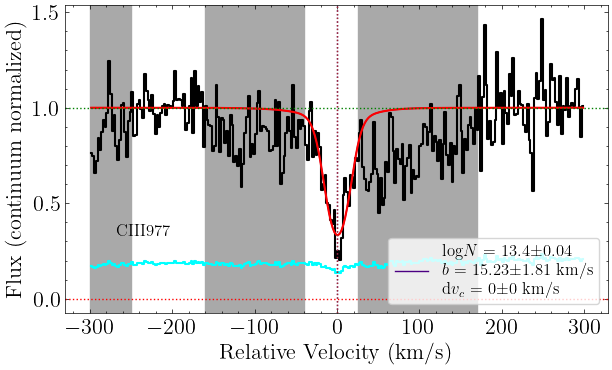

In [147]:
fig, axes = ciii.plot_ion_best_fit()

In [148]:
#ciii.fit_ion_emcee(loaddir=rootdir, scale_covar=1e-7, n_walkers=200, n_steps=2500)
ciii.fit_ion_emcee(load=True, loaddir=rootdir)

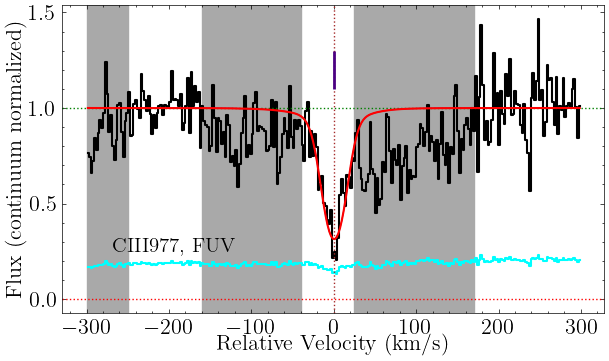

In [149]:
fig, axes = ciii.plot_samples()

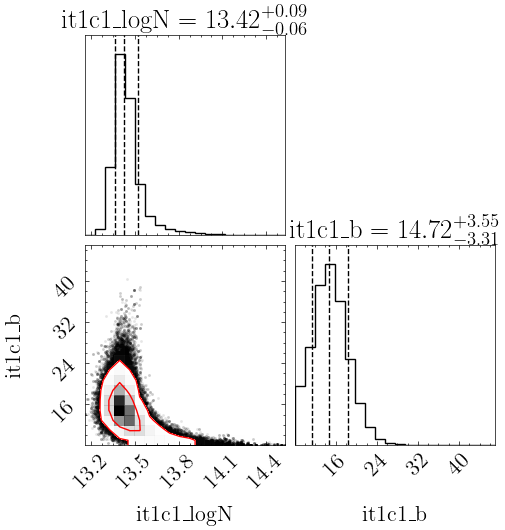

In [150]:
ciii.plot_corner()

# OIII

## OIII 832
Get OIII 832 from COS FUV

In [151]:
oiii_832_fuv = ion_transition('OIII', 832, 'O', z_sys, 'FUV')

In [152]:
oiii_832_fuv.grab_ion_transition_info()

In [153]:
oiii_832_fuv.grab_ion_transition_spec(spec_fits_list, v_range=[-300,300])

In [154]:
oiii_832_fuv.cont_norm_flux(v_abs_range=[-40,40], degree=1)

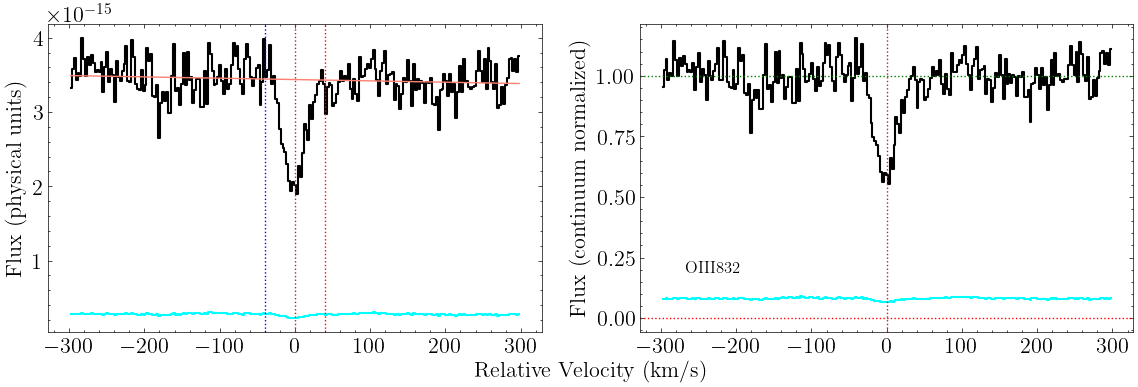

In [155]:
fig, ax = oiii_832_fuv.plot_ion_transition_spec_cont()

In [156]:
oiii_832_fuv.get_EW_total(-40,40)

Integration window: [-40, 40]
EW, 1sig: 38, 3
EW-3sig: 9


In [157]:
oiii_832_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [158]:
oiii_832_fuv.init_ion_transition(init_values = np.array([[14.1, 19, 0]]), 
                             lsf_convolve = True)

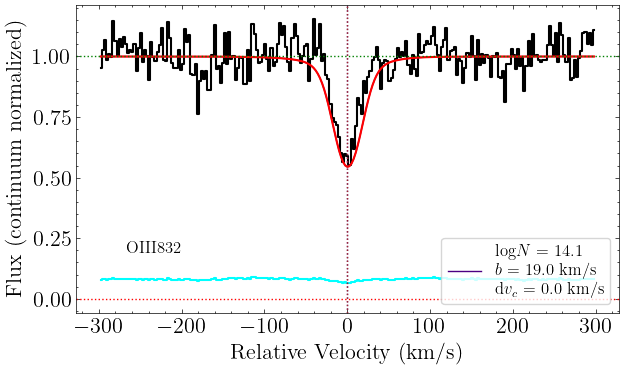

In [159]:
fig, ax = oiii_832_fuv.plot_ion_transition_init_fit()

In [160]:
oiii_832_fuv.fit_ion_transition()

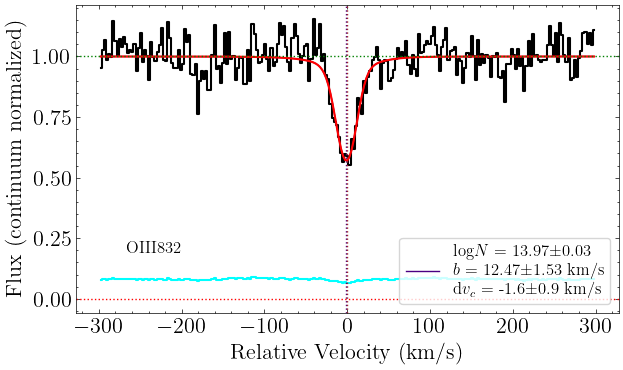

In [161]:
fig, ax = oiii_832_fuv.plot_ion_transition_best_fit()

## OIII ion

In [162]:
oiii = ion(z_sys, 'OIII', [oiii_832_fuv])

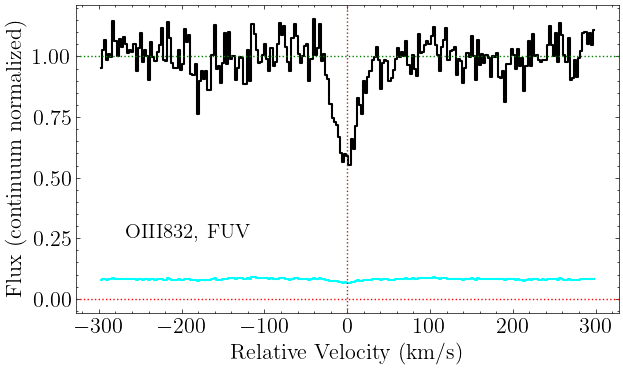

In [163]:
fig, axes = oiii.plot_ion()

In [164]:
oiii.init_ion([oiii_832_fuv.best_values])
#oiii.init_ion(np.array([[13.95,17,-0.89]]))

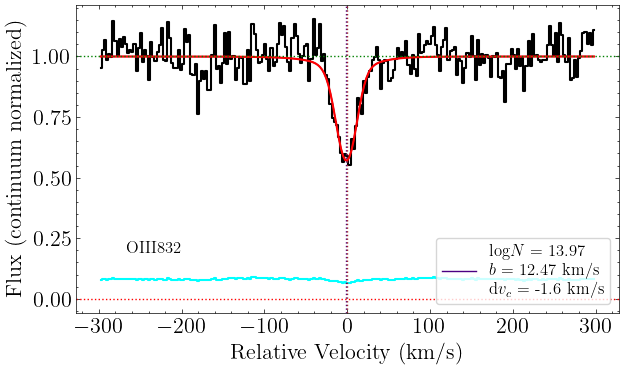

In [165]:
fig, axes = oiii.plot_ion_init_fit()

In [166]:
oiii.fit_ion(fix_params_list = ['it1c1_dv_c'])

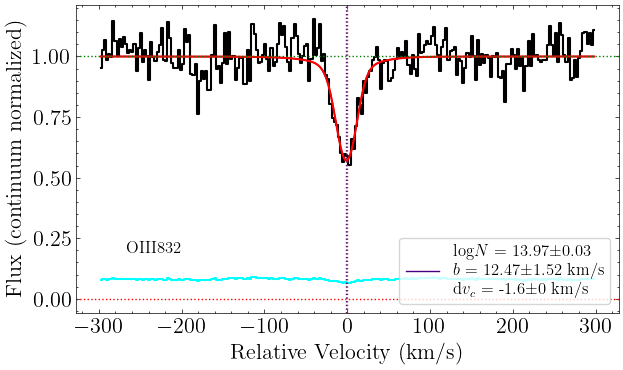

In [167]:
fig, axes = oiii.plot_ion_best_fit()

In [168]:
#oiii.fit_ion_emcee(loaddir=rootdir, scale_covar=1e-7, n_walkers=200, n_steps=2500)
oiii.fit_ion_emcee(load=True, loaddir=rootdir)

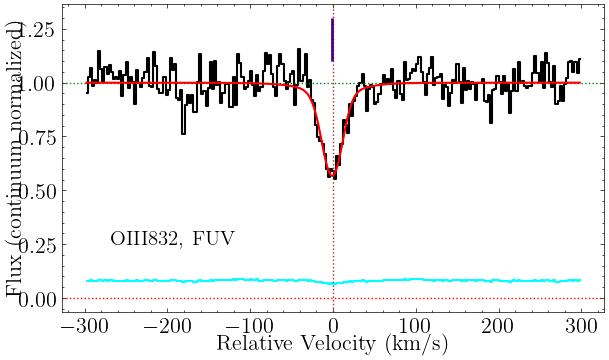

In [169]:
fig, axes = oiii.plot_samples()

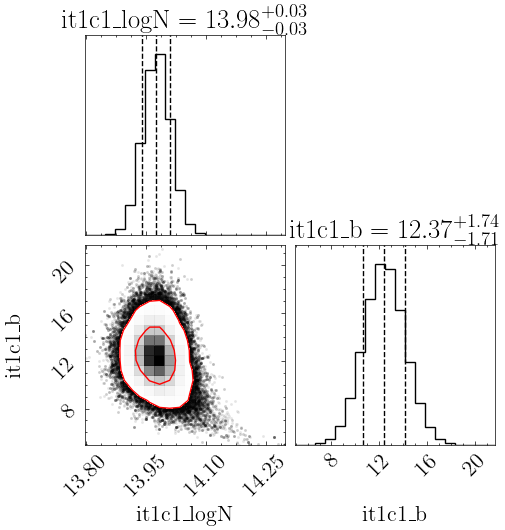

In [170]:
oiii.plot_corner()

# OIV

## Interlude: HI 1025 (z=0.3276807)
Get HI 1025 from COS FUV

In [171]:
hi_1025_fuv = ion_transition('HI', 1025, 'H', 0.32768003, 'FUV')

In [172]:
hi_1025_fuv.grab_ion_transition_info()

In [173]:
hi_1025_fuv.grab_ion_transition_spec(spec_fits_list)

In [174]:
hi_1025_fuv.cont_norm_flux(v_abs_range=[-70,255], degree=1)

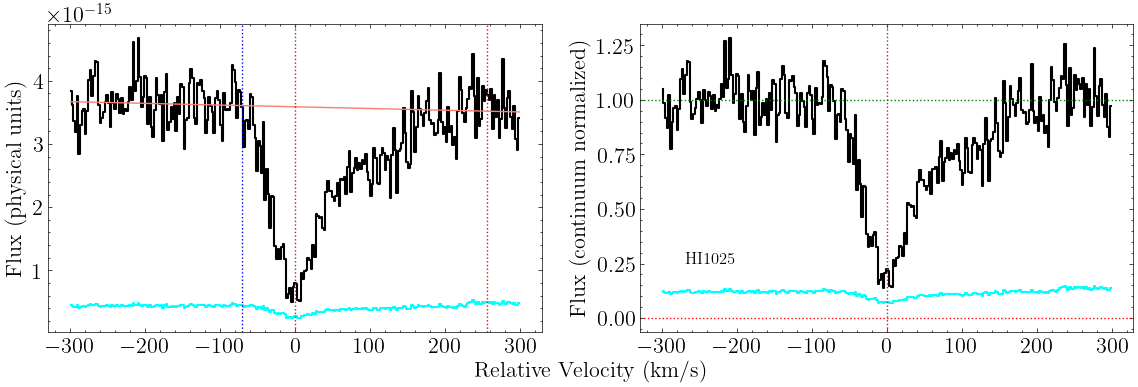

In [175]:
fig, ax = hi_1025_fuv.plot_ion_transition_spec_cont()

In [176]:
hi_1025_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [177]:
hi_1025_fuv.init_ion_transition([[14.2, 17, 0], [14.2, 46, 43]], 
                            lsf_convolve = True)

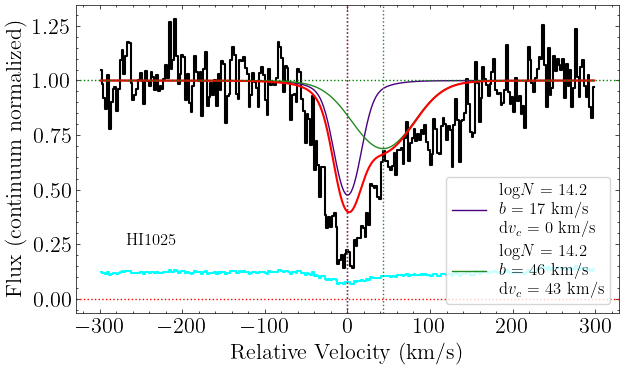

In [178]:
fig, ax = hi_1025_fuv.plot_ion_transition_init_fit()

## OIV 787 at z=0.728806 with HI 1025 at z=0.3276807
Get OIV 787 from COS FUV

In [179]:
oiv_787_fuv_init = ion_transition('OIV', 787, 'O', z_sys, 'FUV')

In [180]:
oiv_787_fuv_init.grab_ion_transition_info()

In [181]:
oiv_787_fuv_init.grab_ion_transition_spec(spec_fits_list)

In [182]:
oiv_787_fuv_init.cont_norm_flux(v_abs_range=[-70,255], degree=1)

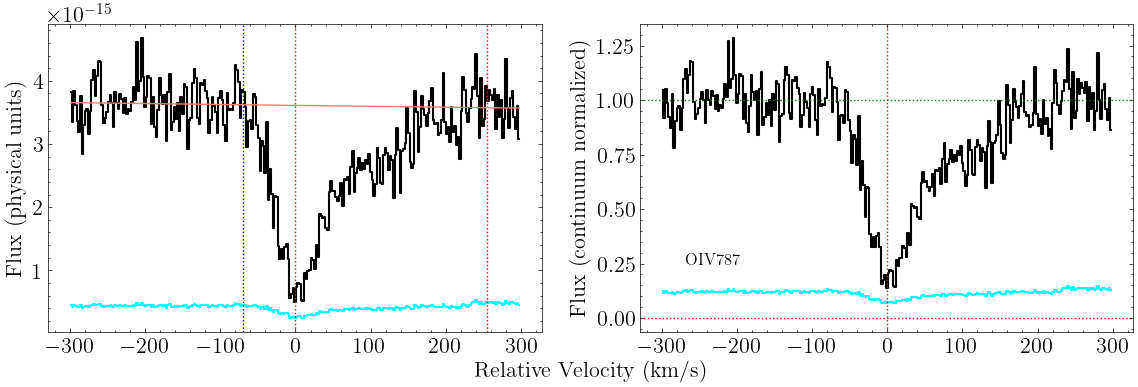

In [183]:
fig, ax = oiv_787_fuv_init.plot_ion_transition_spec_cont()

In [184]:
oiv_787_fuv_init.grab_ion_transition_lsf(lsf_fits_list)

In [185]:
oiv_787_fuv_init.init_ion_transition(init_values = np.array([[14.42, 30, 0]]),  # Use centroid from OIII
                             lsf_convolve = True)

In [186]:
dv_c_hi_1025_fuv = 3e+5*((hi_1025_fuv.wav0_obs-oiv_787_fuv_init.wav0_obs)/oiv_787_fuv_init.wav0_obs)

In [187]:
hi_flux_interp = np.interp(oiv_787_fuv_init.v, hi_1025_fuv.v+dv_c_hi_1025_fuv, hi_1025_fuv.init_total_flux)

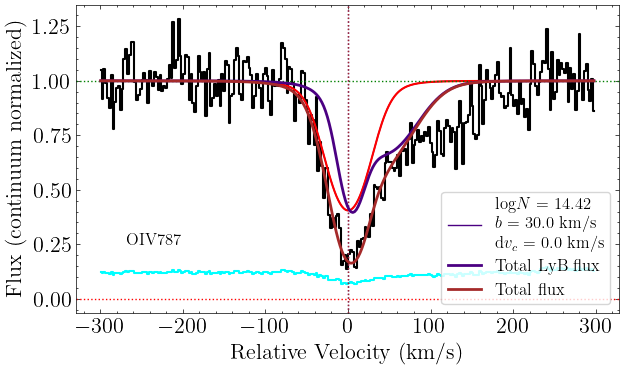

In [188]:
fig, ax = oiv_787_fuv_init.plot_ion_transition_init_fit()
ax.plot(oiv_787_fuv_init.v, hi_flux_interp, lw=2, color='indigo', label='Total LyB flux')
ax.plot(oiv_787_fuv_init.v, oiv_787_fuv_init.init_total_flux*hi_flux_interp, lw=2, color='brown', label='Total flux')

ax.legend(loc='lower right')

## OIV 787

In [189]:
oiv_787_fuv = ion_transition('OIV', 787, 'O', z_sys, 'FUV')

In [190]:
oiv_787_fuv.grab_ion_transition_info()

In [191]:
oiv_787_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[50,160]])

In [192]:
oiv_787_fuv.cont_norm_flux(v_abs_range=[-65,165], degree=1)

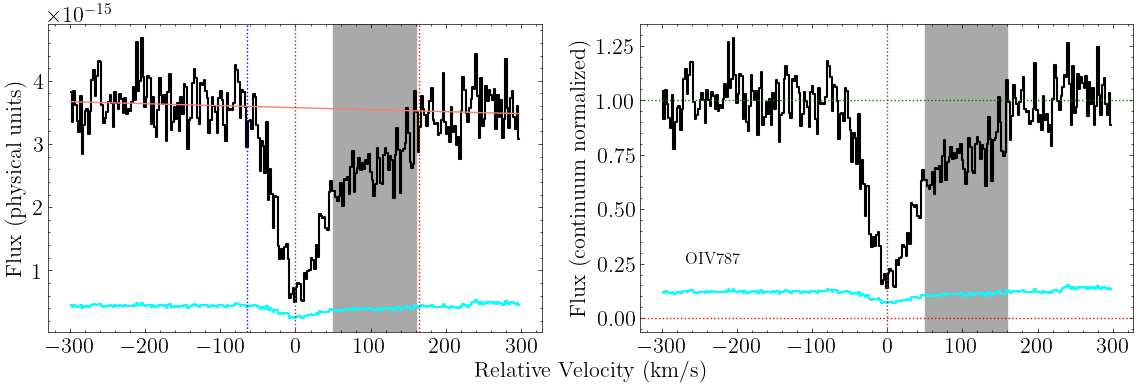

In [193]:
fig, ax = oiv_787_fuv.plot_ion_transition_spec_cont()

In [194]:
oiv_787_fuv.flux_norm = oiv_787_fuv.flux_norm/hi_flux_interp

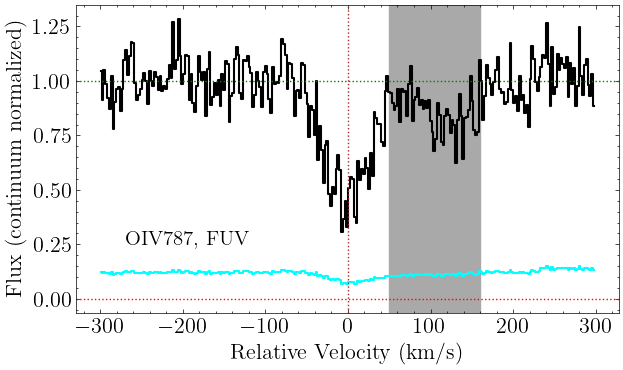

In [195]:
fig, ax = oiv_787_fuv.plot_ion_transition_spec()
#ax.axvline(65)

In [196]:
oiv_787_fuv.get_EW_total(-65,65)

Integration window: [-65, 65]
EW, 1sig: 98, 4
EW-3sig: 13


In [197]:
oiv_787_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [198]:
oiv_787_fuv.init_ion_transition(init_values = np.array([[14.69, 18, 0]]), 
                             lsf_convolve = True)

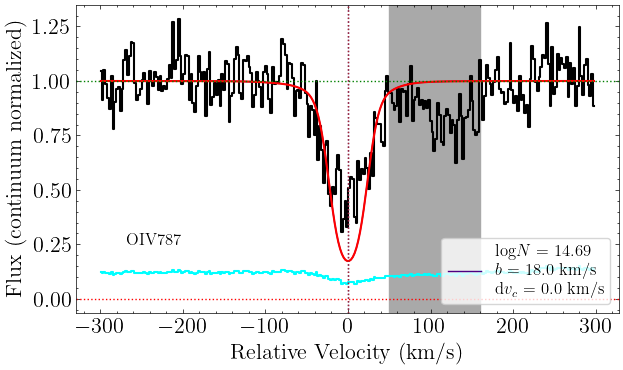

In [199]:
fig, ax = oiv_787_fuv.plot_ion_transition_init_fit()

In [200]:
oiv_787_fuv.fit_ion_transition()

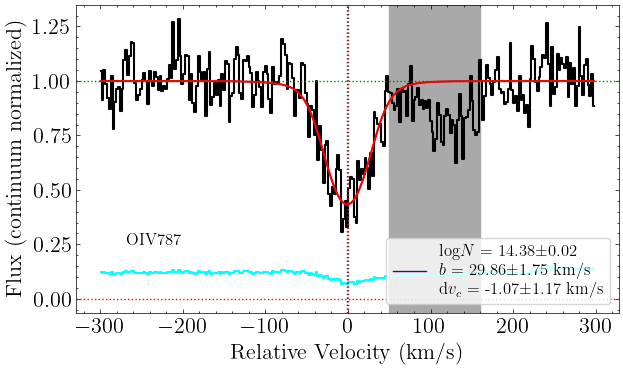

In [201]:
fig, ax = oiv_787_fuv.plot_ion_transition_best_fit()

## OIV ion
Now compile the OIV ion

In [202]:
oiv = ion(z_sys, 'OIV', [oiv_787_fuv])

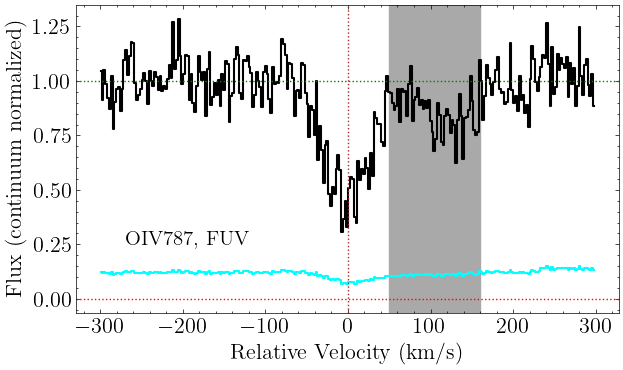

In [203]:
fig, axes = oiv.plot_ion()

In [204]:
oiv.init_ion([[[14.4, 30, 0]]])
#oiv.init_ion(np.array([[14.6,17,-1.45]]))

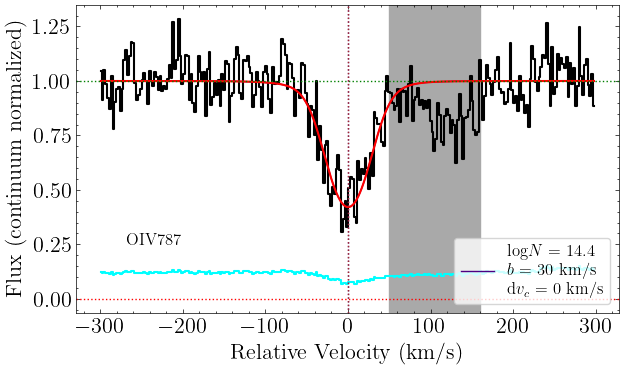

In [205]:
fig, axes = oiv.plot_ion_init_fit()

In [206]:
oiv.fit_ion(fix_params_list = ['it1c1_dv_c'])

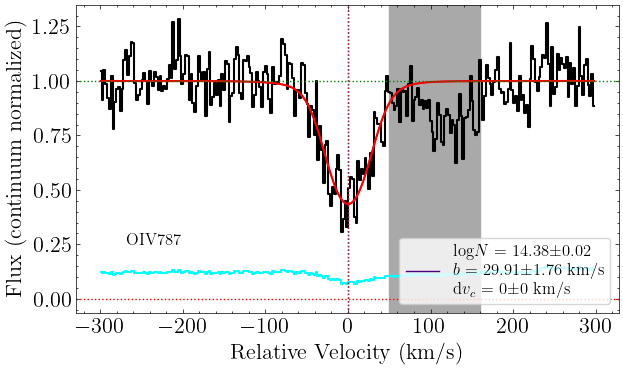

In [207]:
fig, axes = oiv.plot_ion_best_fit()

In [208]:
#oiv.fit_ion_emcee(loaddir=rootdir, scale_covar=1e-7, n_walkers=200, n_steps=2500)
oiv.fit_ion_emcee(load=True, loaddir=rootdir)

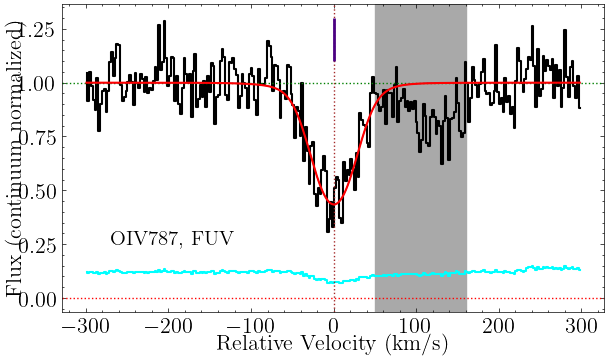

In [209]:
fig, axes = oiv.plot_samples()

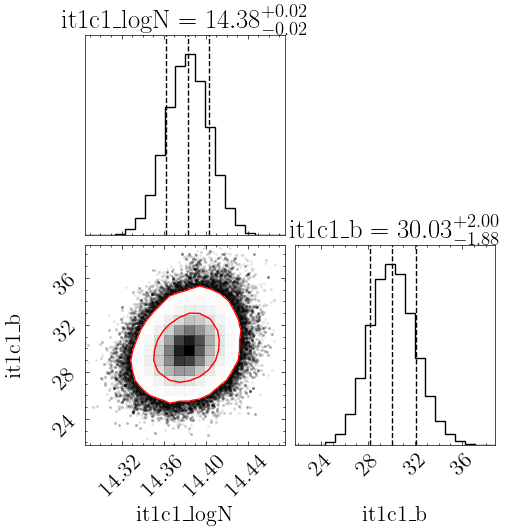

In [210]:
oiv.plot_corner()

# OVI

## OVI 1031
Get OVI 1031 from COS FUV

In [211]:
ovi_1031_fuv = ion_transition('OVI', 1031, 'O', z_sys, 'FUV')

In [212]:
ovi_1031_fuv.grab_ion_transition_info()

In [213]:
ovi_1031_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-220],[120,200],[260,300]])

In [214]:
ovi_1031_fuv.cont_norm_flux(v_abs_range=[-120,120], degree=1)

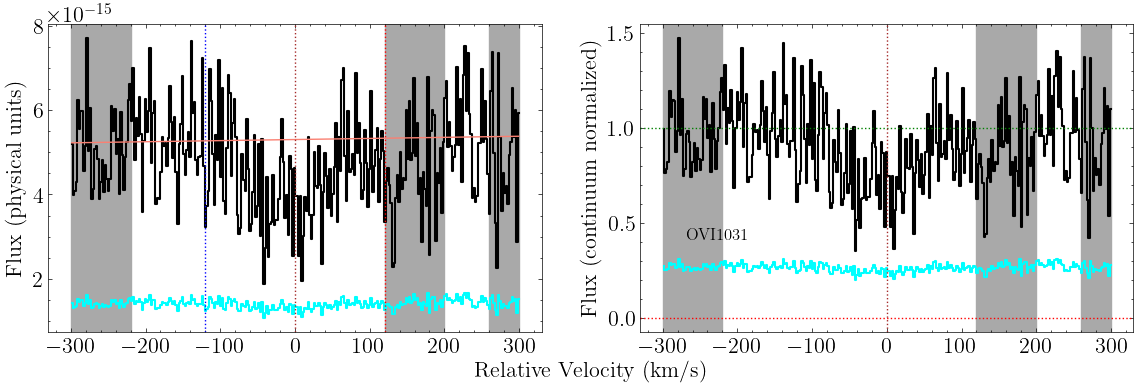

In [215]:
fig, ax = ovi_1031_fuv.plot_ion_transition_spec_cont()
#ax[0].axvline(100)

In [216]:
ovi_1031_fuv.cont_params

[5.301010403429266e-15, 2.5974845946063666e-19]

In [217]:
ovi_1031_fuv.get_EW_total(-120,120)

Integration window: [-120, 120]
EW, 1sig: 134, 20
EW-3sig: 59


In [218]:
ovi_1031_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [219]:
ovi_1031_fuv.init_ion_transition(init_values = np.array([[14.,60,0]]), 
                             lsf_convolve = True)

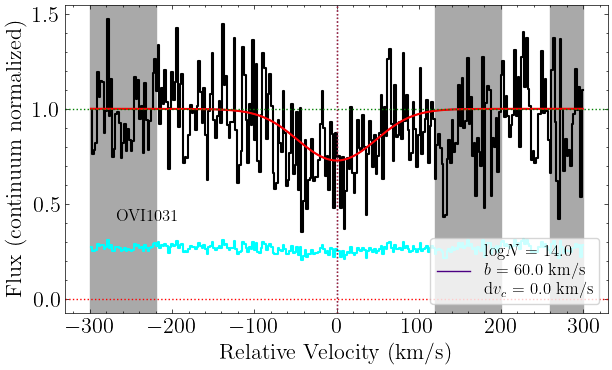

In [220]:
fig, ax = ovi_1031_fuv.plot_ion_transition_init_fit()

In [221]:
ovi_1031_fuv.fit_ion_transition()

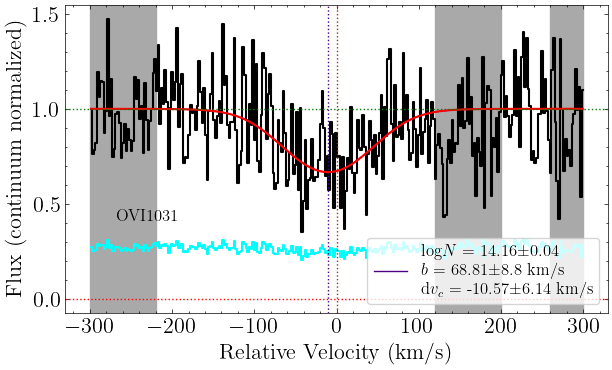

In [222]:
fig, ax = ovi_1031_fuv.plot_ion_transition_best_fit()

## OVI 1037

In [223]:
ovi_1037_fuv = ion_transition('OVI', 1037, 'O', z_sys, 'FUV')

In [224]:
ovi_1037_fuv.grab_ion_transition_info()

In [225]:
ovi_1037_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-260,-230],[190,300]])

In [226]:
ovi_1037_fuv.cont_norm_flux(v_abs_range=[-180,170], degree=1)

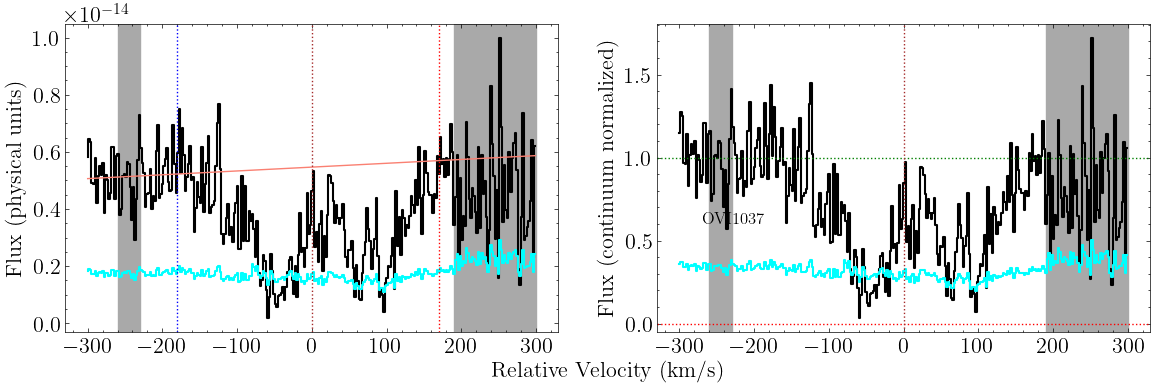

In [227]:
fig, ax = ovi_1037_fuv.plot_ion_transition_spec_cont()

In [228]:
ovi_1037_fuv.get_EW_total(-80,80)

Integration window: [-80, 80]
EW, 1sig: 296, 18
EW-3sig: 54


In [229]:
ovi_1037_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [230]:
ovi_1037_fuv.init_ion_transition(init_values = np.array([[14.17,76.0,0.0]]), 
                             lsf_convolve = True)

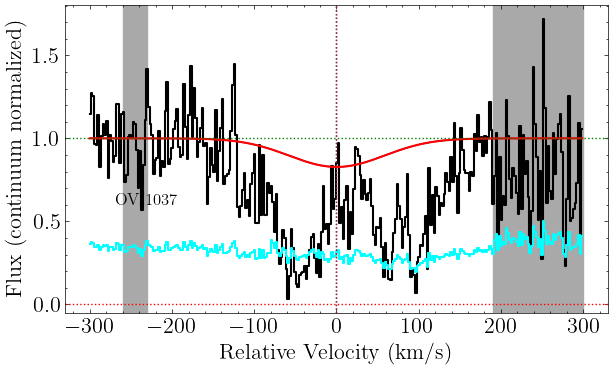

In [231]:
fig, ax = ovi_1037_fuv.plot_ion_transition_init_fit(legend=False)

## OVI ion
Now compile the OVI ion

In [232]:
ovi = ion(z_sys, 'OVI', [ovi_1031_fuv])

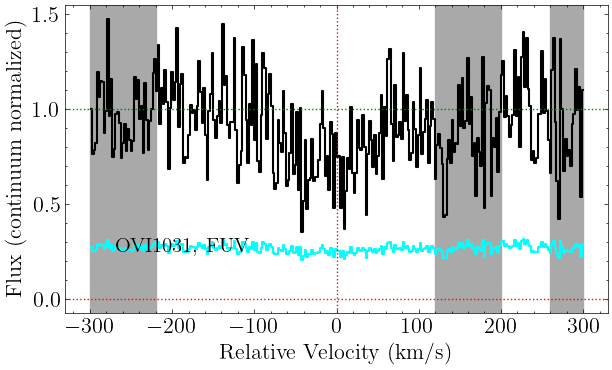

In [233]:
fig, axes = ovi.plot_ion()

In [234]:
ovi.init_ion([[[14.16, 68, 0]]])

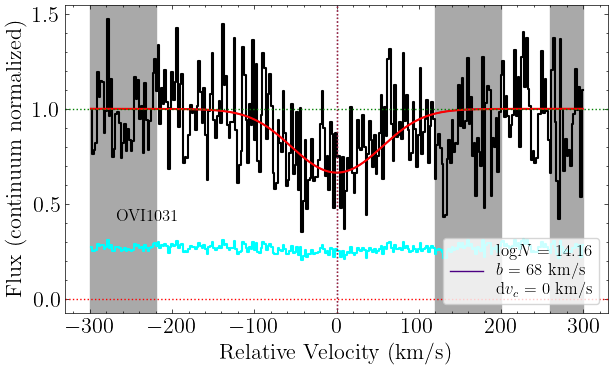

In [235]:
fig, axes = ovi.plot_ion_init_fit()

In [236]:
# For 1-component fit
ovi.fit_ion(upper_bounds_dict={'it1c1_b':130}, fix_params_list = ['it1c1_dv_c'])

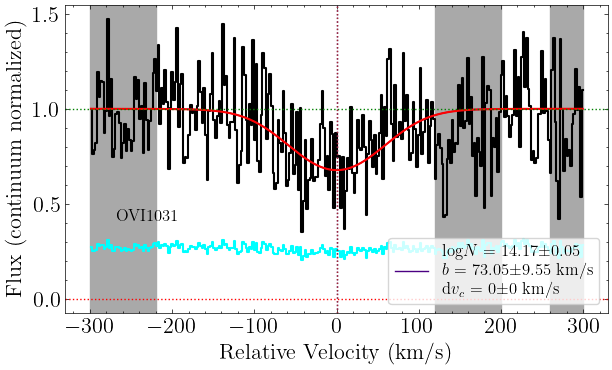

In [237]:
fig, axes = ovi.plot_ion_best_fit()

In [238]:
#ovi.fit_ion_emcee(loaddir=rootdir, scale_covar=1e-7, n_walkers=200, n_steps=2500)
ovi.fit_ion_emcee(load=True, loaddir=rootdir)

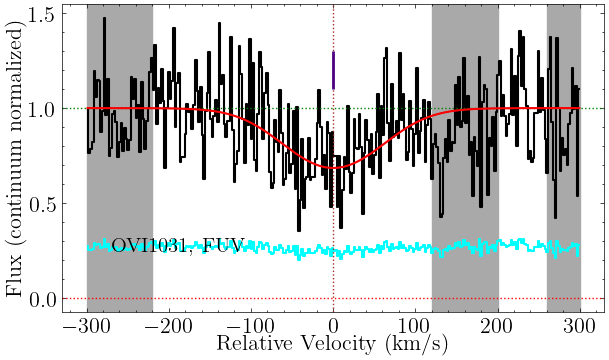

In [239]:
fig, axes = ovi.plot_samples()

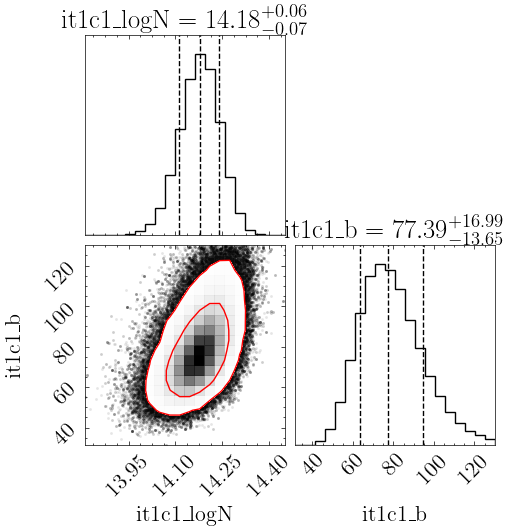

In [240]:
ovi.plot_corner()

# HI + CIII + OIII + OIV + OVI

In [241]:
hi_ciii_oiii_oiv_ovi = ion_suite(z_sys, 'HI+CIII+OIII+OIV+OVI', [hi, ciii, oiii, oiv, ovi])

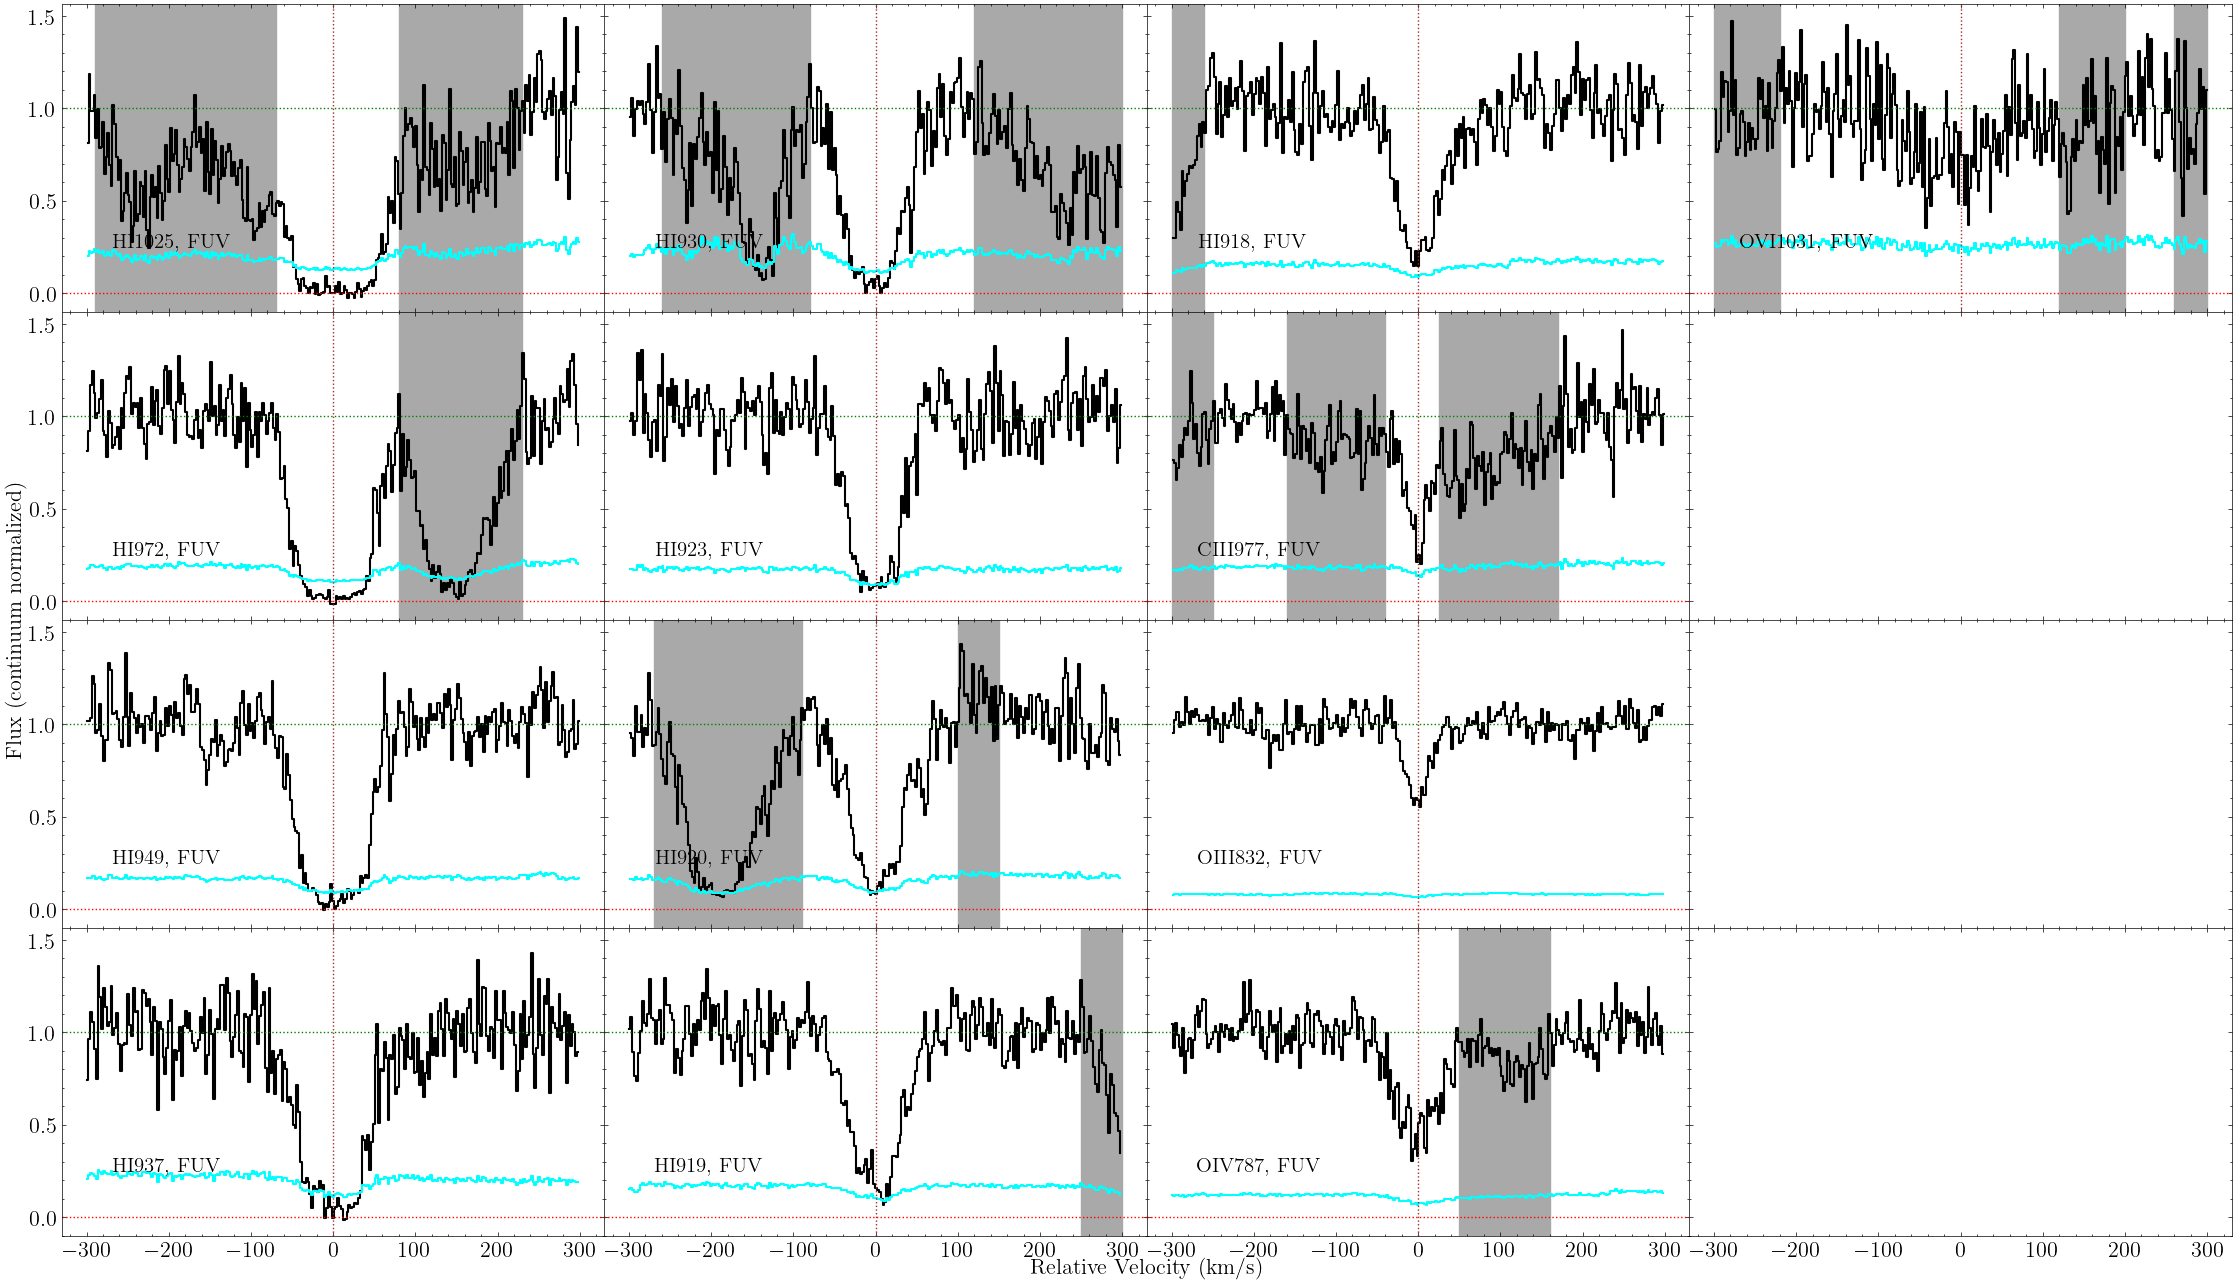

In [242]:
fig, axes = hi_ciii_oiii_oiv_ovi.plot_ion_suite(n_cols=4)

In [243]:
hi_ciii_oiii_oiv_ovi.init_ion_suite([[[16.63, 25, 0]],  # HI
                                  [[16.63, 25, 0]],
                                  [[16.63, 25, 0]],
                                  [[16.63, 25, 0]],
                                  [[16.63, 25, 0]],
                                  [[16.63, 25, 0]],
                                  [[16.63, 25, 0]],
                                  [[16.63, 25, 0]],
                                  [[16.63, 25, 0]],                           
                                  [[13.36, 14, 0]], # CIII
                                  [[13.96, 13, 0]], # OIII
                                  [[14.42, 30, 0]], # OIV
                                  [[14.02, 40, 0]], # OVI
                                    ] 
                                   ) 

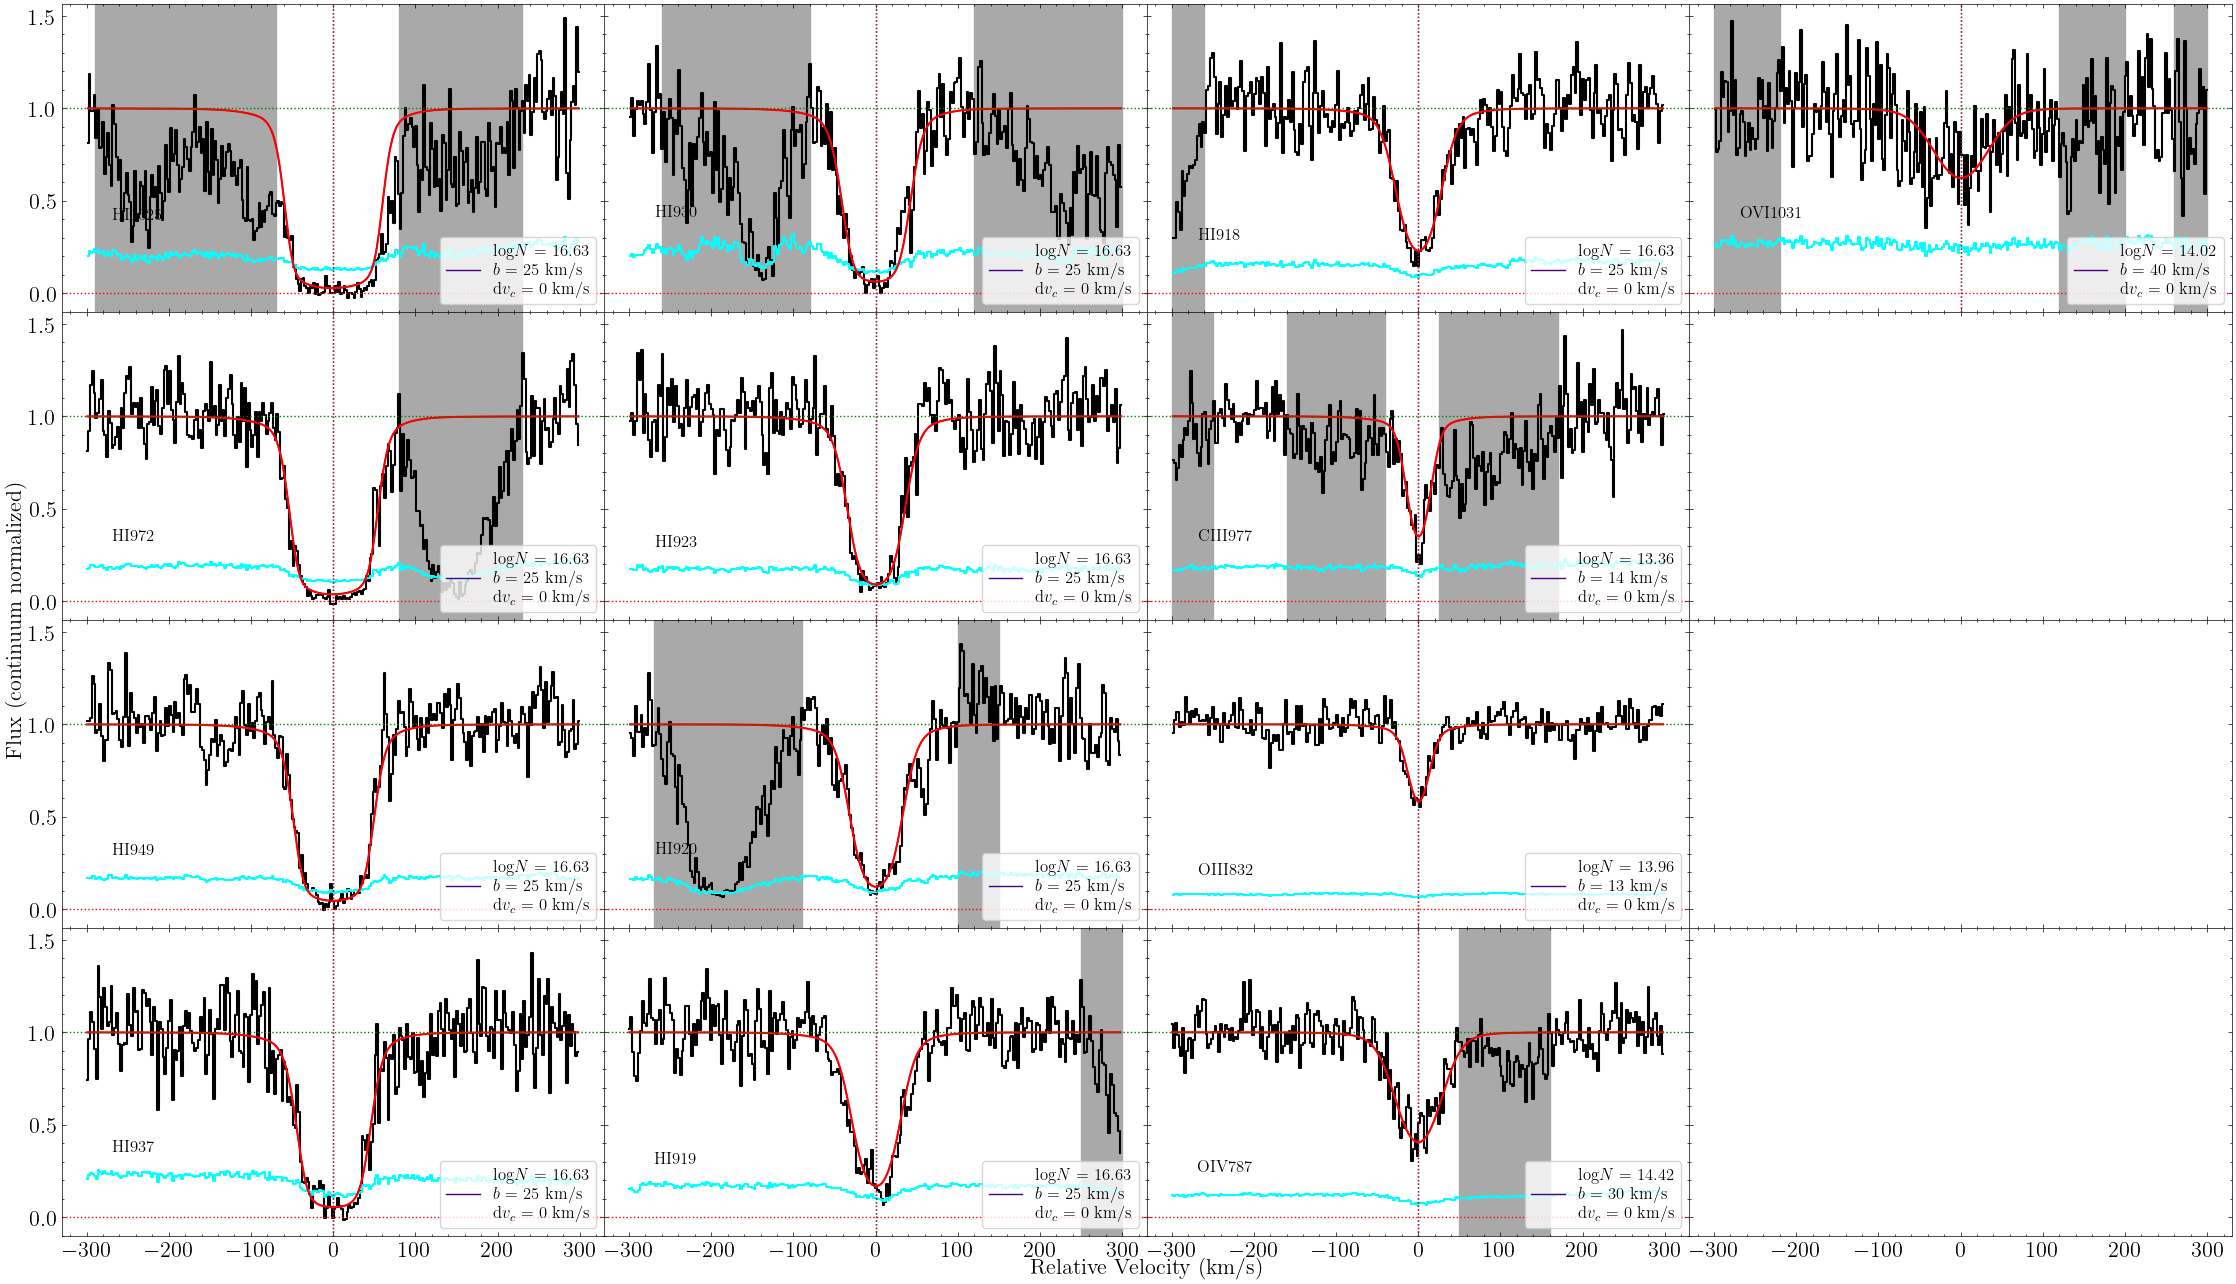

In [244]:
fig, axes = hi_ciii_oiii_oiv_ovi.plot_ion_suite_init_fit(n_cols=4)

In [245]:
hi_ciii_oiii_oiv_ovi.fit_ion_suite(tie_params_list=[['it1c1_logN','it2c1_logN'], # Tie logN for HI transitions together
                                   ['it1c1_logN','it3c1_logN'],             
                                   ['it1c1_logN','it4c1_logN'],
                                   ['it1c1_logN','it5c1_logN'],
                                   ['it1c1_logN','it6c1_logN'],
                                   ['it1c1_logN','it7c1_logN'],
                                   ['it1c1_logN','it8c1_logN'],             
                                   ['it1c1_logN','it9c1_logN'],  
                                   ['it1c1_b','it2c1_b'], # Tie b for HI transitions together
                                   ['it1c1_b','it3c1_b'],             
                                   ['it1c1_b','it4c1_b'],
                                   ['it1c1_b','it5c1_b'],
                                   ['it1c1_b','it6c1_b'],
                                   ['it1c1_b','it7c1_b'],
                                   ['it1c1_b','it8c1_b'],             
                                   ['it1c1_b','it9c1_b'],  
                                   ['it1c1_dv_c','it2c1_dv_c'], # Tie all centroids together
                                   ['it1c1_dv_c','it3c1_dv_c'],
                                   ['it1c1_dv_c','it4c1_dv_c'],
                                   ['it1c1_dv_c','it5c1_dv_c'],
                                   ['it1c1_dv_c','it6c1_dv_c'],
                                   ['it1c1_dv_c','it7c1_dv_c'],                                               
                                   ['it1c1_dv_c','it8c1_dv_c'],                                               
                                   ['it1c1_dv_c','it9c1_dv_c'],       
                                   ['it1c1_dv_c','it10c1_dv_c'],                                                
                                   ['it1c1_dv_c','it11c1_dv_c'],     
                                   ['it1c1_dv_c','it12c1_dv_c'],
                                   ['it1c1_dv_c','it13c1_dv_c']],
                                  lower_bounds_dict = {'it10c1_b':8},
                                  upper_bounds_dict = {'it13c1_b':130})

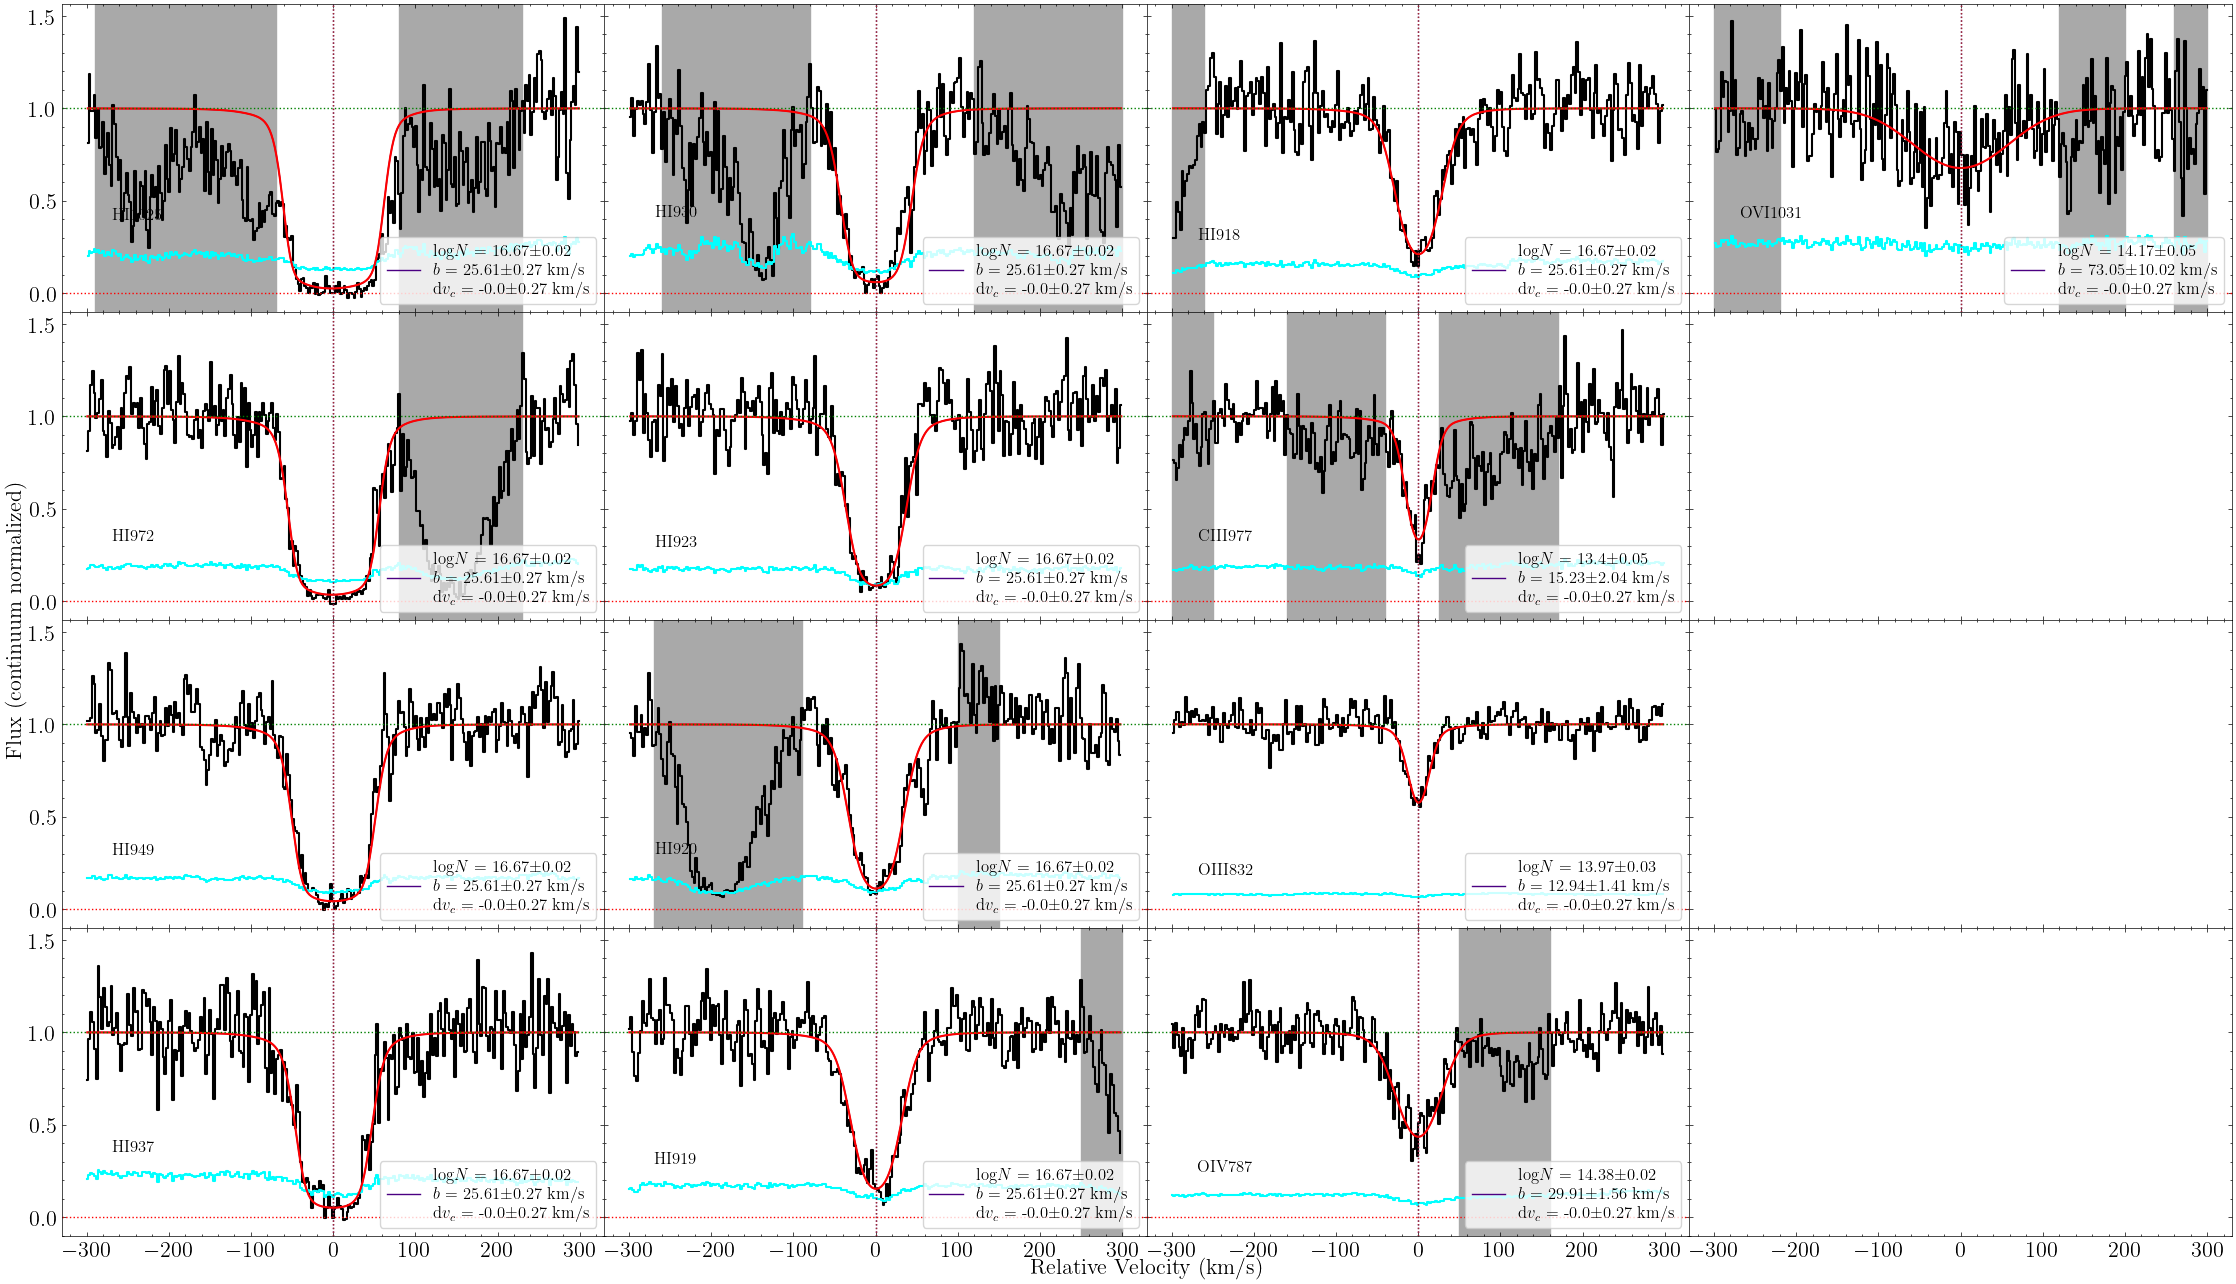

In [246]:
fig, axes = hi_ciii_oiii_oiv_ovi.plot_ion_suite_best_fit(n_cols=4)

In [247]:
#hi_ciii_oiii_oiv_ovi.fit_ion_suite_emcee(loaddir=rootdir, n_walkers=200, scale_covar=1e-7, n_steps=5000)
hi_ciii_oiii_oiv_ovi.fit_ion_suite_emcee(load=True, loaddir=rootdir)

100%|███████████████████████████████████████| 5000/5000 [57:29<00:00,  1.45it/s]


The chain is shorter than 50 times the integrated autocorrelation time for 11 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 100;
tau: [122.21199016 115.15405294 113.01903538 149.63149729 143.42804721
 111.29792271 110.5497015  105.99047647 105.56154429 113.09592852
 114.03492648]


In [270]:
#hi_ciii_oiii_oiv_ovi.plot_corner()

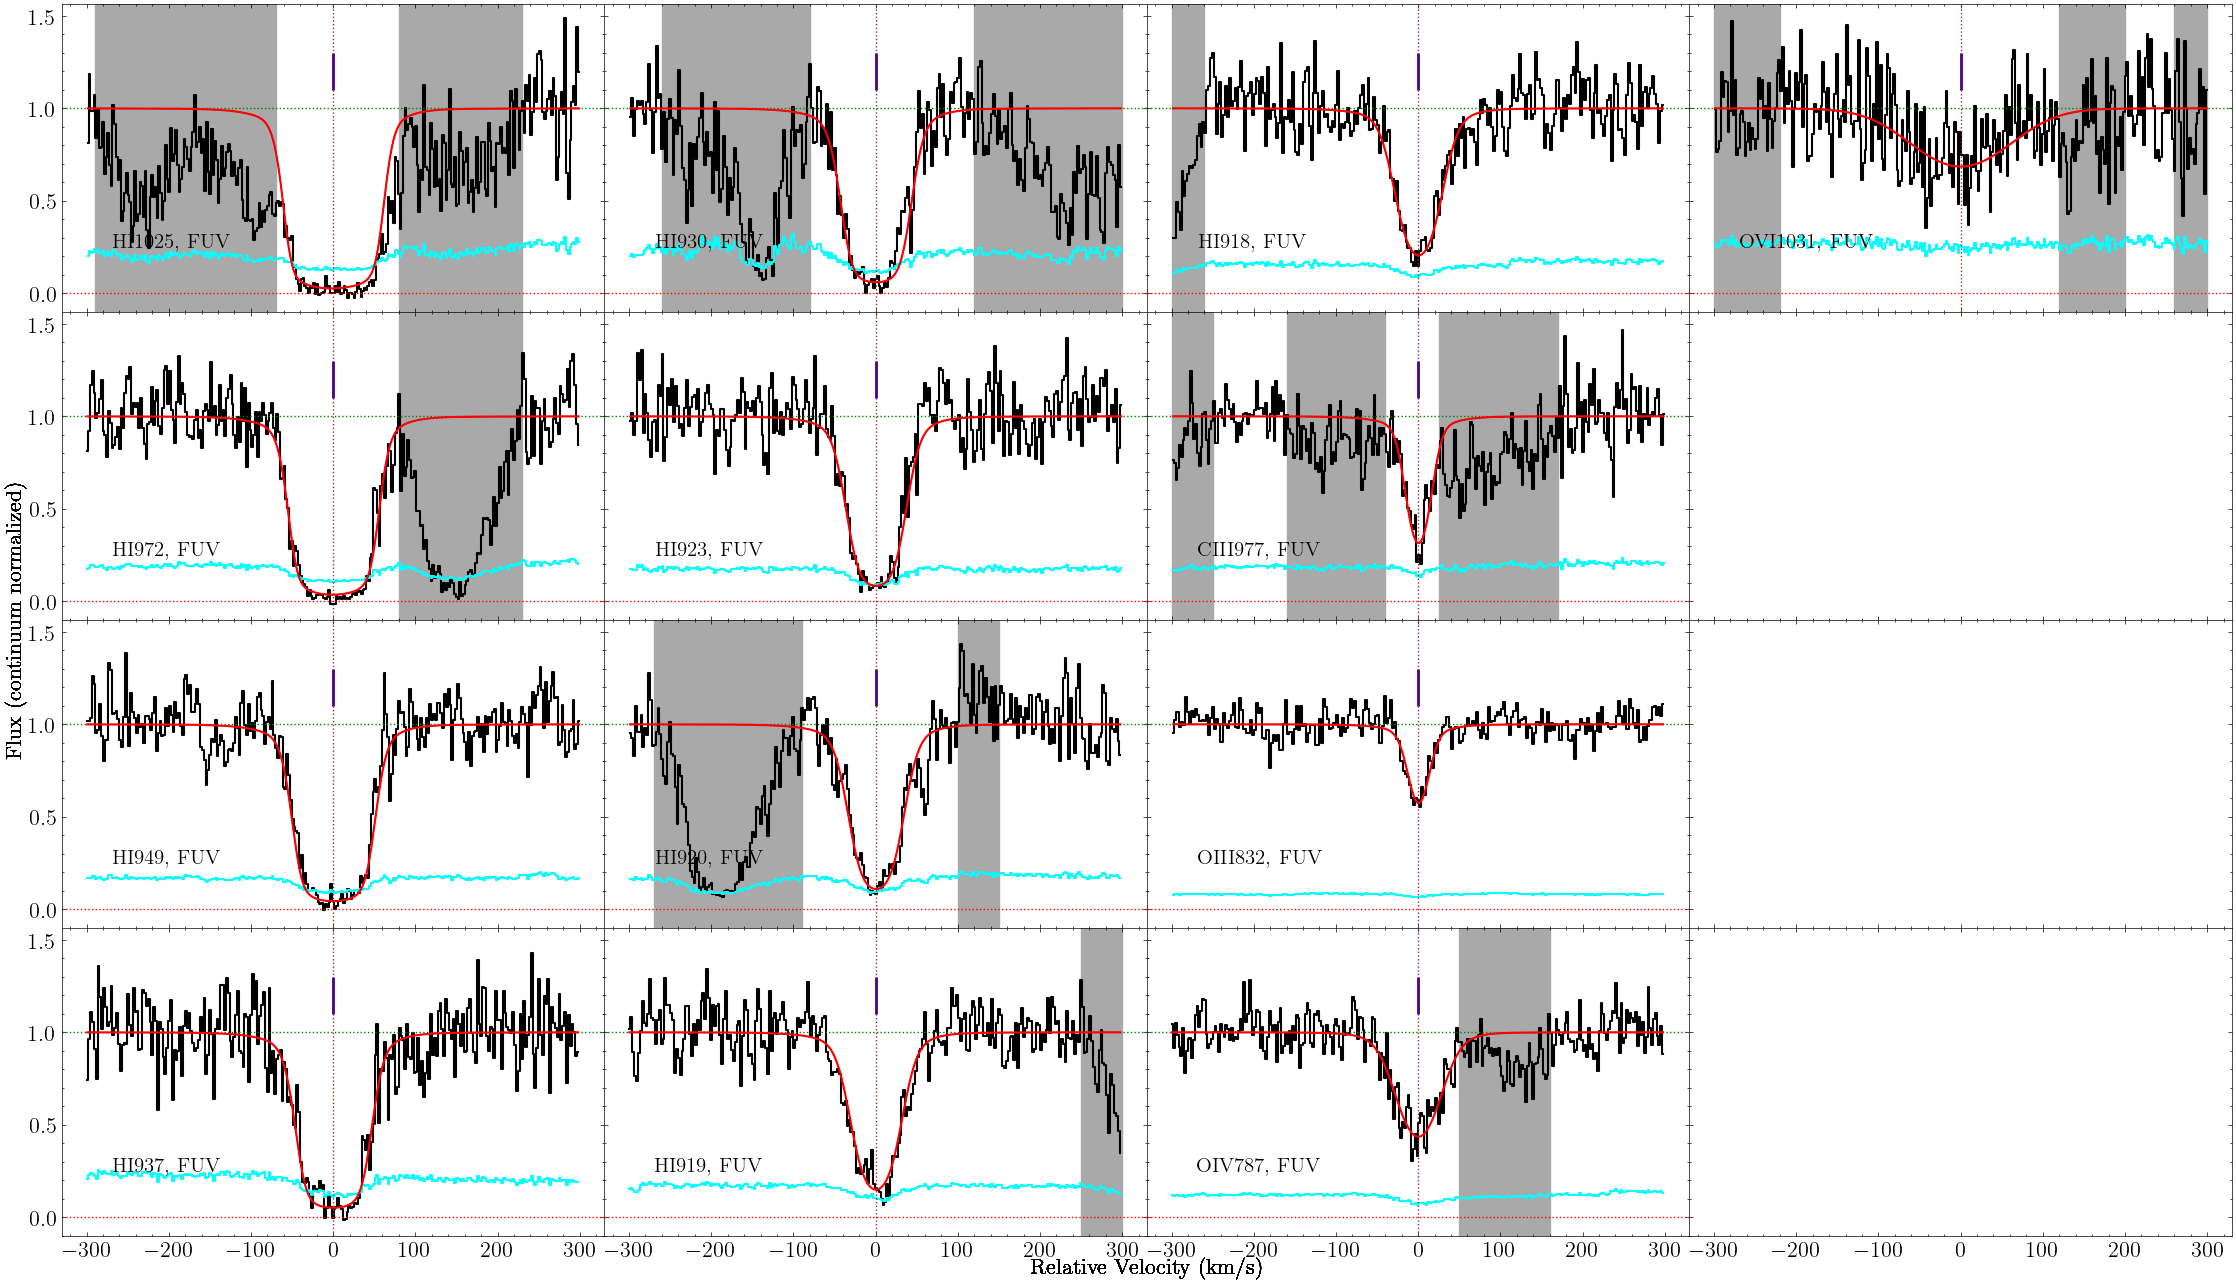

In [249]:
fig, axes = hi_ciii_oiii_oiv_ovi.plot_samples(n_cols=4)

In [250]:
#np.percentile(hi_ciii_oiii_oiv_ovi.result_emcee.flatchain['it10c1_b'], 100*cdf_3sig)

# CIV

## CIV 1548 (STIS)

In [251]:
civ_1548_stis = ion_transition('CIV', 1548, 'C', z_sys, 'STIS')

In [252]:
civ_1548_stis.grab_ion_transition_info()

In [253]:
civ_1548_stis.grab_ion_transition_spec(spec_fits_list, v_range=[-300,300], masks=[[-180,-80]])

In [254]:
civ_1548_stis.cont_norm_flux(v_abs_range=[-50,50], degree=1)

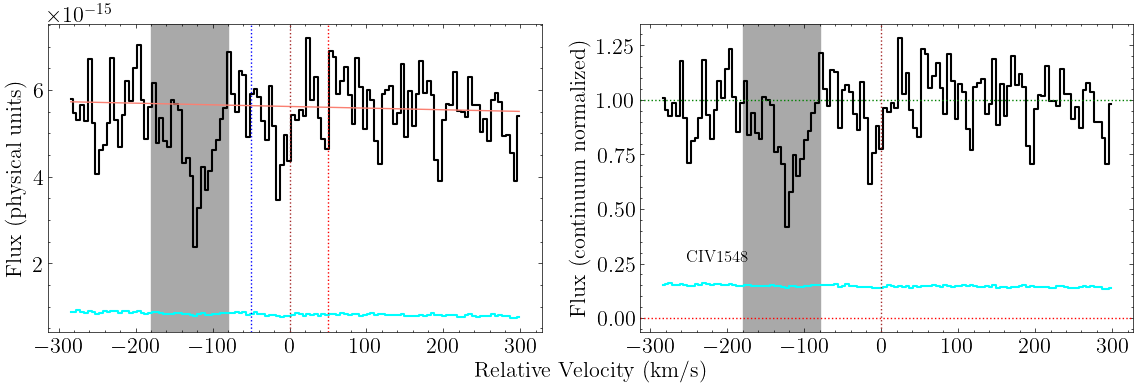

In [255]:
fig, ax = civ_1548_stis.plot_ion_transition_spec_cont()

In [256]:
civ_1548_stis.grab_ion_transition_lsf(lsf_fits_list)

In [257]:
civ_1548_stis.get_upper_lim(14)

logN-1sig: 10.4
logN-2sig: 12.1
logN-3sig: 12.7


In [258]:
civ_1548_stis.init_ion_transition(init_values = np.array([[12.6,14,0]]), 
                             lsf_convolve = True)

## CIV 1550 (STIS)

In [259]:
civ_1550_stis = ion_transition('CIV', 1550, 'C', z_sys, 'STIS')

In [260]:
civ_1550_stis.grab_ion_transition_info()

In [261]:
civ_1550_stis.grab_ion_transition_spec(spec_fits_list, masks=[[-120,-80]])

In [262]:
civ_1550_stis.cont_norm_flux(v_abs_range=[-45,40], degree=1)

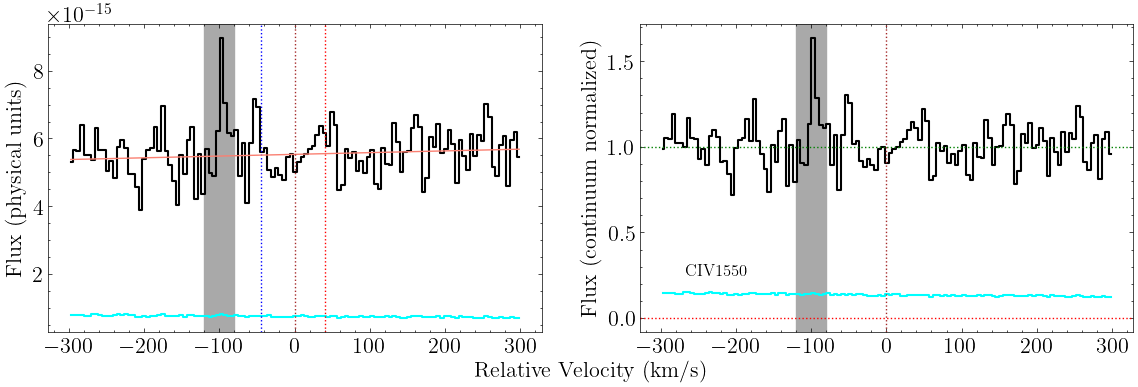

In [263]:
fig, ax = civ_1550_stis.plot_ion_transition_spec_cont()

In [264]:
civ_1550_stis.grab_ion_transition_lsf(lsf_fits_list)

In [265]:
civ_1550_stis.get_upper_lim(14)

logN-1sig: 10.7
logN-2sig: 12.4
logN-3sig: 12.9


In [266]:
civ_1550_stis.init_ion_transition(init_values = np.array([[12.9,14,0]]), 
                             lsf_convolve = True)

# Summary List
Now compile a summary list

In [267]:
summary = ion_summary([hi_ciii_oiii_oiv_ovi])

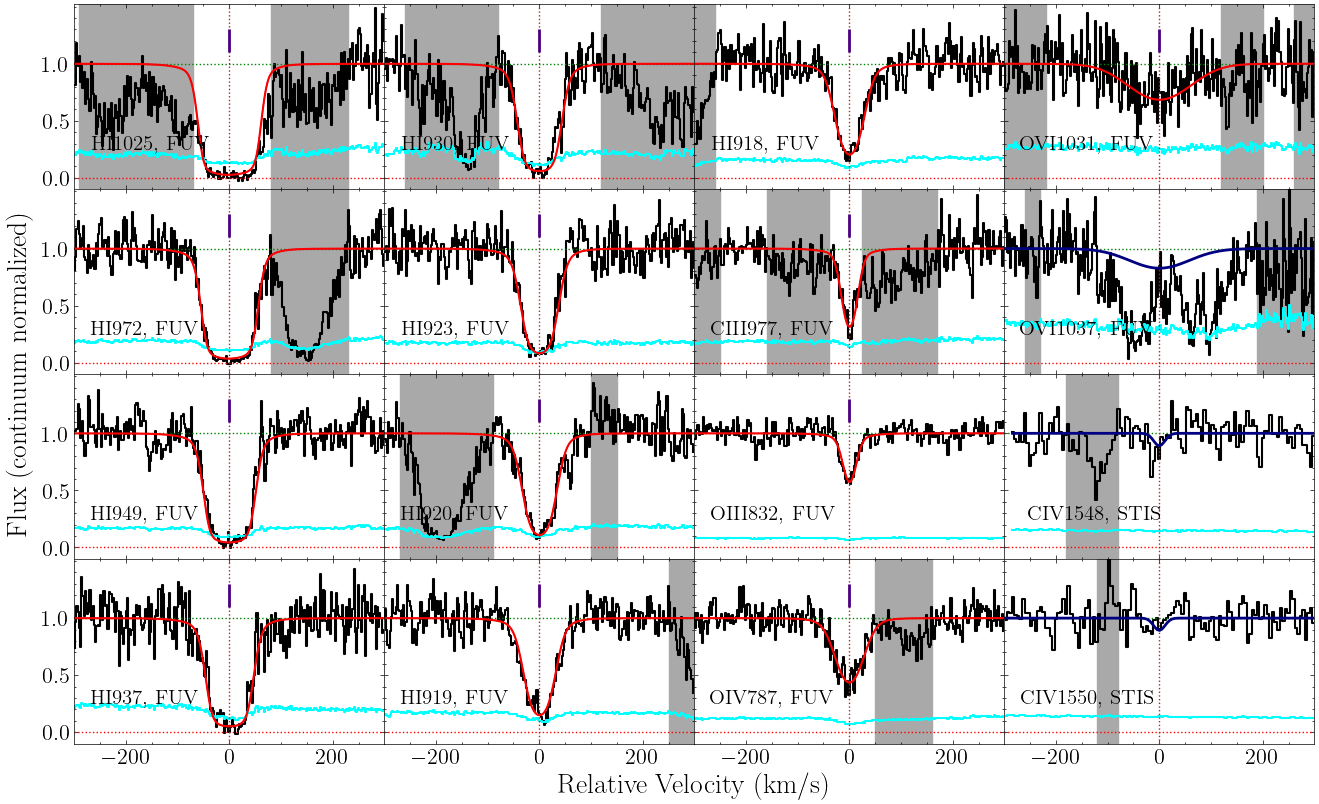

In [268]:
fig, axes = plt.subplots(4, 4, figsize=(4*4, 2.4*4), sharex=True, sharey=True)

summary.plot_samples(fig = fig, axes=axes, n_cols=4)

ovi_1037_fuv.plot_ion_transition_spec(fig=fig, ax=axes[1,3], draw_cont_bounds=False, label_axes=False)
axes[1,3].plot(ovi_1037_fuv.v, ovi_1037_fuv.init_total_flux, color='navy', lw=2)

civ_1548_stis.plot_ion_transition_spec(fig=fig, ax=axes[2,3], draw_cont_bounds=False, label_axes=False)
axes[2,3].plot(civ_1548_stis.v, civ_1548_stis.init_total_flux, color='navy', lw=2)

civ_1550_stis.plot_ion_transition_spec(fig=fig, ax=axes[3,3], draw_cont_bounds=False, label_axes=False)
axes[3,3].plot(civ_1550_stis.v, civ_1550_stis.init_total_flux, color='navy', lw=2)

axes[0,0].set_ylim(-0.1,1.52)
axes[0,0].set_xlim(-299.9,299.9)
axes[0,0].set_yticks([0,0.5,1])

plt.savefig(rootdir+'Ions/z={}/z={}_vp.pdf'.format(str(z_sys), str(z_sys).replace('.', '_')), dpi=300)

In [269]:
summary.print_summary()

HI1025
dv_c = 0.0 \pm 0.4, logN = 16.68 \pm 0.02, b = 25.5 \pm 0.4
HI972
dv_c = 0.0 \pm 0.4, logN = 16.68 \pm 0.02, b = 25.5 \pm 0.4
HI949
dv_c = 0.0 \pm 0.4, logN = 16.68 \pm 0.02, b = 25.5 \pm 0.4
HI937
dv_c = 0.0 \pm 0.4, logN = 16.68 \pm 0.02, b = 25.5 \pm 0.4
HI930
dv_c = 0.0 \pm 0.4, logN = 16.68 \pm 0.02, b = 25.5 \pm 0.4
HI923
dv_c = 0.0 \pm 0.4, logN = 16.68 \pm 0.02, b = 25.5 \pm 0.4
HI920
dv_c = 0.0 \pm 0.4, logN = 16.68 \pm 0.02, b = 25.5 \pm 0.4
HI919
dv_c = 0.0 \pm 0.4, logN = 16.68 \pm 0.02, b = 25.5 \pm 0.4
HI918
dv_c = 0.0 \pm 0.4, logN = 16.68 \pm 0.02, b = 25.5 \pm 0.4
CIII977
dv_c = 0.0 \pm 0.4, logN = 13.42 \pm 0.10, b = 14.7_{-3.3}^{+3.6}
OIII832
dv_c = 0.0 \pm 0.4, logN = 13.97 \pm 0.03, b = 12.9_{-1.7}^{+1.8}
OIV787
dv_c = 0.0 \pm 0.4, logN = 14.38 \pm 0.02, b = 30.0_{-1.9}^{+2.0}
OVI1031
dv_c = 0.0 \pm 0.4, logN = 14.18 \pm 0.07, b = 77.3_{-13.7}^{+16.8}


# CII

## CII 903.9

In [269]:
cii_904_fuv = ion_transition('CII', 903.9, 'C', z_sys, 'FUV')

In [270]:
cii_904_fuv.grab_ion_transition_info()

In [271]:
cii_904_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-220,-120],[180,300]])

In [272]:
cii_904_fuv.cont_norm_flux(v_abs_range=[-100,100], degree=1)

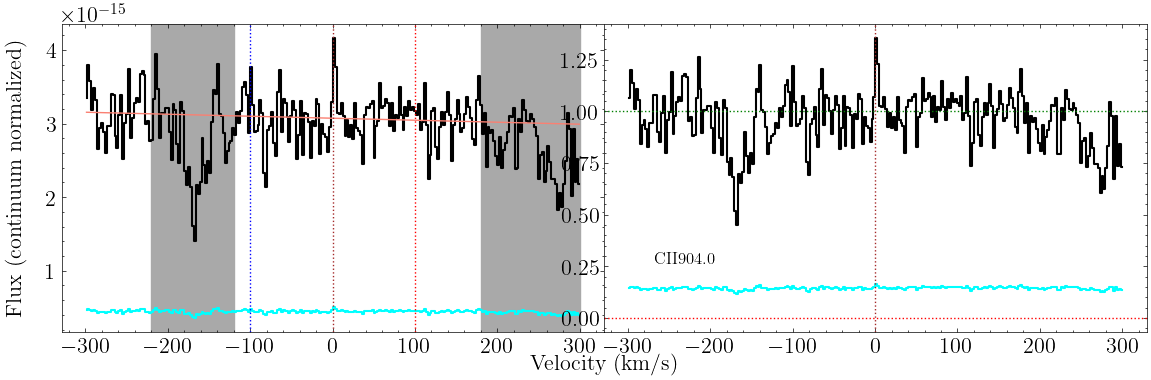

In [273]:
fig, ax = cii_904_fuv.plot_ion_transition_spec_cont()

In [274]:
cii_904_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [275]:
cii_904_fuv.init_ion_transition(init_values = np.array([[14,13.8,0]]), 
                             lsf_convolve = True)

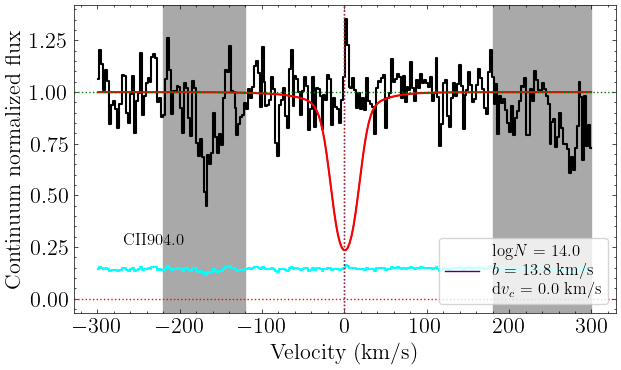

In [276]:
fig, ax = cii_904_fuv.plot_ion_transition_init_fit()

In [287]:
cii_904_fuv.get_upper_lim(14)

logN-1sig: 10.4
logN-2sig: 12.1
logN-3sig: 12.6


## CII 903.6

In [288]:
cii_903_fuv = ion_transition('CII', 903.6, 'C', z_sys, 'FUV')

In [289]:
cii_903_fuv.grab_ion_transition_info()

In [290]:
cii_903_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-100,0]])

In [291]:
cii_903_fuv.cont_norm_flux(v_abs_range=[-100,100], degree=1)

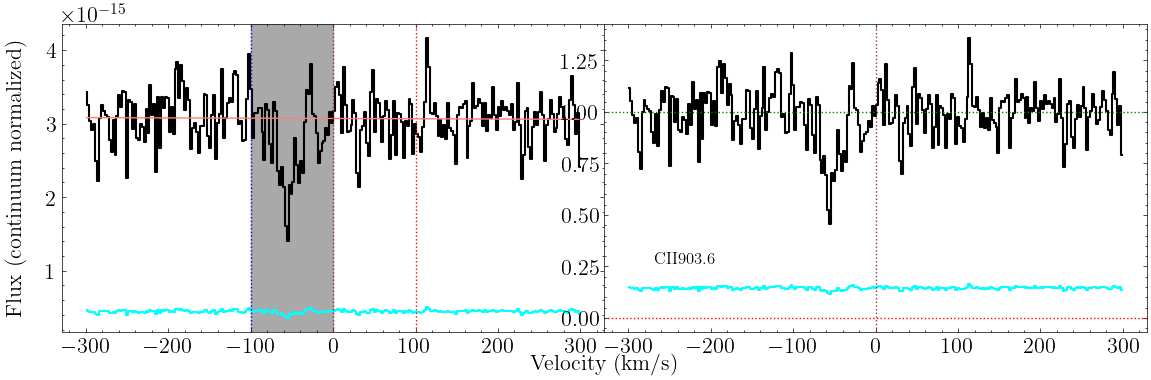

In [292]:
fig, ax = cii_903_fuv.plot_ion_transition_spec_cont()

In [293]:
cii_903_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [294]:
cii_903_fuv.init_ion_transition(init_values = np.array([[14,13.8,0]]), 
                             lsf_convolve = True)

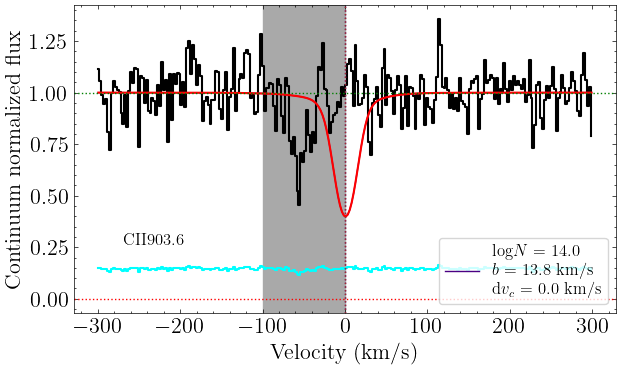

In [295]:
fig, ax = cii_903_fuv.plot_ion_transition_init_fit()

In [296]:
cii_903_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [297]:
cii_903_fuv.get_upper_lim(14)

logN-1sig: 10.6
logN-2sig: 12.4
logN-3sig: 12.9


## CII 1334 (STIS)

In [306]:
cii_1334_stis = ion_transition('CII', 1334, 'C', z_sys, 'STIS')

In [307]:
cii_1334_stis.grab_ion_transition_info()

In [308]:
cii_1334_stis.grab_ion_transition_spec(spec_fits_list, masks=[[-190,0],[125,300]])

In [309]:
cii_1334_stis.cont_norm_flux(v_abs_range=[-100,50], degree=1)

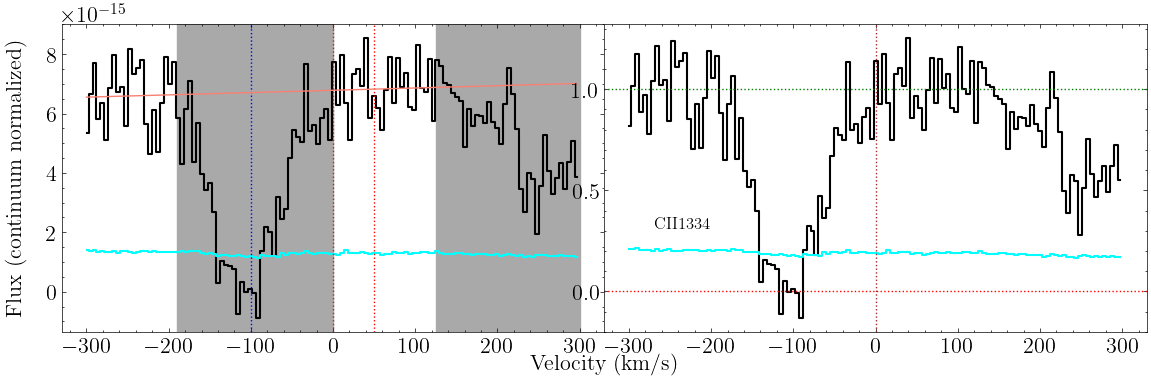

In [310]:
fig, ax = cii_1334_stis.plot_ion_transition_spec_cont()

In [311]:
cii_1334_stis.grab_ion_transition_lsf(lsf_fits_list)

In [312]:
cii_1334_stis.get_upper_lim(14)

logN-1sig: 10.7
logN-2sig: 12.5
logN-3sig: 13.0


## CII 1036

In [313]:
cii_1036_fuv = ion_transition('CII', 1036, 'C', z_sys, 'FUV')

In [314]:
cii_1036_fuv.grab_ion_transition_info()

In [315]:
cii_1036_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[200,300]])

In [316]:
cii_1036_fuv.cont_norm_flux(v_abs_range=[-100,100], degree=1)

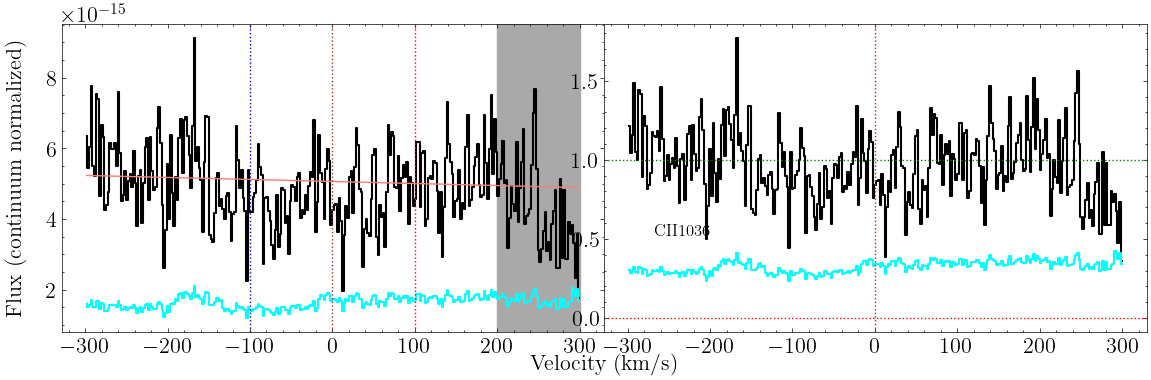

In [317]:
fig, ax = cii_1036_fuv.plot_ion_transition_spec_cont()

In [318]:
cii_1036_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [319]:
cii_1036_fuv.get_upper_lim(14)

logN-1sig: 11.0
logN-2sig: 12.8
logN-3sig: 13.3


# NII

## NII 1083 (NUV)

In [320]:
nii_1083_nuv = ion_transition('NII', 1083, 'N', z_sys, 'NUV')

In [321]:
nii_1083_nuv.grab_ion_transition_info()

In [322]:
nii_1083_nuv.grab_ion_transition_spec(spec_fits_list)

In [323]:
nii_1083_nuv.cont_norm_flux(v_abs_range=[-100,100], degree=1)

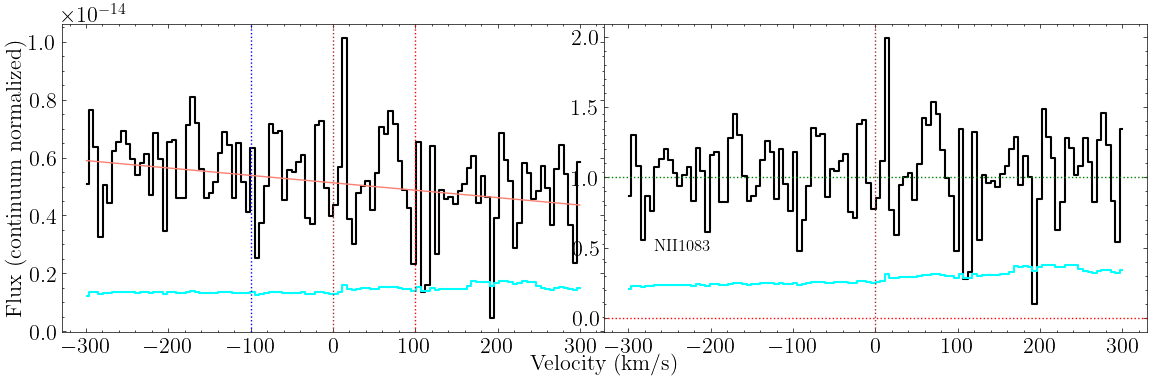

In [324]:
fig, ax = nii_1083_nuv.plot_ion_transition_spec_cont()

In [325]:
nii_1083_nuv.grab_ion_transition_lsf(lsf_fits_list)

In [326]:
nii_1083_nuv.init_ion_transition(init_values = np.array([[14.0,39,0]]), 
                             lsf_convolve = True)

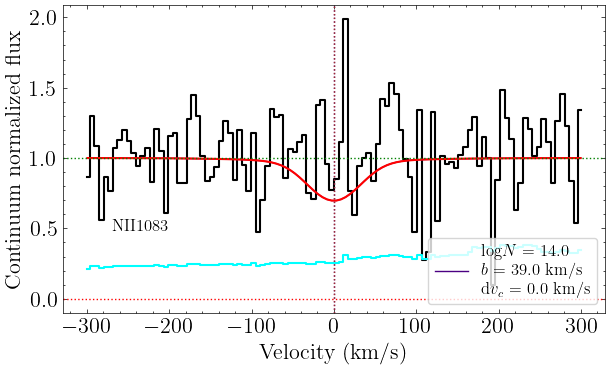

In [327]:
fig, ax = nii_1083_nuv.plot_ion_transition_init_fit()

In [328]:
nii_1083_nuv.get_upper_lim(14)

logN-1sig: 11.1
logN-2sig: 13.0
logN-3sig: 13.5


# NIII

## NIII 989

In [329]:
niii_989_fuv = ion_transition('NIII', 989, 'N', z_sys, 'FUV')

In [330]:
niii_989_fuv.grab_ion_transition_info()

In [331]:
niii_989_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-270],[270,300]])

In [332]:
niii_989_fuv.cont_norm_flux(v_abs_range=[-100,100], degree=1)

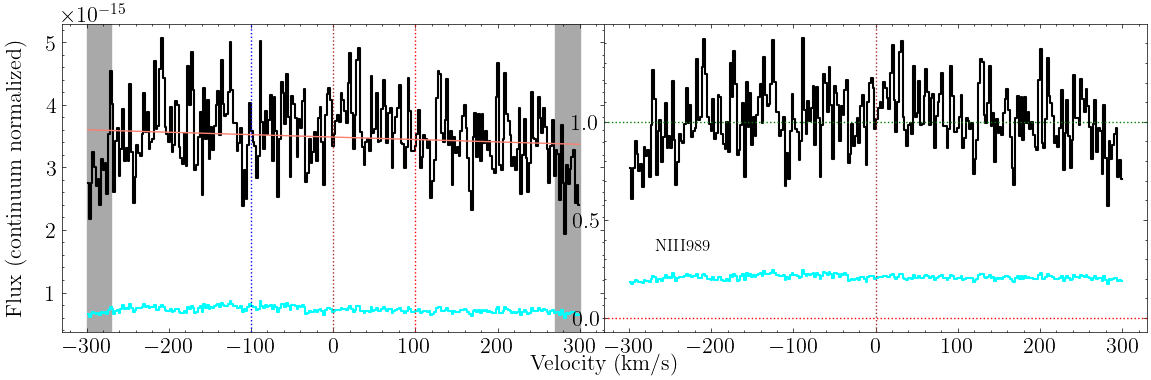

In [333]:
fig, ax = niii_989_fuv.plot_ion_transition_spec_cont()

In [334]:
niii_989_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [335]:
niii_989_fuv.init_ion_transition(init_values = np.array([[14.5,39,0]]), 
                             lsf_convolve = True)

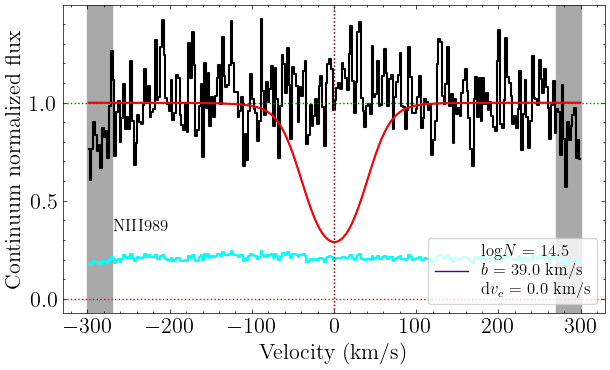

In [337]:
fig, ax = niii_989_fuv.plot_ion_transition_init_fit()

In [338]:
niii_989_fuv.get_upper_lim(14)

logN-1sig: 10.8
logN-2sig: 12.6
logN-3sig: 13.1


## NIII 686

In [339]:
niii_686_fuv = ion_transition('NIII', 686, 'N', z_sys, 'FUV')

In [340]:
niii_686_fuv.grab_ion_transition_info()

In [341]:
niii_686_fuv.grab_ion_transition_spec(spec_fits_list, v_range=[-300,300], masks=[[100,300]])

In [342]:
niii_686_fuv.cont_norm_flux(v_abs_range=[-100,100], degree=1)

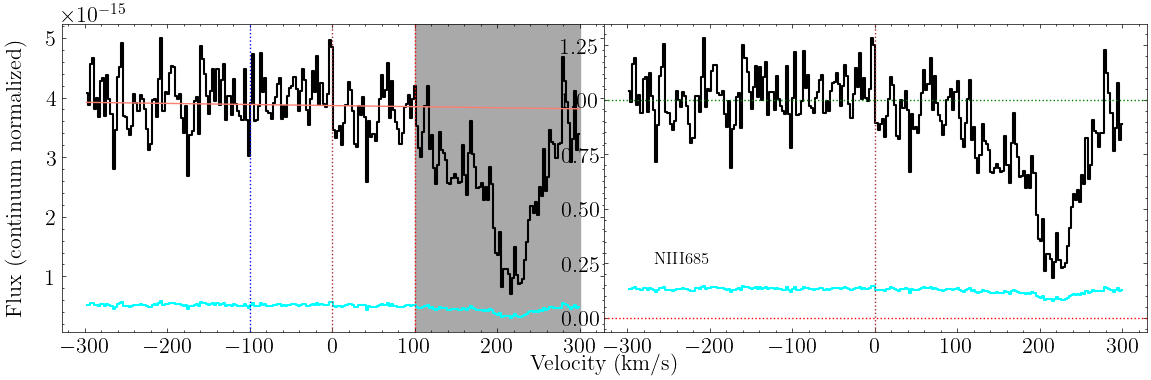

In [343]:
fig, ax = niii_686_fuv.plot_ion_transition_spec_cont()

In [344]:
niii_686_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [346]:
niii_686_fuv.get_upper_lim(14)

logN-1sig: 10.5
logN-2sig: 12.3
logN-3sig: 12.8


## NIII 684

In [347]:
niii_684_fuv = ion_transition('NIII', 684, 'N', z_sys, 'FUV')

In [348]:
niii_684_fuv.grab_ion_transition_info()

In [349]:
niii_684_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-135]])

In [350]:
niii_684_fuv.cont_norm_flux(v_abs_range=[-100,100], degree=1)

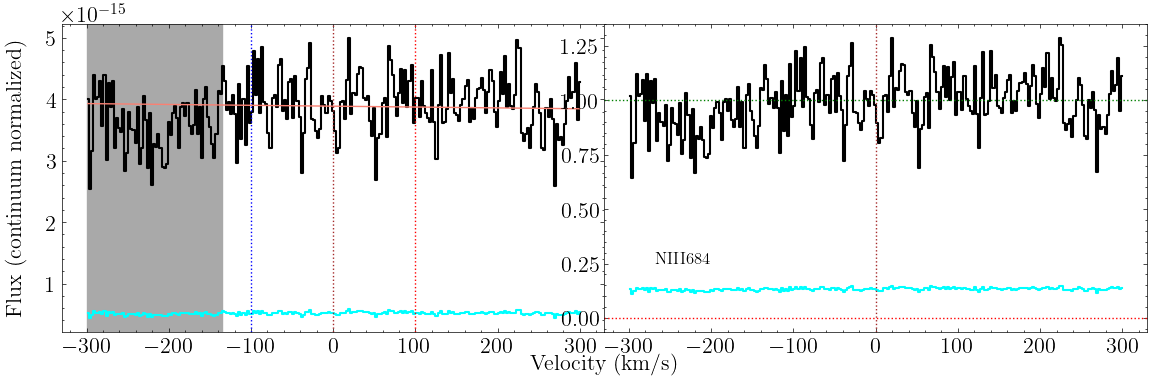

In [351]:
fig, ax = niii_684_fuv.plot_ion_transition_spec_cont()

In [352]:
niii_684_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [353]:
niii_684_fuv.get_upper_lim(14)

logN-1sig: 10.8
logN-2sig: 12.6
logN-3sig: 13.1


# NIV

## NIV 765

In [354]:
niv_765_fuv = ion_transition('NIV', 765, 'N', z_sys, 'FUV')

In [355]:
niv_765_fuv.grab_ion_transition_info()

In [356]:
niv_765_fuv.grab_ion_transition_spec(spec_fits_list)

In [357]:
niv_765_fuv.cont_norm_flux(v_abs_range=[-100,100], degree=1)

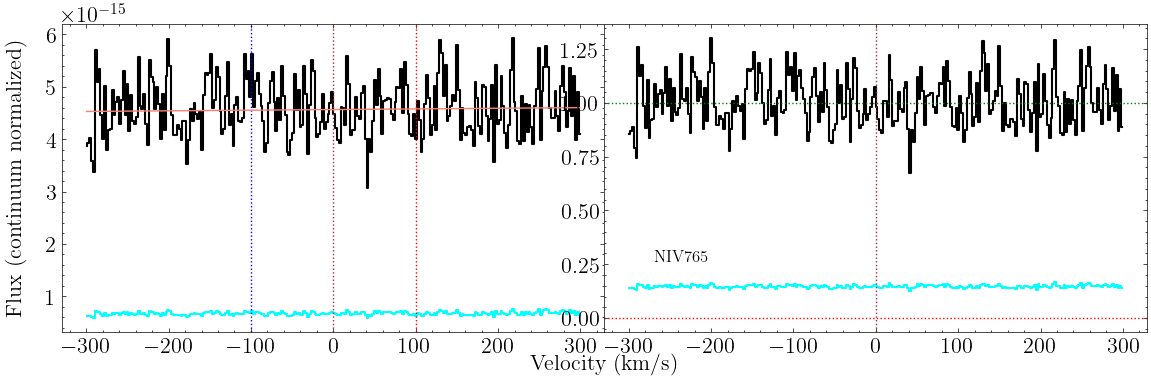

In [358]:
fig, ax = niv_765_fuv.plot_ion_transition_spec_cont()

In [359]:
niv_765_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [360]:
niv_765_fuv.get_upper_lim(14)

logN-1sig: 10.2
logN-2sig: 11.9
logN-3sig: 12.4


# OII

## OII 834

In [361]:
oii_834_fuv = ion_transition('OII', 834, 'O', z_sys, 'FUV')

In [362]:
oii_834_fuv.grab_ion_transition_info()

In [363]:
oii_834_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-200,0],[120,300]])

In [364]:
oii_834_fuv.cont_norm_flux(v_abs_range=[-100,100], degree=1)

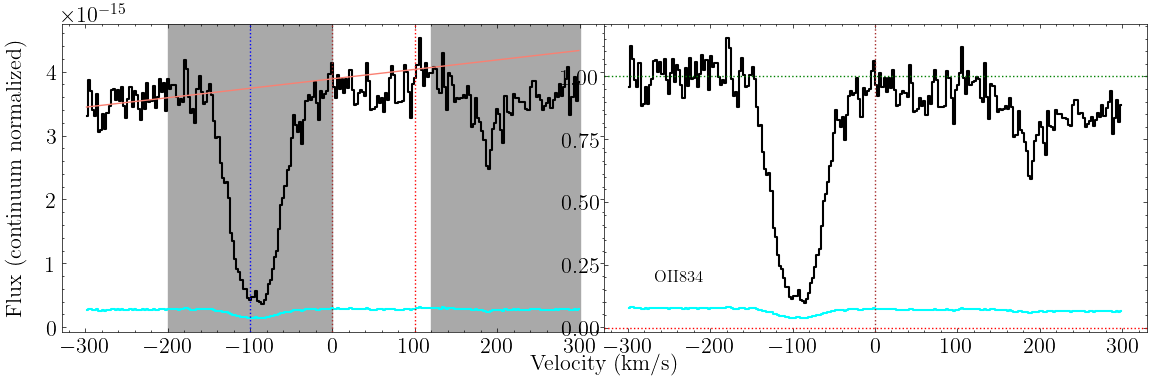

In [365]:
fig, ax = oii_834_fuv.plot_ion_transition_spec_cont()

In [366]:
oii_834_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [368]:
oii_834_fuv.get_upper_lim(14)

logN-1sig: 10.5
logN-2sig: 12.2
logN-3sig: 12.7


# NeVIII

## NeVIII 780

In [369]:
neviii_780_fuv = ion_transition('NeVIII', 780, 'Ne', z_sys, 'FUV')

In [370]:
neviii_780_fuv.grab_ion_transition_info()

In [371]:
neviii_780_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[110,300]])

In [372]:
neviii_780_fuv.cont_norm_flux(v_abs_range=[-100,100], degree=1)

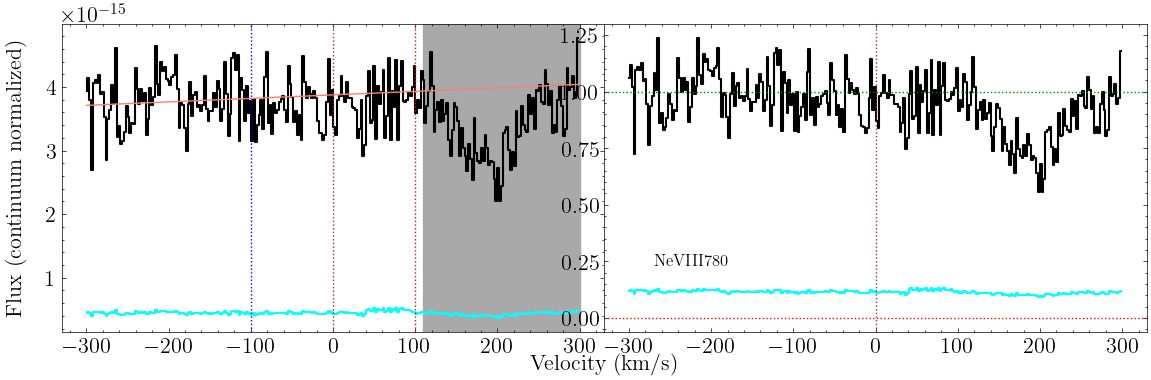

In [373]:
fig, ax = neviii_780_fuv.plot_ion_transition_spec_cont()

In [374]:
neviii_780_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [376]:
neviii_780_fuv.get_upper_lim(13)

logN-1sig: 11.0
logN-2sig: 12.8
logN-3sig: 13.3


# MgII

## MgII 2796 (HIRES)

In [377]:
mgii_2796_hires = ion_transition('MgII', 2796, 'Mg', z_sys, 'HIRES')

In [378]:
mgii_2796_hires.grab_ion_transition_info()

In [379]:
mgii_2796_hires.grab_ion_transition_spec(spec_fits_list)

In [380]:
mgii_2796_hires.cont_norm_flux(v_abs_range=[-100,100], degree=1)

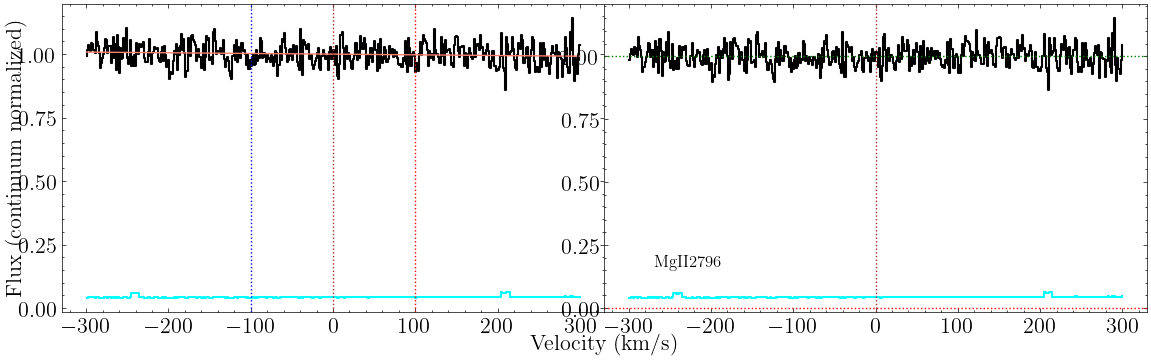

In [381]:
fig, ax = mgii_2796_hires.plot_ion_transition_spec_cont()

In [382]:
mgii_2796_hires.grab_ion_transition_lsf(lsf_fits_list)

In [383]:
mgii_2796_hires.get_upper_lim(13)

logN-1sig: 9.0
logN-2sig: 10.6
logN-3sig: 11.0


## MgII 2803 (HIRES)

In [384]:
mgii_2803_hires = ion_transition('MgII', 2803, 'Mg', z_sys, 'HIRES')

In [385]:
mgii_2803_hires.grab_ion_transition_info()

In [386]:
mgii_2803_hires.grab_ion_transition_spec(spec_fits_list)

In [387]:
mgii_2803_hires.cont_norm_flux(v_abs_range=[-100,100], degree=1)

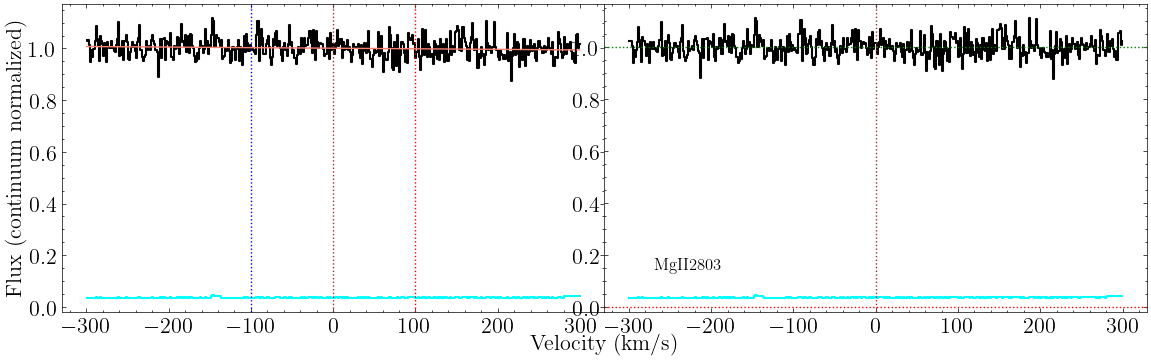

In [388]:
fig, ax = mgii_2803_hires.plot_ion_transition_spec_cont()

In [389]:
mgii_2803_hires.grab_ion_transition_lsf(lsf_fits_list)

In [390]:
mgii_2803_hires.get_upper_lim(13)

logN-1sig: 9.2
logN-2sig: 10.8
logN-3sig: 11.3


# AlIII

## AlIII 1862 (HIRES)

In [391]:
aliii_1862_hires = ion_transition('AlIII', 1862, 'Al', z_sys, 'HIRES')

In [392]:
aliii_1862_hires.grab_ion_transition_info()

In [393]:
aliii_1862_hires.grab_ion_transition_spec(spec_fits_list)

In [394]:
aliii_1862_hires.cont_norm_flux(v_abs_range=[-100,100], degree=1)

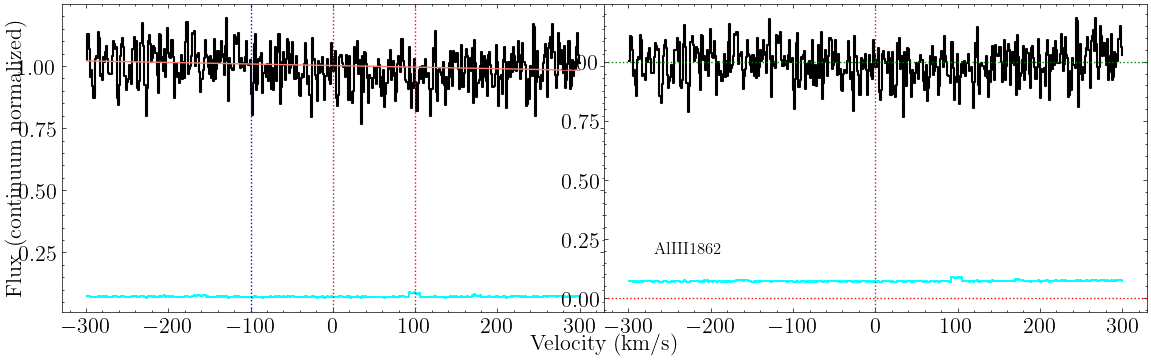

In [395]:
fig, ax = aliii_1862_hires.plot_ion_transition_spec_cont()

In [396]:
aliii_1862_hires.grab_ion_transition_lsf(lsf_fits_list)

In [397]:
aliii_1862_hires.get_upper_lim(13)

logN-1sig: 9.7
logN-2sig: 11.3
logN-3sig: 11.8


## AlIII 1854 (HIRES)

In [398]:
aliii_1854_hires = ion_transition('AlIII', 1854, 'Al', z_sys, 'HIRES')

In [399]:
aliii_1854_hires.grab_ion_transition_info()

In [400]:
aliii_1854_hires.grab_ion_transition_spec(spec_fits_list)

In [401]:
aliii_1854_hires.cont_norm_flux(v_abs_range=[-100,100], degree=1)

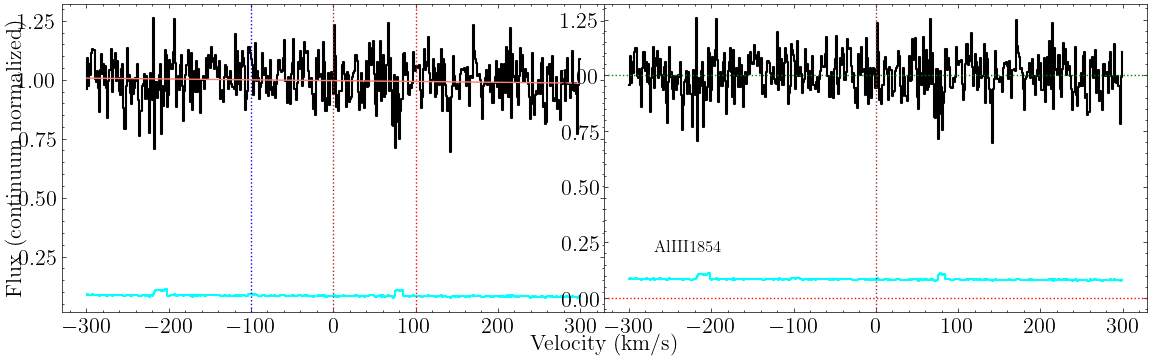

In [402]:
fig, ax = aliii_1854_hires.plot_ion_transition_spec_cont()

In [403]:
aliii_1854_hires.grab_ion_transition_lsf(lsf_fits_list)

In [404]:
aliii_1854_hires.get_upper_lim(13)

logN-1sig: 9.5
logN-2sig: 11.1
logN-3sig: 11.5


# SiII

## SiII 1526 (STIS)

In [405]:
siii_1526_stis = ion_transition('SiII', 1526, 'Si', z_sys, 'STIS')

In [406]:
siii_1526_stis.grab_ion_transition_info()

In [407]:
siii_1526_stis.grab_ion_transition_spec(spec_fits_list)

In [408]:
siii_1526_stis.cont_norm_flux(v_abs_range=[-100,100], degree=1)

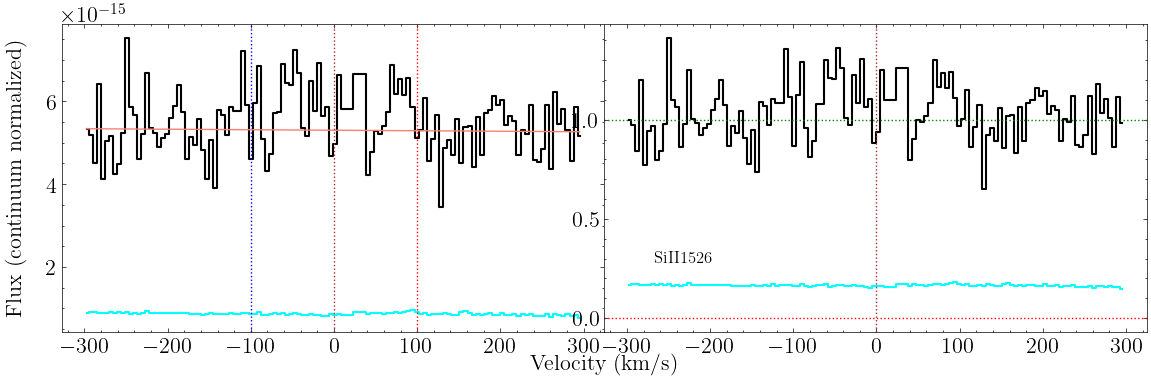

In [409]:
fig, ax = siii_1526_stis.plot_ion_transition_spec_cont()

In [410]:
siii_1526_stis.grab_ion_transition_lsf(lsf_fits_list)

In [411]:
siii_1526_stis.get_upper_lim(13)

logN-1sig: 10.6
logN-2sig: 12.3
logN-3sig: 12.9


## SiII 1260 (STIS)

In [412]:
siii_1260_stis = ion_transition('SiII', 1260, 'Si', z_sys, 'STIS')

In [413]:
siii_1260_stis.grab_ion_transition_info()

In [414]:
siii_1260_stis.grab_ion_transition_spec(spec_fits_list)

In [415]:
siii_1260_stis.cont_norm_flux(v_abs_range=[-100,100], degree=1)

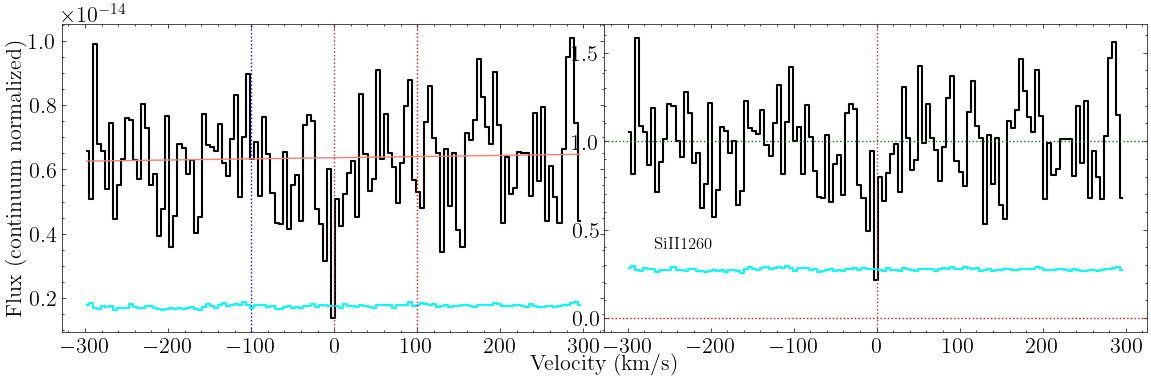

In [416]:
fig, ax = siii_1260_stis.plot_ion_transition_spec_cont()

In [417]:
siii_1260_stis.grab_ion_transition_lsf(lsf_fits_list)

In [418]:
siii_1260_stis.get_upper_lim(13)

logN-1sig: 10.1
logN-2sig: 11.8
logN-3sig: 12.3


## SiII 1193 (STIS)

In [419]:
siii_1193_stis = ion_transition('SiII', 1193, 'Si', z_sys, 'STIS')

In [420]:
siii_1193_stis.grab_ion_transition_info()

In [421]:
siii_1193_stis.grab_ion_transition_spec(spec_fits_list)

In [422]:
siii_1193_stis.cont_norm_flux(v_abs_range=[-150,150], degree=1)

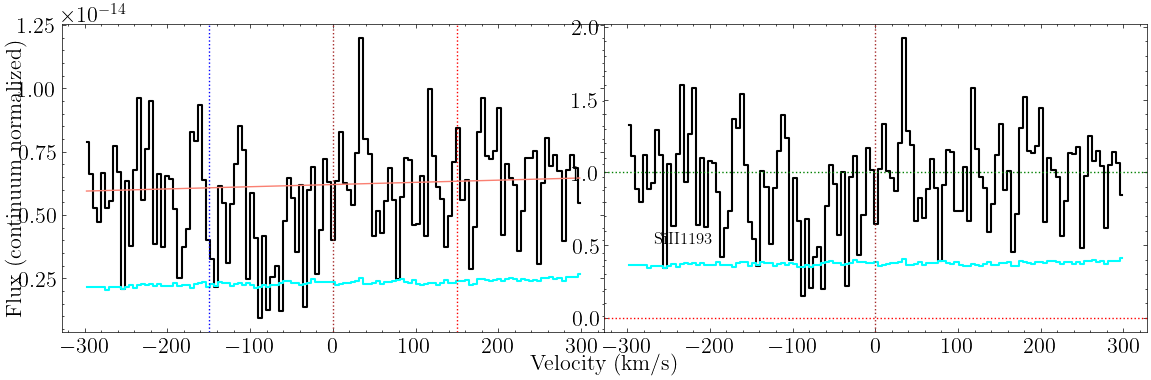

In [423]:
fig, ax = siii_1193_stis.plot_ion_transition_spec_cont()

In [424]:
siii_1193_stis.grab_ion_transition_lsf(lsf_fits_list)

In [425]:
siii_1193_stis.get_upper_lim(13)

logN-1sig: 10.5
logN-2sig: 12.2
logN-3sig: 12.8


## SiII 1190 (STIS)

In [426]:
siii_1190_stis = ion_transition('SiII', 1190, 'Si', z_sys, 'STIS')

In [427]:
siii_1190_stis.grab_ion_transition_info()

In [428]:
siii_1190_stis.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-50]])

In [429]:
siii_1190_stis.cont_norm_flux(v_abs_range=[-50,50], degree=1)

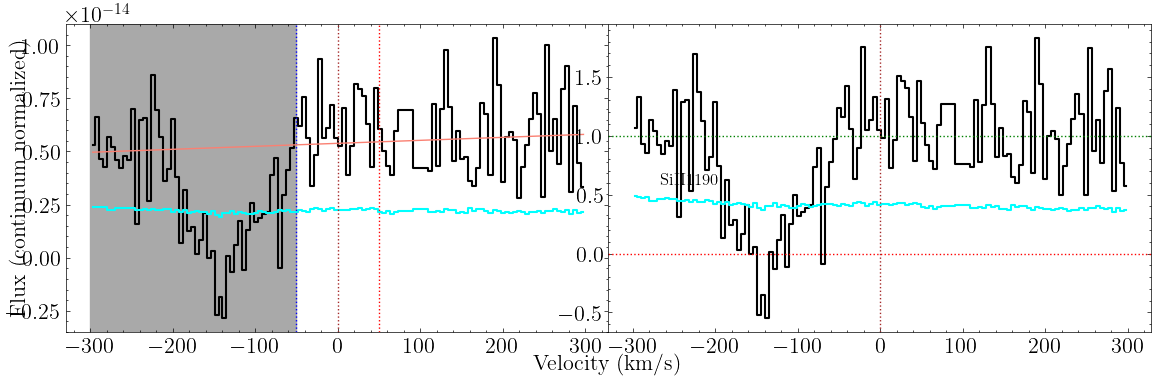

In [430]:
fig, ax = siii_1190_stis.plot_ion_transition_spec_cont()

In [431]:
siii_1190_stis.grab_ion_transition_lsf(lsf_fits_list)

In [432]:
siii_1190_stis.get_upper_lim(13)

logN-1sig: 10.8
logN-2sig: 12.6
logN-3sig: 13.1


## SiII 989

In [433]:
siii_989_fuv = ion_transition('SiII', 989, 'Si', z_sys, 'FUV')

In [434]:
siii_989_fuv.grab_ion_transition_info()

In [435]:
siii_989_fuv.grab_ion_transition_spec(spec_fits_list)

In [436]:
siii_989_fuv.cont_norm_flux(v_abs_range=[-100,100], degree=1)

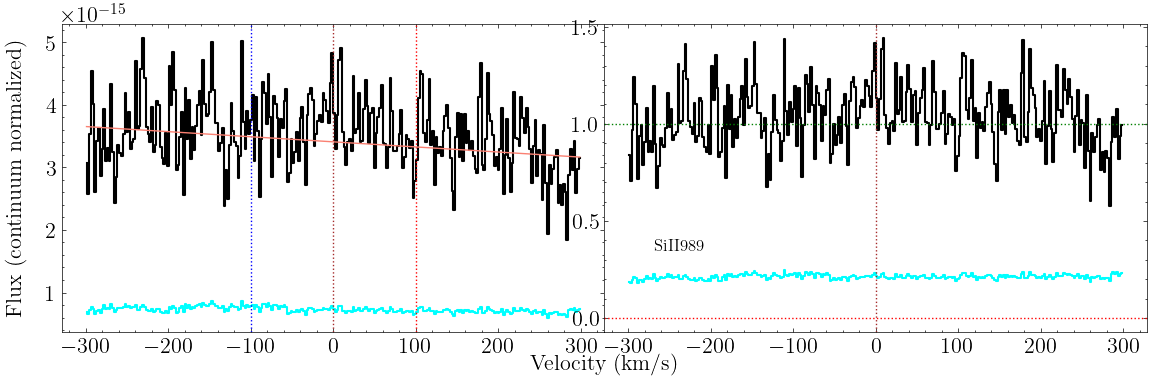

In [437]:
fig, ax = siii_989_fuv.plot_ion_transition_spec_cont()

In [438]:
siii_989_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [439]:
siii_989_fuv.get_upper_lim(13)

logN-1sig: 10.7
logN-2sig: 12.5
logN-3sig: 13.0


# SiIII

## SiIII 1206 (STIS)

In [440]:
siiii_1206_stis = ion_transition('SiIII', 1206, 'Si', z_sys, 'STIS')

In [441]:
siiii_1206_stis.grab_ion_transition_info()

In [442]:
siiii_1206_stis.grab_ion_transition_spec(spec_fits_list)

In [443]:
siiii_1206_stis.cont_norm_flux(v_abs_range=[-100,100], degree=1)

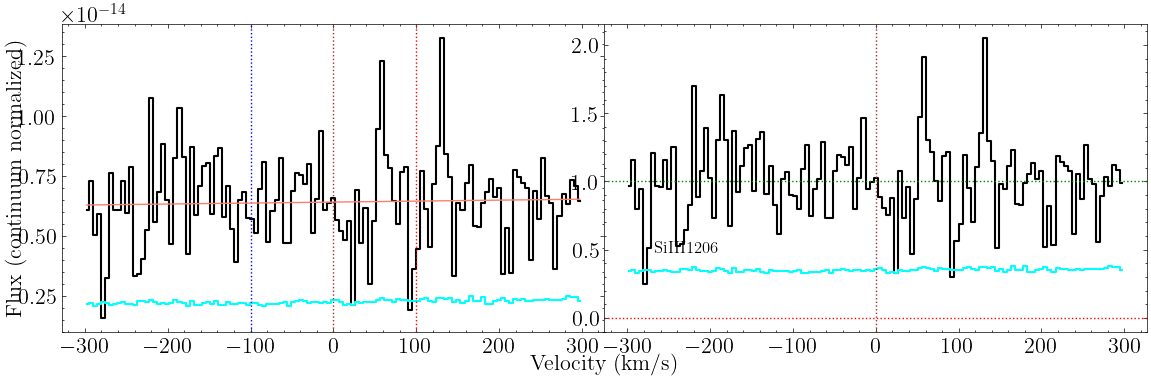

In [444]:
fig, ax = siiii_1206_stis.plot_ion_transition_spec_cont()

In [445]:
siiii_1206_stis.grab_ion_transition_lsf(lsf_fits_list)

In [446]:
siiii_1206_stis.get_upper_lim(13)

logN-1sig: 10.1
logN-2sig: 11.8
logN-3sig: 12.3


# SiIV

## SiIV 1393 (STIS)

In [447]:
siiv_1393_stis = ion_transition('SiIV', 1393, 'Si', z_sys, 'STIS')

In [448]:
siiv_1393_stis.grab_ion_transition_info()

In [449]:
siiv_1393_stis.grab_ion_transition_spec(spec_fits_list, masks=[[40,300]])

In [450]:
siiv_1393_stis.cont_norm_flux(v_abs_range=[-100,100], degree=1)

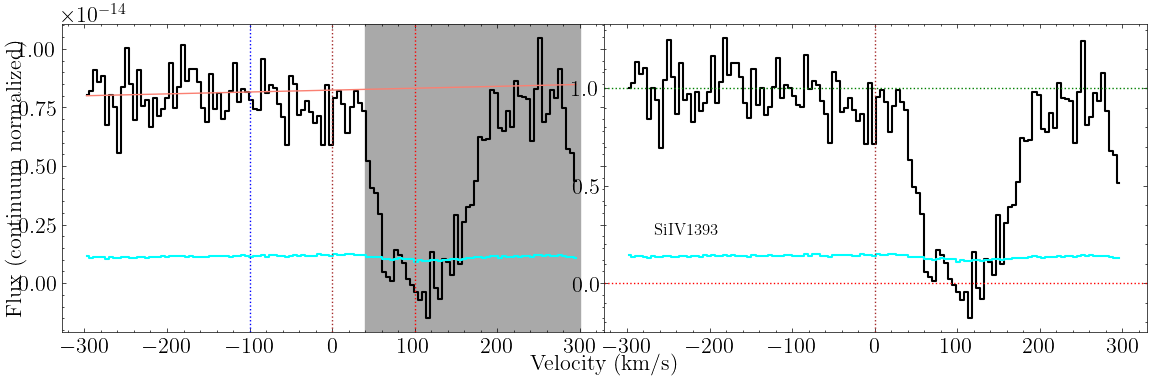

In [451]:
fig, ax = siiv_1393_stis.plot_ion_transition_spec_cont()

In [452]:
siiv_1393_stis.grab_ion_transition_lsf(lsf_fits_list)

In [454]:
siiv_1393_stis.get_upper_lim(13)

logN-1sig: 10.1
logN-2sig: 11.8
logN-3sig: 12.3


## SiIV 1402 (STIS)

In [455]:
siiv_1402_stis = ion_transition('SiIV', 1402, 'Si', z_sys, 'STIS')

In [456]:
siiv_1402_stis.grab_ion_transition_info()

In [457]:
siiv_1402_stis.grab_ion_transition_spec(spec_fits_list)

In [458]:
siiv_1402_stis.cont_norm_flux(v_abs_range=[-100,100], degree=1)

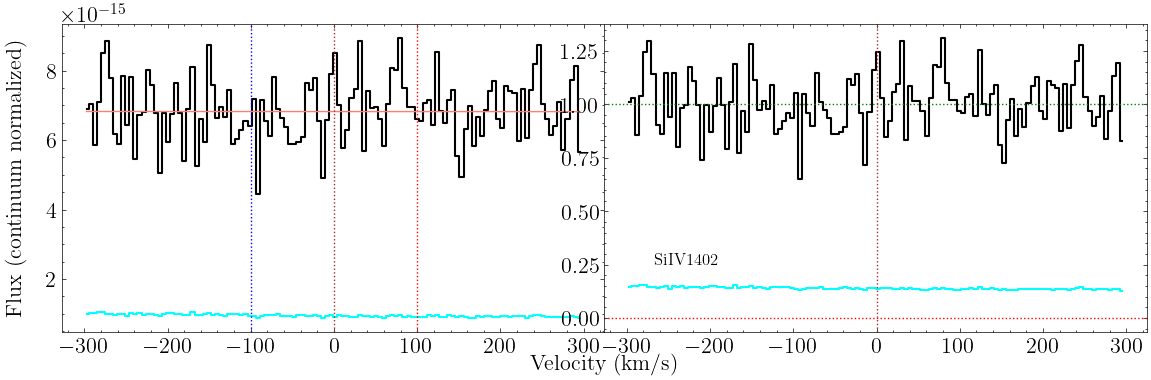

In [459]:
fig, ax = siiv_1402_stis.plot_ion_transition_spec_cont()

In [460]:
siiv_1402_stis.grab_ion_transition_lsf(lsf_fits_list)

In [461]:
siiv_1402_stis.get_upper_lim(13)

logN-1sig: 10.3
logN-2sig: 12.0
logN-3sig: 12.5


# SIV

## SIV 748

In [462]:
siv_748_fuv = ion_transition('SIV', 748, 'S', z_sys, 'FUV')

In [463]:
siv_748_fuv.grab_ion_transition_info()

In [464]:
siv_748_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[140,300]])

In [465]:
siv_748_fuv.cont_norm_flux(v_abs_range=[-100,100], degree=1)

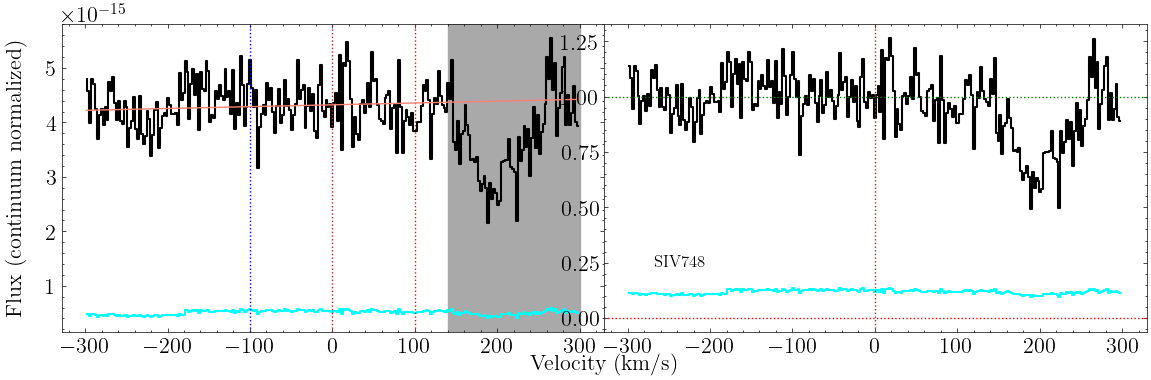

In [466]:
fig, ax = siv_748_fuv.plot_ion_transition_spec_cont()

In [467]:
siv_748_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [469]:
siv_748_fuv.get_upper_lim(13)

logN-1sig: 10.2
logN-2sig: 12.0
logN-3sig: 12.5


# SV

## SV 786

In [470]:
sv_786_fuv = ion_transition('SV', 786, 'S', z_sys, 'FUV')

In [471]:
sv_786_fuv.grab_ion_transition_info()

In [472]:
sv_786_fuv.grab_ion_transition_spec(spec_fits_list)

In [473]:
sv_786_fuv.cont_norm_flux(v_abs_range=[-100,100], degree=1)

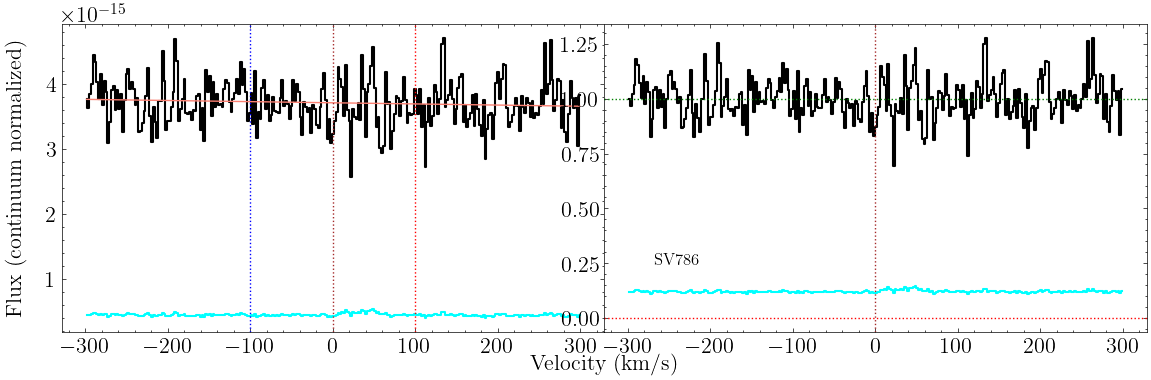

In [474]:
fig, ax = sv_786_fuv.plot_ion_transition_spec_cont()

In [475]:
sv_786_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [476]:
sv_786_fuv.get_upper_lim(13)

logN-1sig: 9.8
logN-2sig: 11.4
logN-3sig: 11.9


# SVI

## SVI 944

In [477]:
svi_944_fuv = ion_transition('SVI', 944, 'S', z_sys, 'FUV')

In [478]:
svi_944_fuv.grab_ion_transition_info()

In [479]:
svi_944_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[80,300]])

In [480]:
svi_944_fuv.cont_norm_flux(v_abs_range=[-100,100], degree=1)

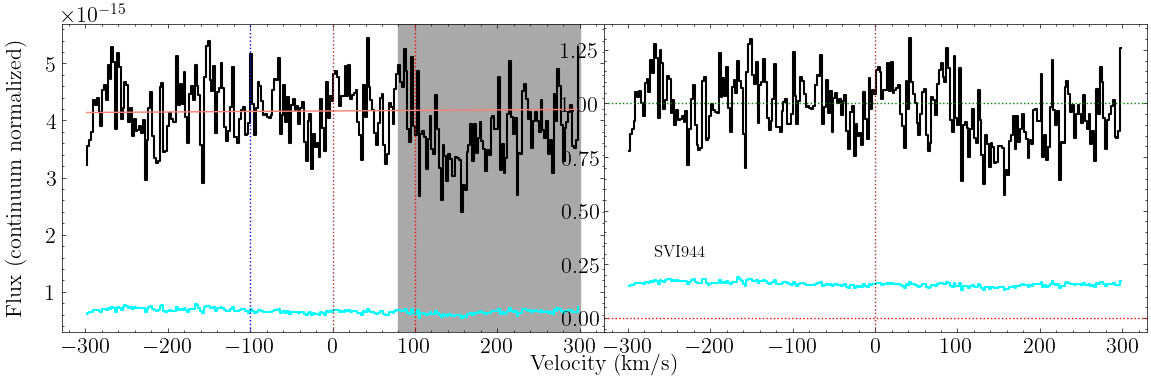

In [481]:
fig, ax = svi_944_fuv.plot_ion_transition_spec_cont()

In [482]:
svi_944_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [483]:
svi_944_fuv.get_upper_lim(13)

logN-1sig: 10.5
logN-2sig: 12.3
logN-3sig: 12.8


# FeII

## FeII 2600 (HIRES)

In [484]:
feii_2600_hires = ion_transition('FeII', 2600, 'Fe', z_sys, 'HIRES')

In [485]:
feii_2600_hires.grab_ion_transition_info()

In [486]:
feii_2600_hires.grab_ion_transition_spec(spec_fits_list)

In [487]:
feii_2600_hires.cont_norm_flux(v_abs_range=[-100,100], degree=1)

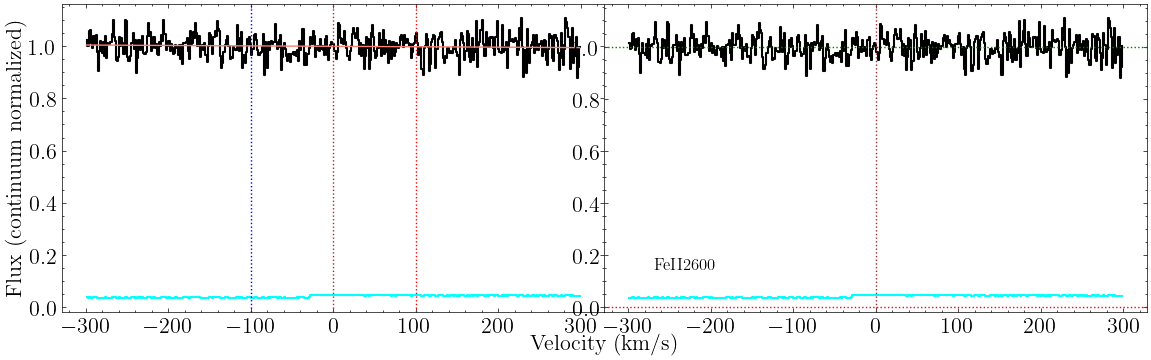

In [488]:
fig, ax = feii_2600_hires.plot_ion_transition_spec_cont()

In [489]:
feii_2600_hires.grab_ion_transition_lsf(lsf_fits_list)

In [490]:
feii_2600_hires.get_upper_lim(13)

logN-1sig: 9.4
logN-2sig: 11.0
logN-3sig: 11.5


## FeII 2382 (HIRES)

In [491]:
feii_2382_hires = ion_transition('FeII', 2382, 'Fe', z_sys, 'HIRES')

In [492]:
feii_2382_hires.grab_ion_transition_info()

In [493]:
feii_2382_hires.grab_ion_transition_spec(spec_fits_list)

In [494]:
feii_2382_hires.cont_norm_flux(v_abs_range=[-100,100], degree=1)

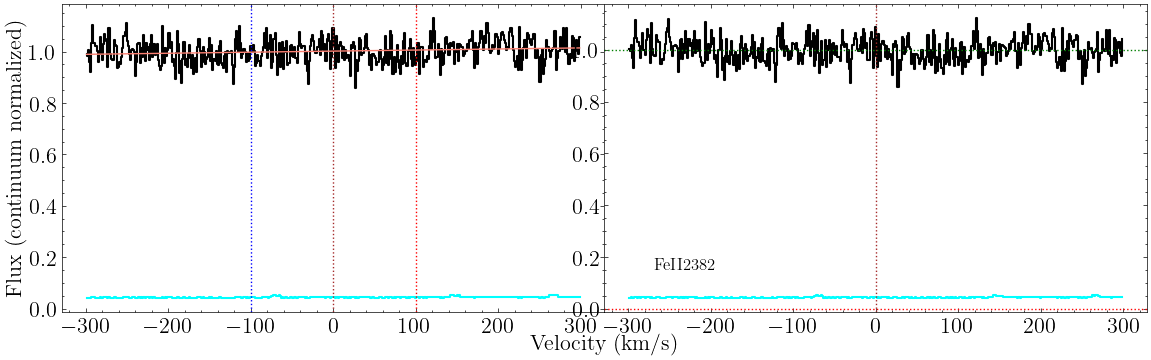

In [495]:
fig, ax = feii_2382_hires.plot_ion_transition_spec_cont()

In [496]:
feii_2382_hires.grab_ion_transition_lsf(lsf_fits_list)

In [497]:
feii_2382_hires.get_upper_lim(13)

logN-1sig: 9.3
logN-2sig: 10.9
logN-3sig: 11.4


## FeII 2344 (HIRES)

In [498]:
feii_2344_hires = ion_transition('FeII', 2344, 'Fe', z_sys, 'HIRES')

In [499]:
feii_2344_hires.grab_ion_transition_info()

In [500]:
feii_2344_hires.grab_ion_transition_spec(spec_fits_list)

In [501]:
feii_2344_hires.cont_norm_flux(v_abs_range=[-100,100], degree=1)

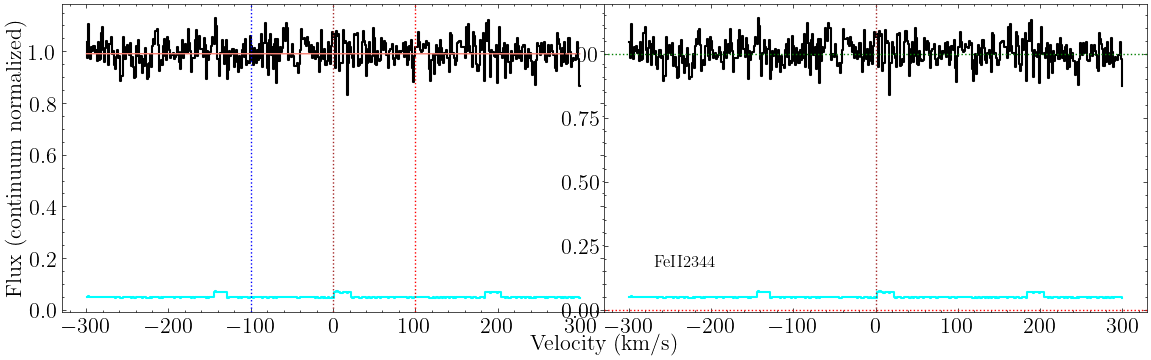

In [502]:
fig, ax = feii_2344_hires.plot_ion_transition_spec_cont()

In [503]:
feii_2344_hires.grab_ion_transition_lsf(lsf_fits_list)

In [504]:
feii_2344_hires.get_upper_lim(13)

logN-1sig: 9.8
logN-2sig: 11.4
logN-3sig: 11.9
